In [22]:
library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest

In [23]:
# Change plot size to 12 x 6
parentdir <- "rscript_data/8v8_redo_plate3/"
options(repr.plot.width=25, repr.plot.height=12)

In [24]:
# generate well ids for x-axis 
wellIDs <- data.frame(sapply(LETTERS[1:8], function(x) {paste0(x,seq(2,8))}))
head(wellIDs)

A  B  C  D  E  F  G  H 
1 A2 B2 C2 D2 E2 F2 G2 H2
2 A3 B3 C3 D3 E3 F3 G3 H3
3 A4 B4 C4 D4 E4 F4 G4 H4
4 A5 B5 C5 D5 E5 F5 G5 H5
5 A6 B6 C6 D6 E6 F6 G6 H6
6 A7 B7 C7 D7 E7 F7 G7 H7

### Stain Index comparison of 8 old vs 8 new

In [27]:
dfcnt_new8 <- list()
dfcnt_old8 <- list()
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))
new8_file <- list.files(parentdir, pattern = "2021-07-20.*NEW8_CELLCNT.*")
old8_file <- list.files(parentdir, pattern = "2021-07-20.*OLD8_CELLCNT.*")


cnt <- 1
dfn_ls <- list()
dfo_ls <- list()
dfn_sub_ls <- list()
dfo_sub_ls <- list()

for (i in seq(1)) {
    dfn_ls[[i]] <- read.csv(paste0(parentdir, new8_file[i]))
    dfo_ls[[i]] <- read.csv(paste0(parentdir, old8_file[i]))
    for (j in seq(4)) {
          dfn_sub_ls[[cnt]] <- dfn_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y))
          dfo_sub_ls[[cnt]] <- dfo_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y))
    cnt <- cnt + 1
    }
}

#### compare two groups at a time for the variance using F test
- The p values are higher than 0.05, meaning the variances do not change from plate 1 to 3
- Run F-test when you want to perform a two samples t-test to check the equality of the variances of the two samples

#### Shapiro test
- the shapiro.test, the null hypothesis assumes that the data is drawn from a normal distribution. Since the p-value > 0.05, we fail to reject the null hypothesis, meaning that it is likely that the data is drawn from a normal distribution

#### Anderson-Darling test for normality
- a given sample of data is drawn from a given probability distribution
- has to be greater than 7 points so cannot run this test

In [29]:
# 8 chl New vs Old (A/E)
idx = c(1,5,9)
j = 1
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 1, nrow = 0)), c("F_TEST" ))
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    #print("Old 8")
    #stat <- shapiro.test(dfo[[i-1]]$count)
    #df_stats[i-1, "SHAPIRO_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    #print("New 8")
    #stat <- shapiro.test(dfn[[i-1]]$count)
    #df_stats[i-1, "SHAPIRO_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
}

write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "A - E old vs. new"
[1] "A2 - E2"

	F test to compare two variances

data:  count by method
F = 2.2739, num df = 1, denom df = 1, p-value = 0.7456
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.510205e-03 1.472990e+03
sample estimates:
ratio of variances 
          2.273873 

[1] "A3 - E3"

	F test to compare two variances

data:  count by method
F = 0.0091518, num df = 1, denom df = 1, p-value = 0.1214
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.412779e-05 5.928452e+00
sample estimates:
ratio of variances 
       0.009151825 

[1] "A4 - E4"

	F test to compare two variances

data:  count by method
F = 2.3035, num df = 1, denom df = 1, p-value = 0.7418
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.555951e-03 1.492186e+03
sample estimates:
ratio of variances 
          2.303506 

[1] "A5 - E5"

	F test to compare two va

In [30]:
# 8 chl New vs Old (B/F)
idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "B - F old vs. new"
[1] "B2 - F2"

	F test to compare two variances

data:  count by method
F = 0.8144, num df = 1, denom df = 1, p-value = 0.9348
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.257194e-03 5.275569e+02
sample estimates:
ratio of variances 
         0.8143962 

[1] "B3 - F3"

	F test to compare two variances

data:  count by method
F = 3.5277, num df = 1, denom df = 1, p-value = 0.6229
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 5.445822e-03 2.285233e+03
sample estimates:
ratio of variances 
          3.527743 

[1] "B4 - F4"

	F test to compare two variances

data:  count by method
F = 1.1788, num df = 1, denom df = 1, p-value = 0.9477
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.819691e-03 7.635978e+02
sample estimates:
ratio of variances 
          1.178776 

[1] "B5 - F5"

	F test to compare two varia

In [31]:
# 8 chl New vs Old (C/G)
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "C - G old vs. new"
[1] "C2 - G2"

	F test to compare two variances

data:  count by method
F = 0.74587, num df = 1, denom df = 1, p-value = 0.907
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.151405e-03 4.831649e+02
sample estimates:
ratio of variances 
         0.7458678 

[1] "C3 - G3"

	F test to compare two variances

data:  count by method
F = 1.5404, num df = 1, denom df = 1, p-value = 0.8635
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.377959e-03 9.978642e+02
sample estimates:
ratio of variances 
          1.540415 

[1] "C4 - G4"

	F test to compare two variances

data:  count by method
F = 0.37954, num df = 1, denom df = 1, p-value = 0.703
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 5.859068e-04 2.458644e+02
sample estimates:
ratio of variances 
          0.379544 

[1] "C5 - G5"

	F test to compare two varia

In [32]:
# 8 chl New vs Old (D/H)
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "D - H old vs. new"
[1] "D2 - H2"

	F test to compare two variances

data:  count by method
F = 1.1146, num df = 1, denom df = 1, p-value = 0.9655
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.720632e-03 7.220297e+02
sample estimates:
ratio of variances 
          1.114606 

[1] "D3 - H3"

	F test to compare two variances

data:  count by method
F = 9.2322, num df = 1, denom df = 1, p-value = 0.4048
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.425194e-02 5.980549e+03
sample estimates:
ratio of variances 
          9.232249 

[1] "D4 - H4"

	F test to compare two variances

data:  count by method
F = 3.1426, num df = 1, denom df = 1, p-value = 0.6539
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 4.851212e-03 2.035717e+03
sample estimates:
ratio of variances 
          3.142562 

[1] "D5 - H5"

	F test to compare two varia

### qq-plot
- Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

### Histogram with density line plot
- We also see similar skewness within the sample distributions.

In [33]:
# A-E
# 8 chl New vs Old (A/E)
p_qq_new8_cnt_ls <- list()
p_hst_new8_cnt_ls <- list()
idx = c(1,5,9)
j = 1
colm = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()


df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "A - E old vs. new"
[1] "A2 - E2"
[1] "A3 - E3"
[1] "A4 - E4"
[1] "A5 - E5"
[1] "A6 - E6"
[1] "A7 - E7"
[1] "A8 - E8"


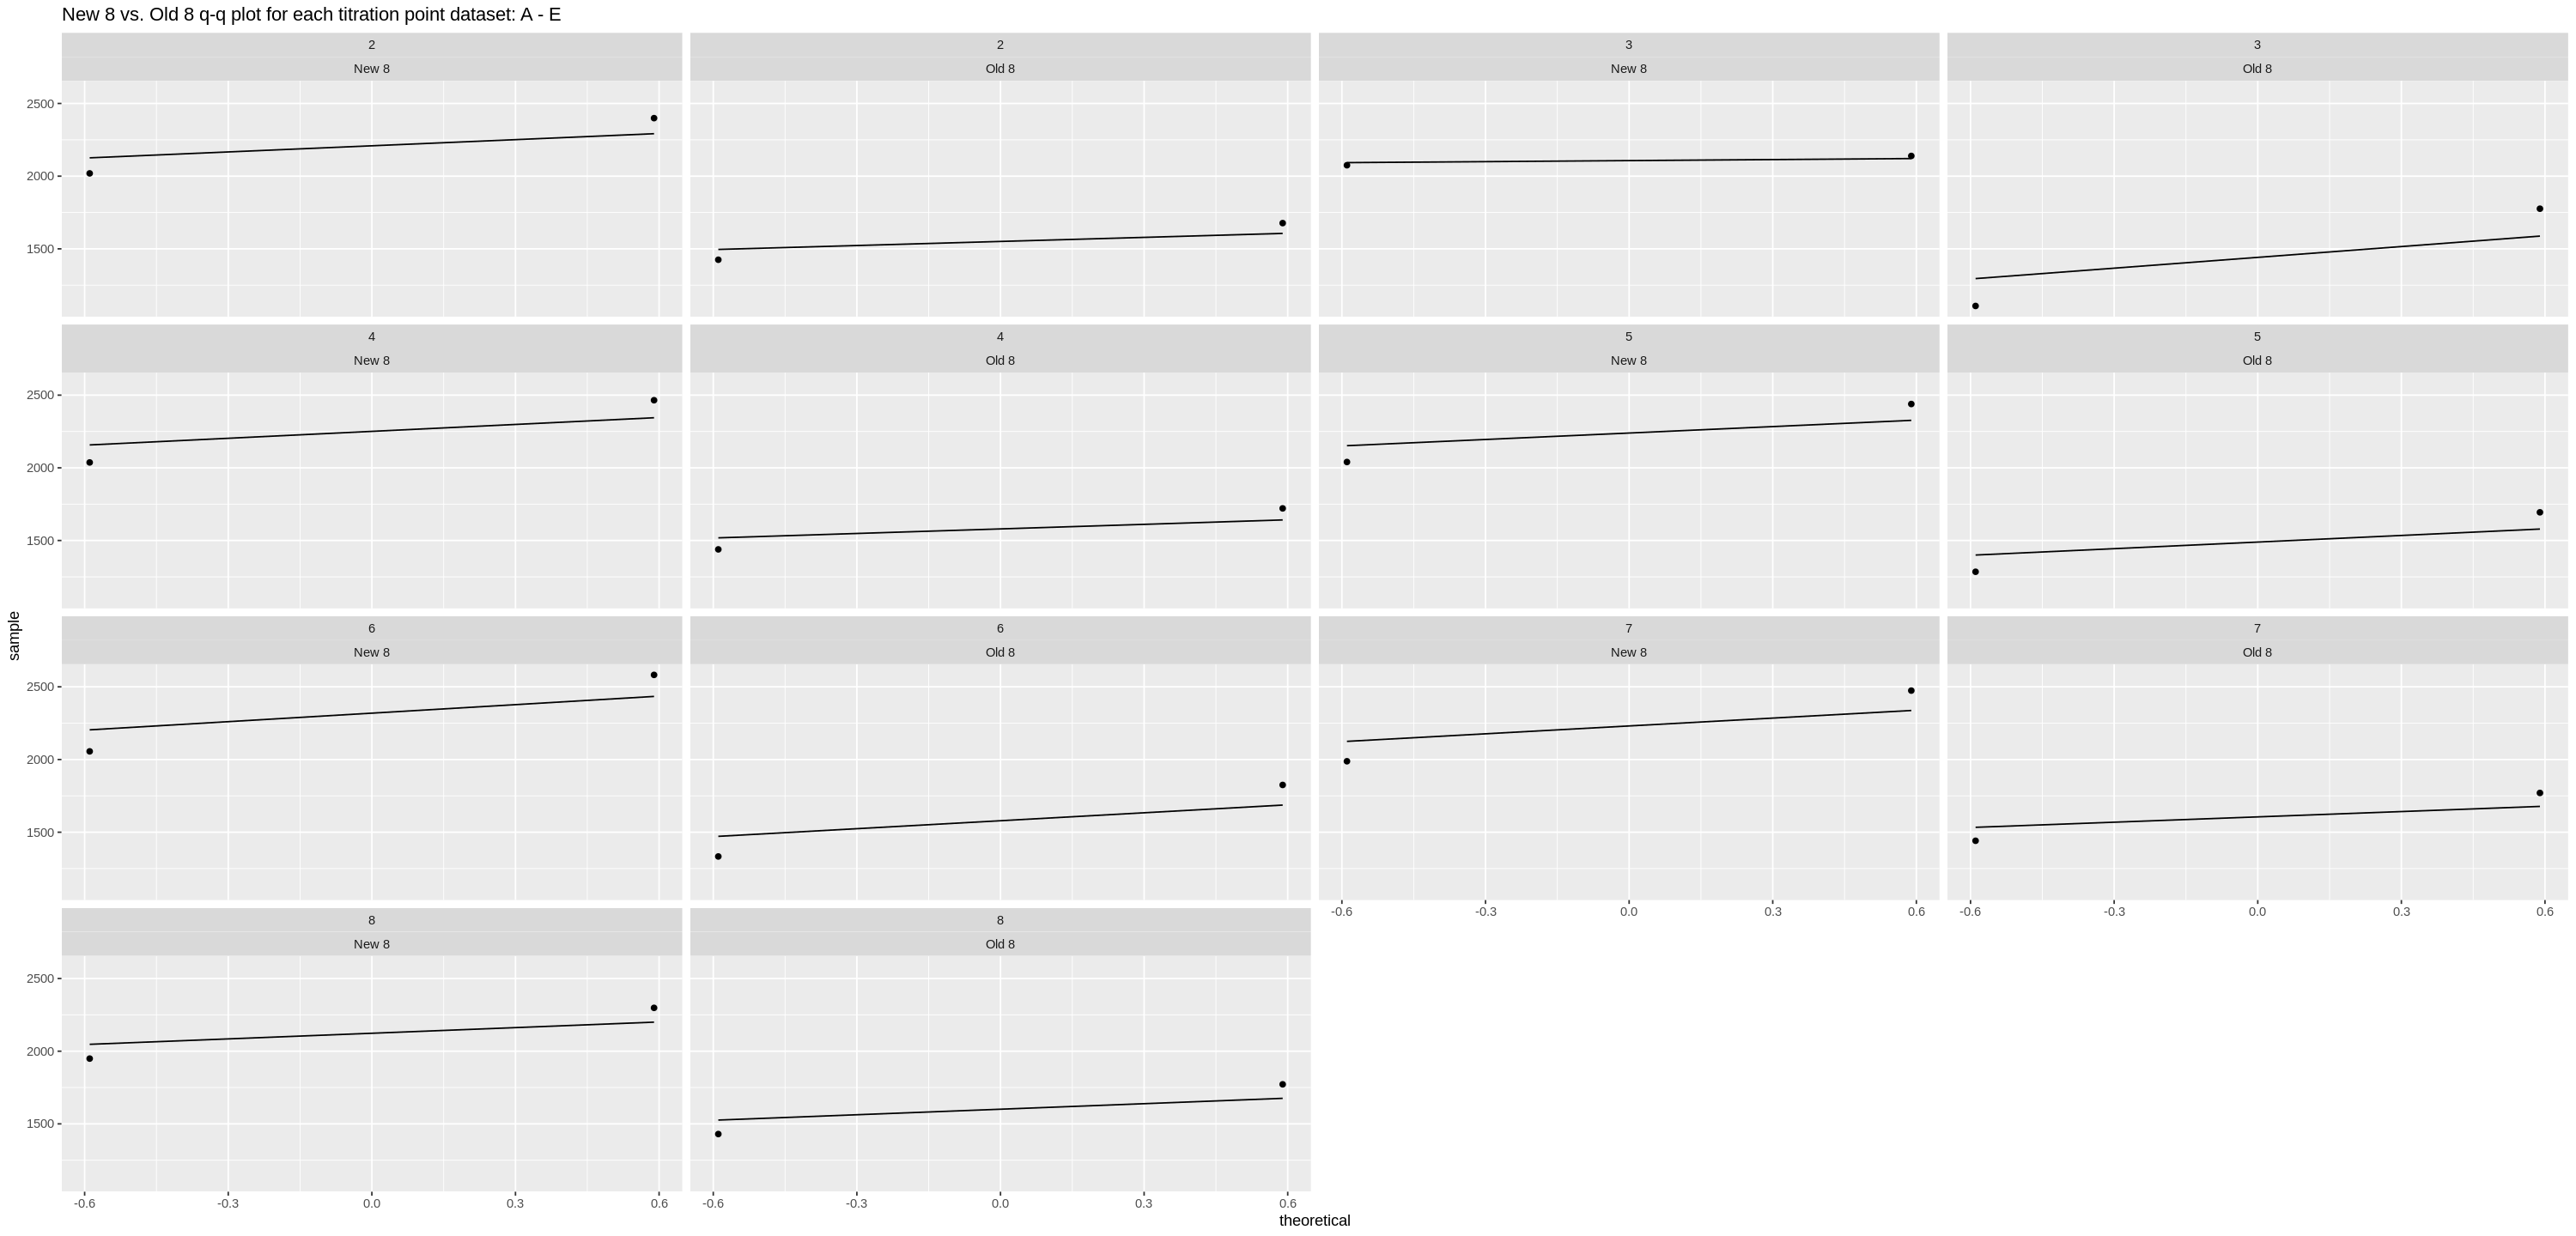

In [34]:
p_qq_cnt_ls[[1]]

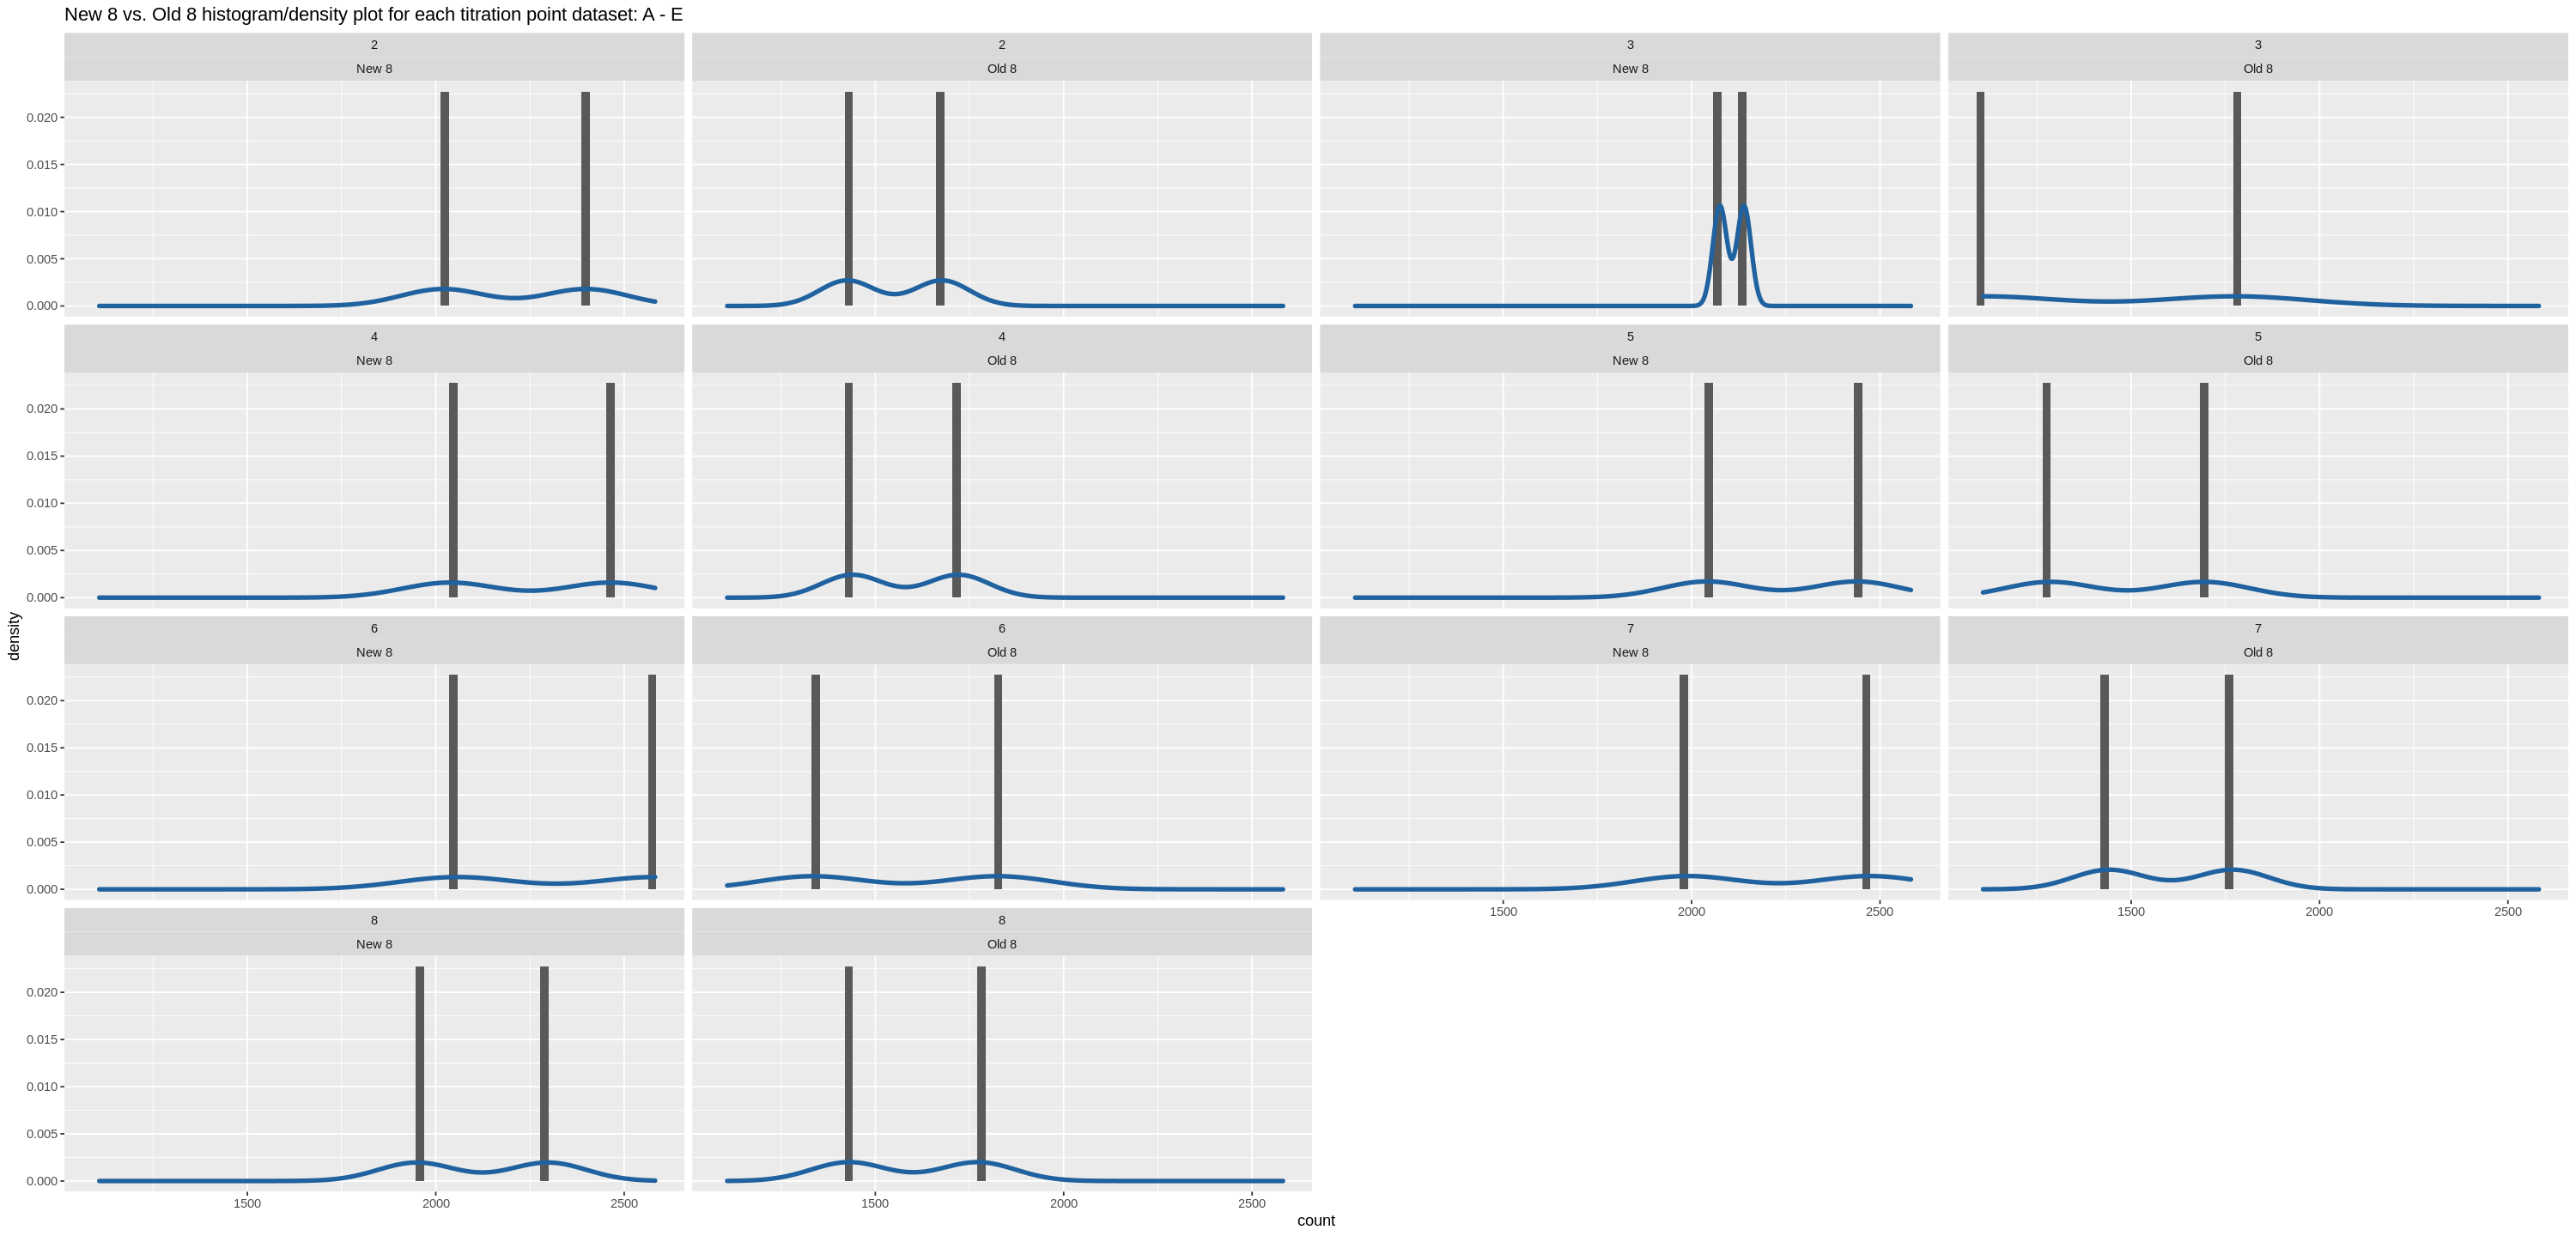

In [35]:
p_hst_cnt_ls[[1]]

In [36]:
# B-F
# 8 chl New vs Old 
idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "B - F old vs. new"
[1] "B2 - F2"
[1] "B3 - F3"
[1] "B4 - F4"
[1] "B5 - F5"
[1] "B6 - F6"
[1] "B7 - F7"
[1] "B8 - F8"


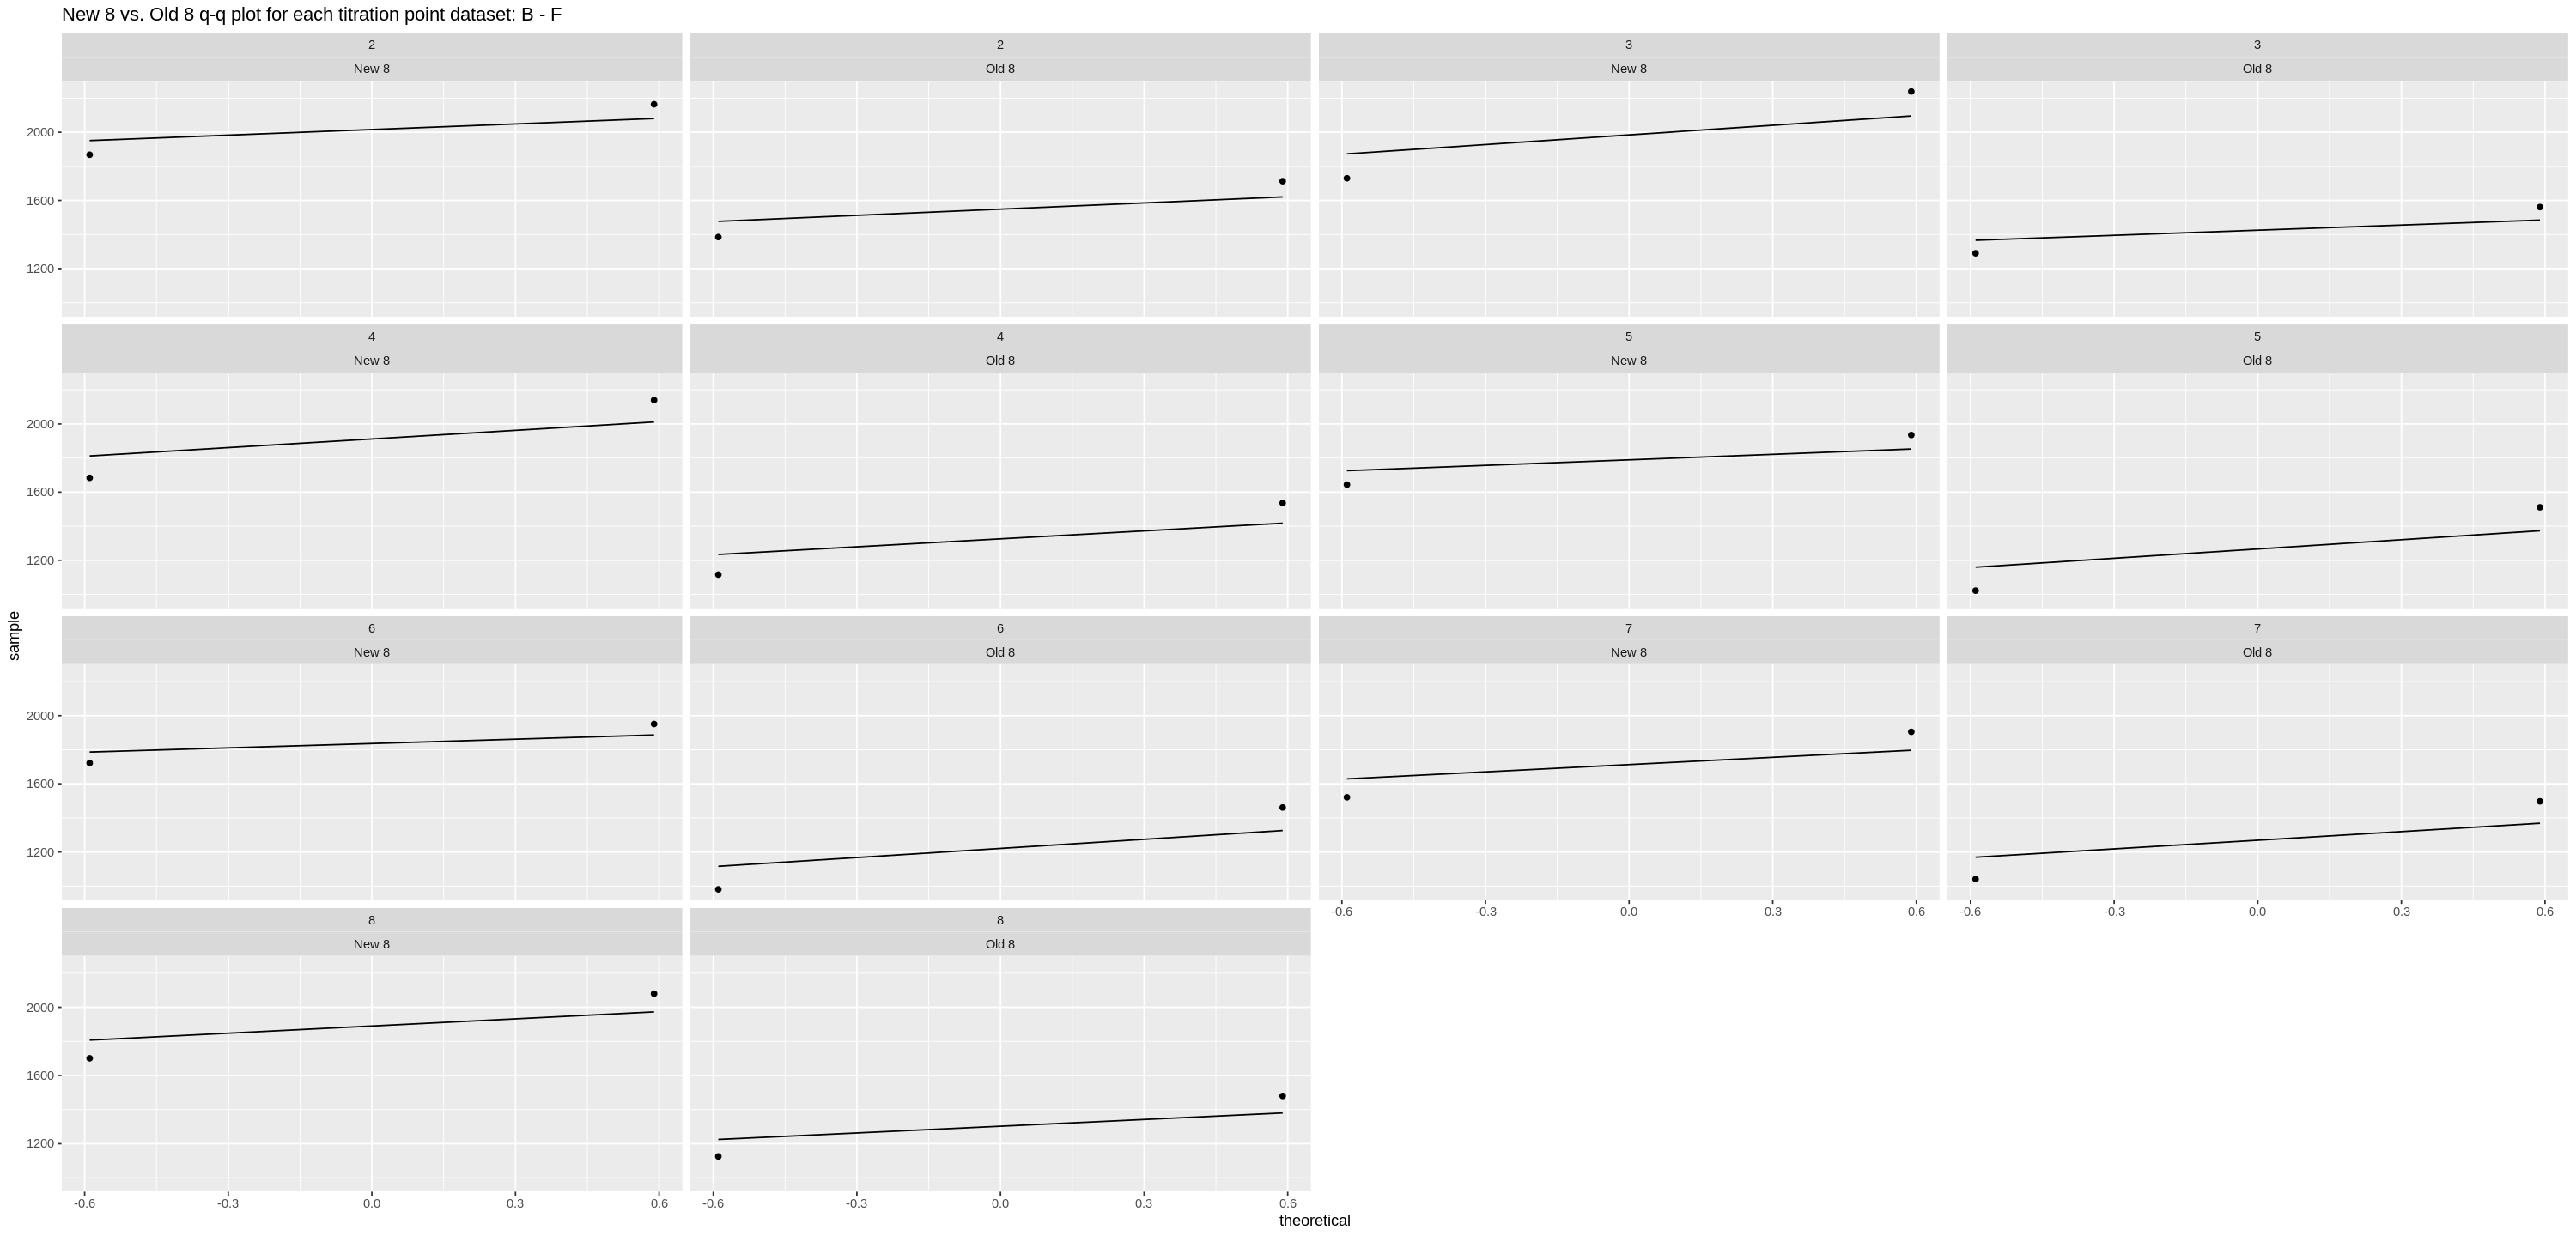

In [37]:
p_qq_cnt_ls[[2]]

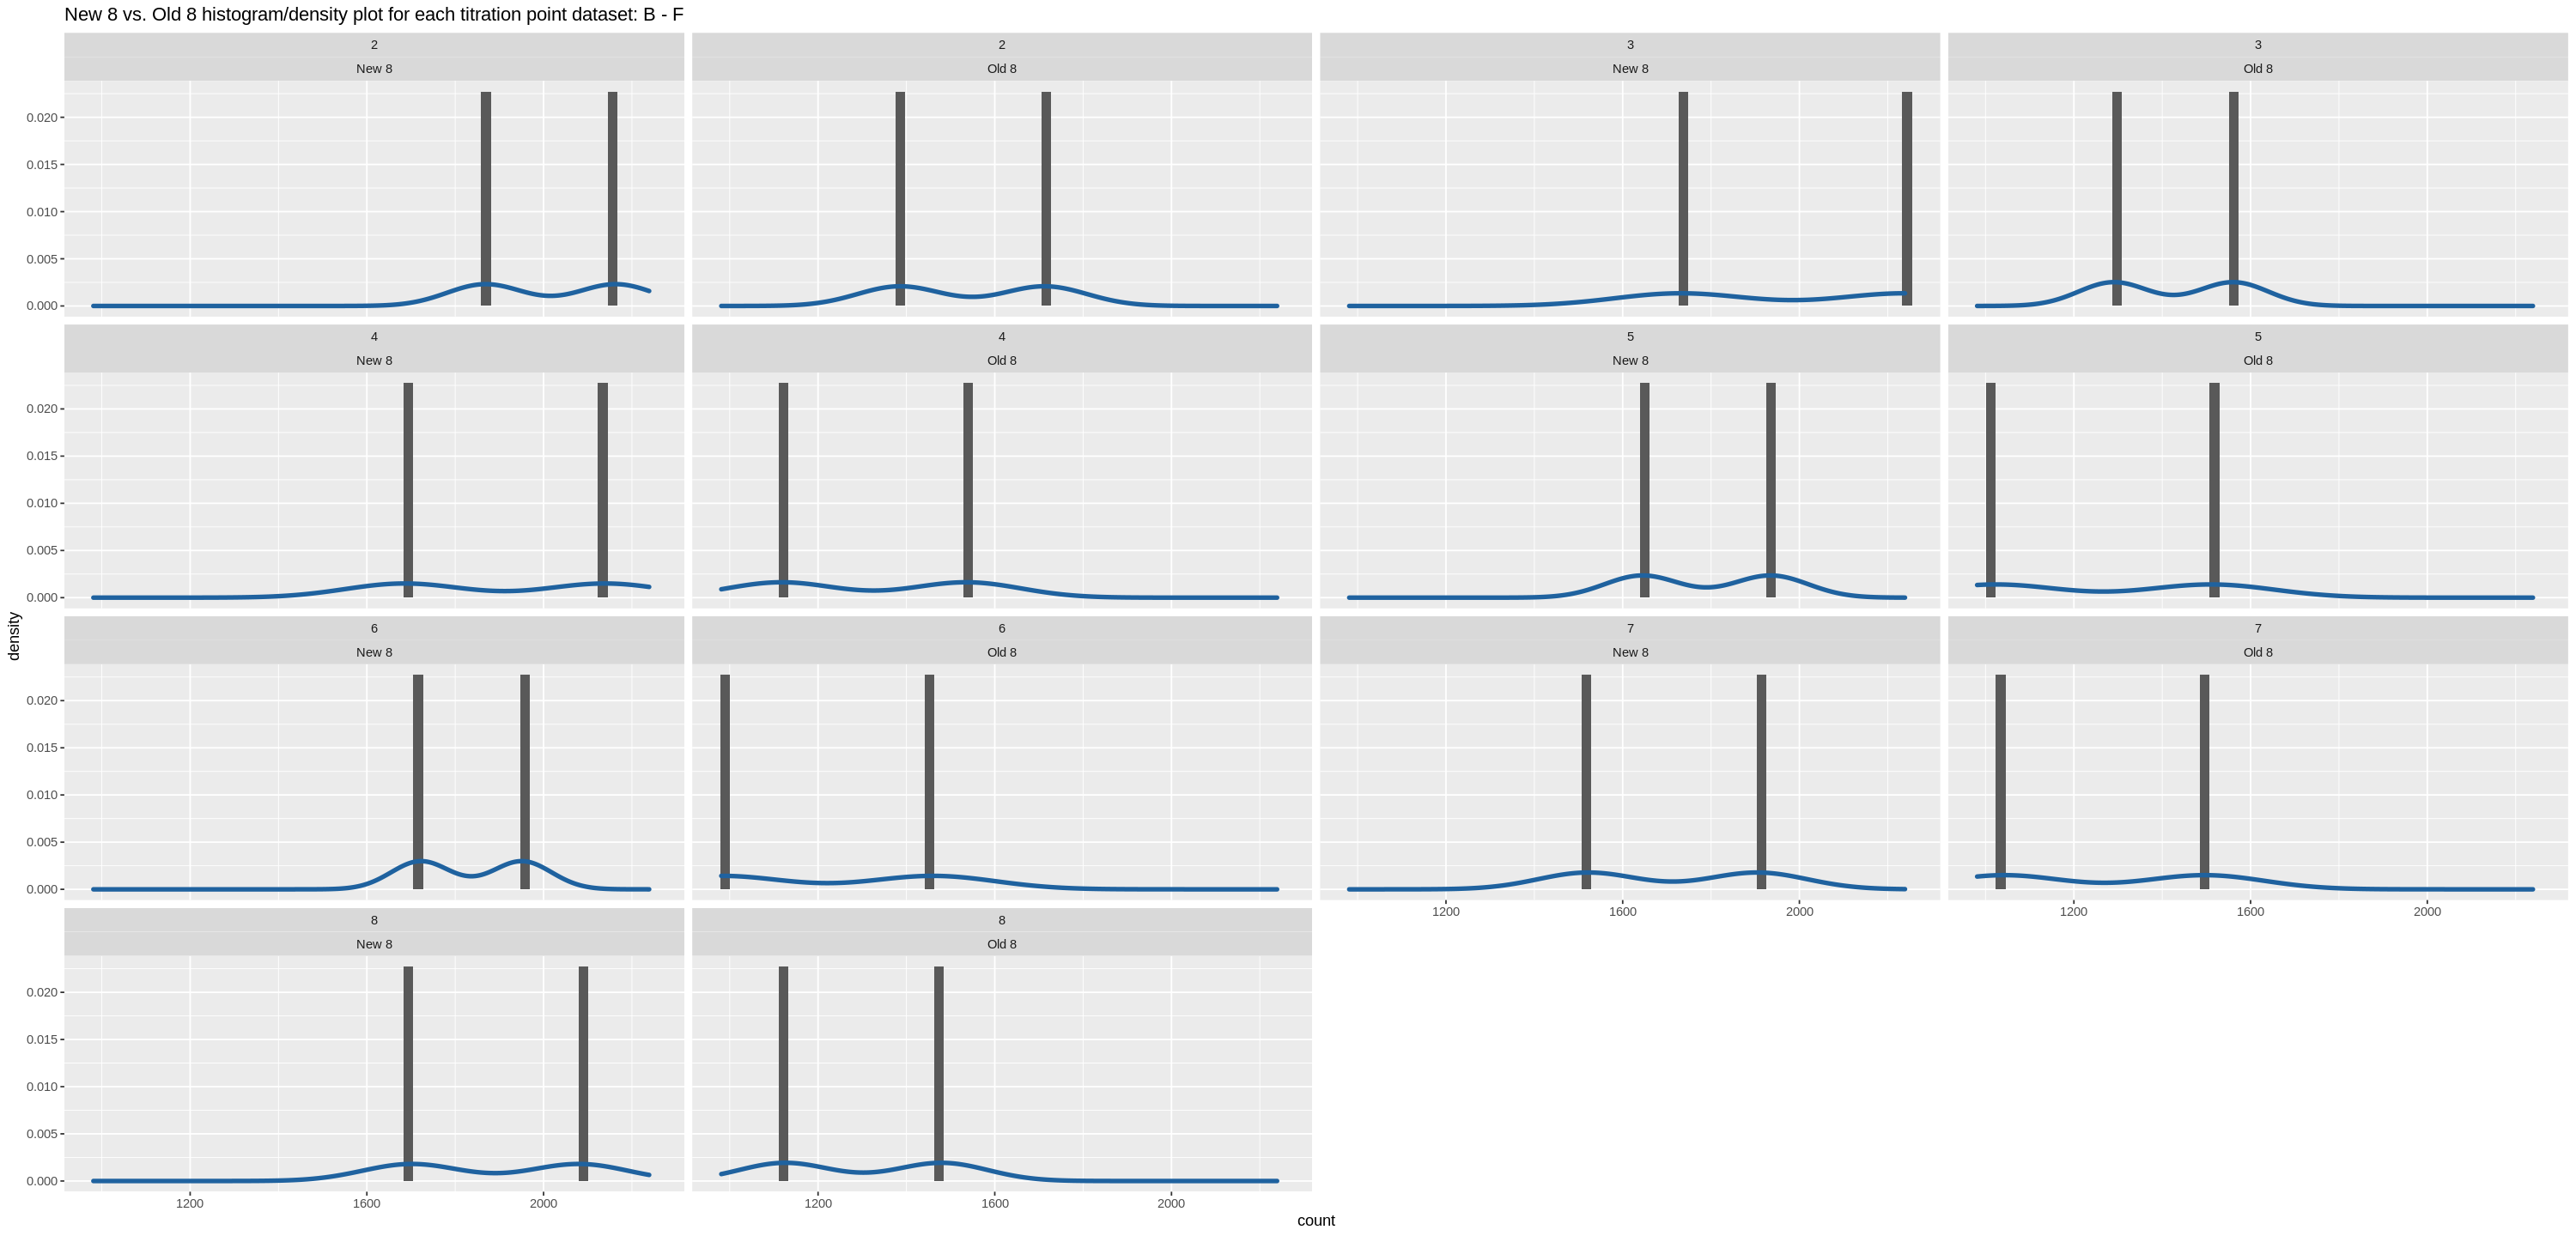

In [38]:
p_hst_cnt_ls[[2]]

In [39]:
# C-G
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)

df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "C - G old vs. new"
[1] "C2 - G2"
[1] "C3 - G3"
[1] "C4 - G4"
[1] "C5 - G5"
[1] "C6 - G6"
[1] "C7 - G7"
[1] "C8 - G8"


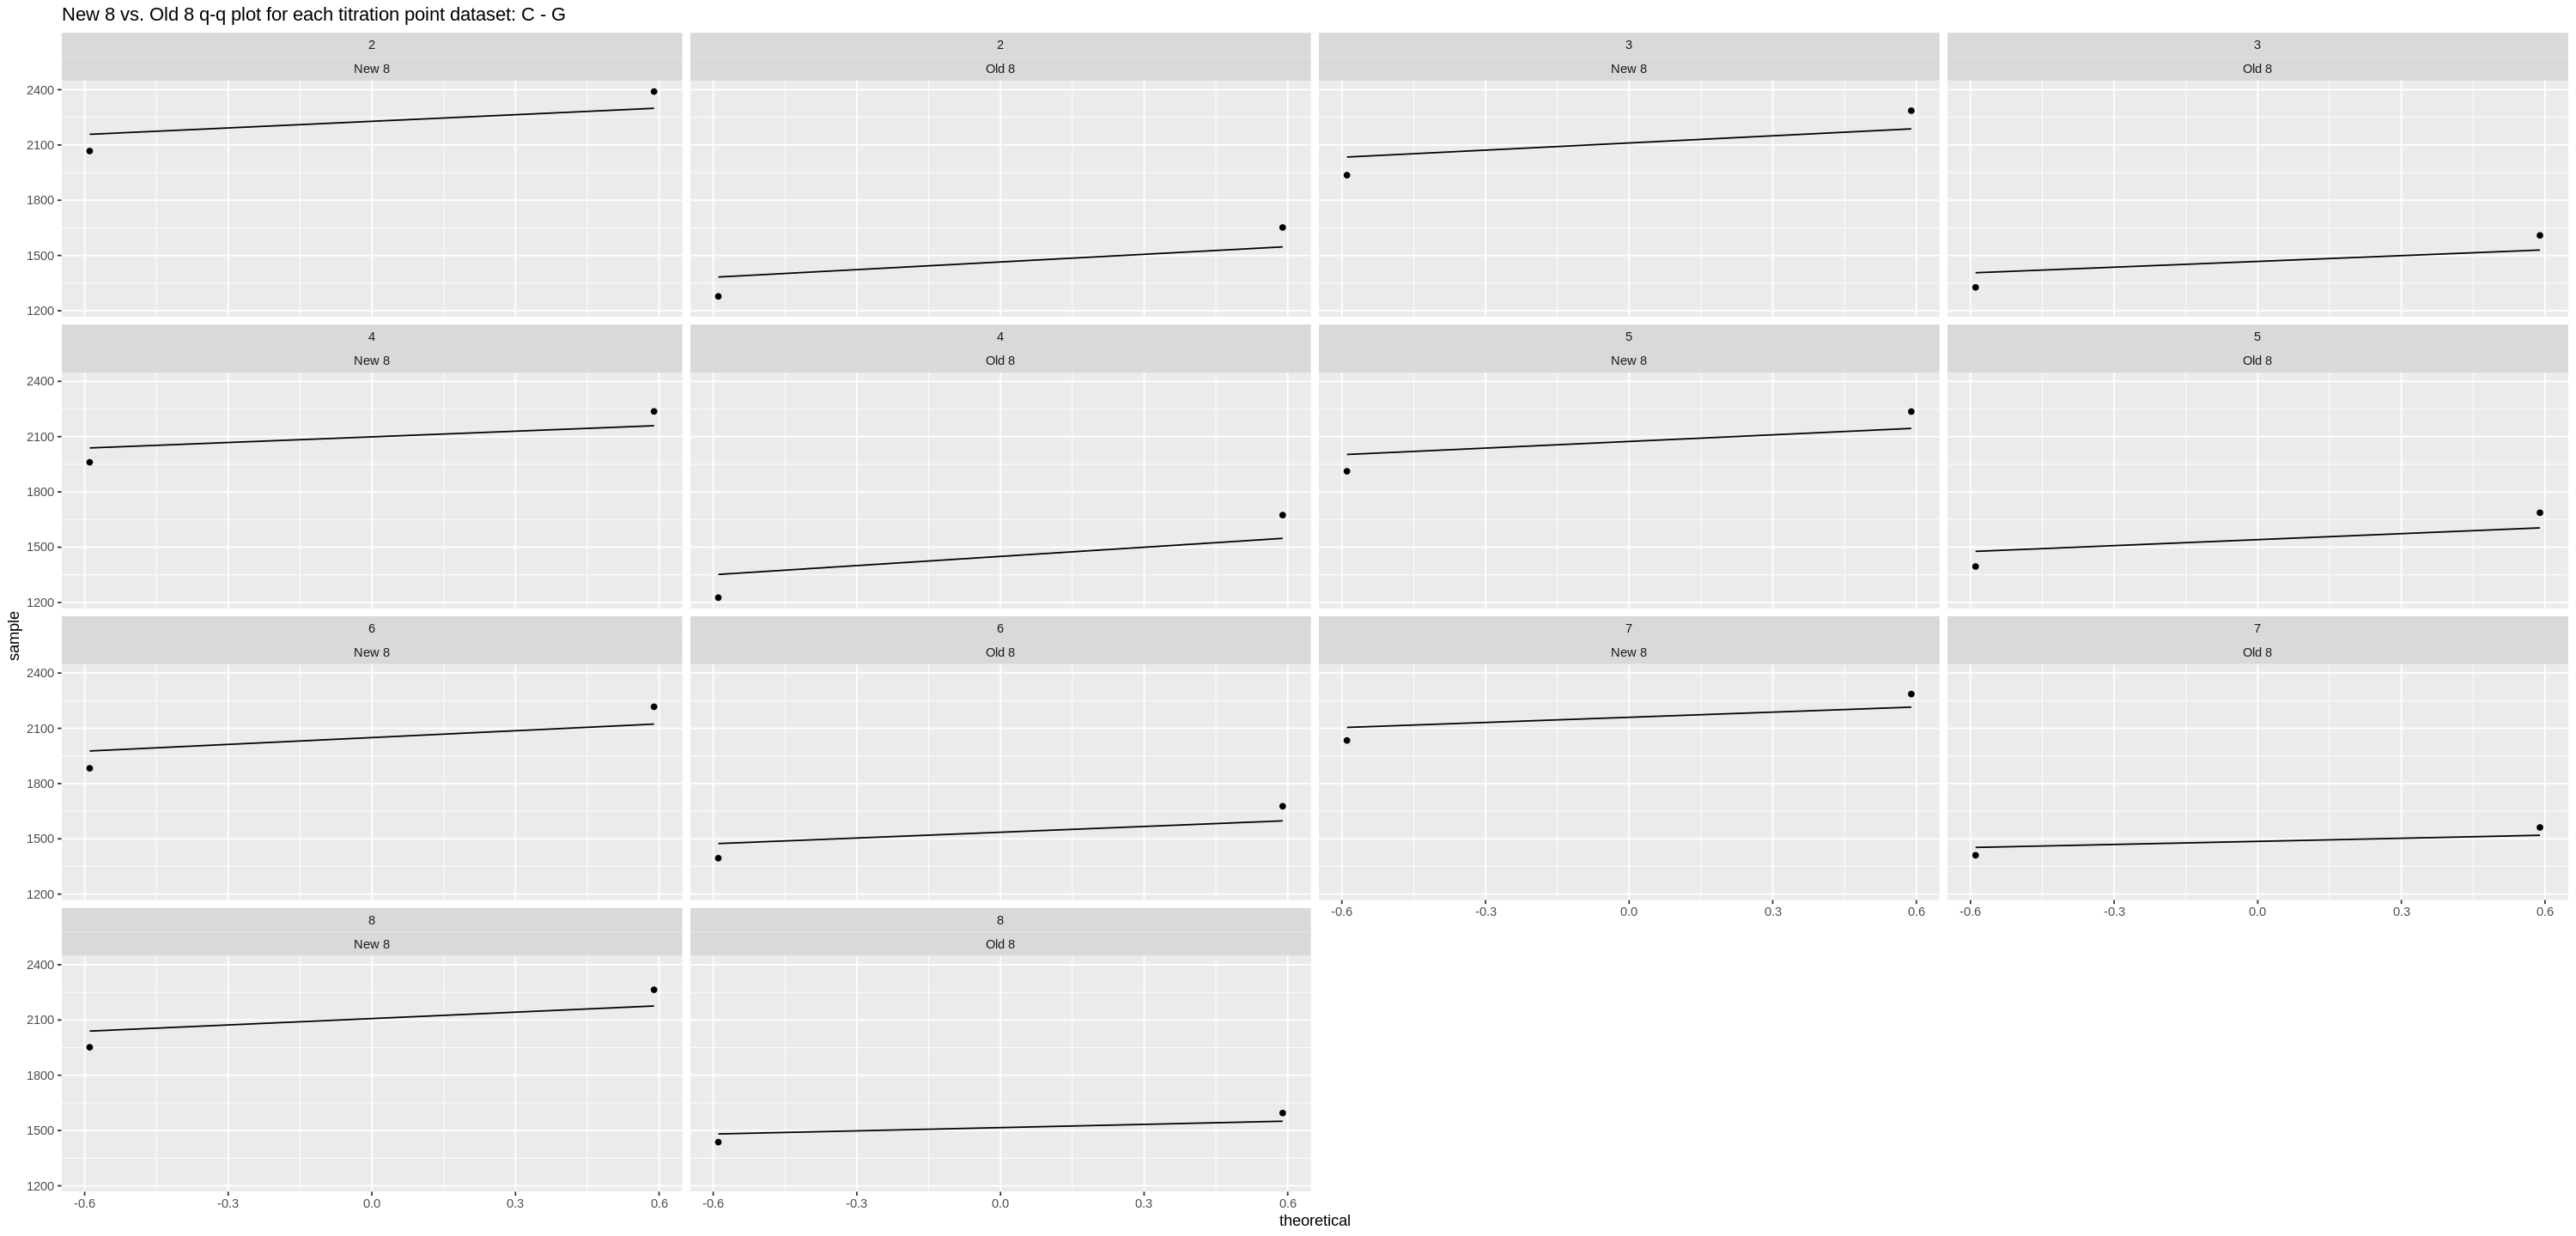

In [40]:
p_qq_cnt_ls[[3]]

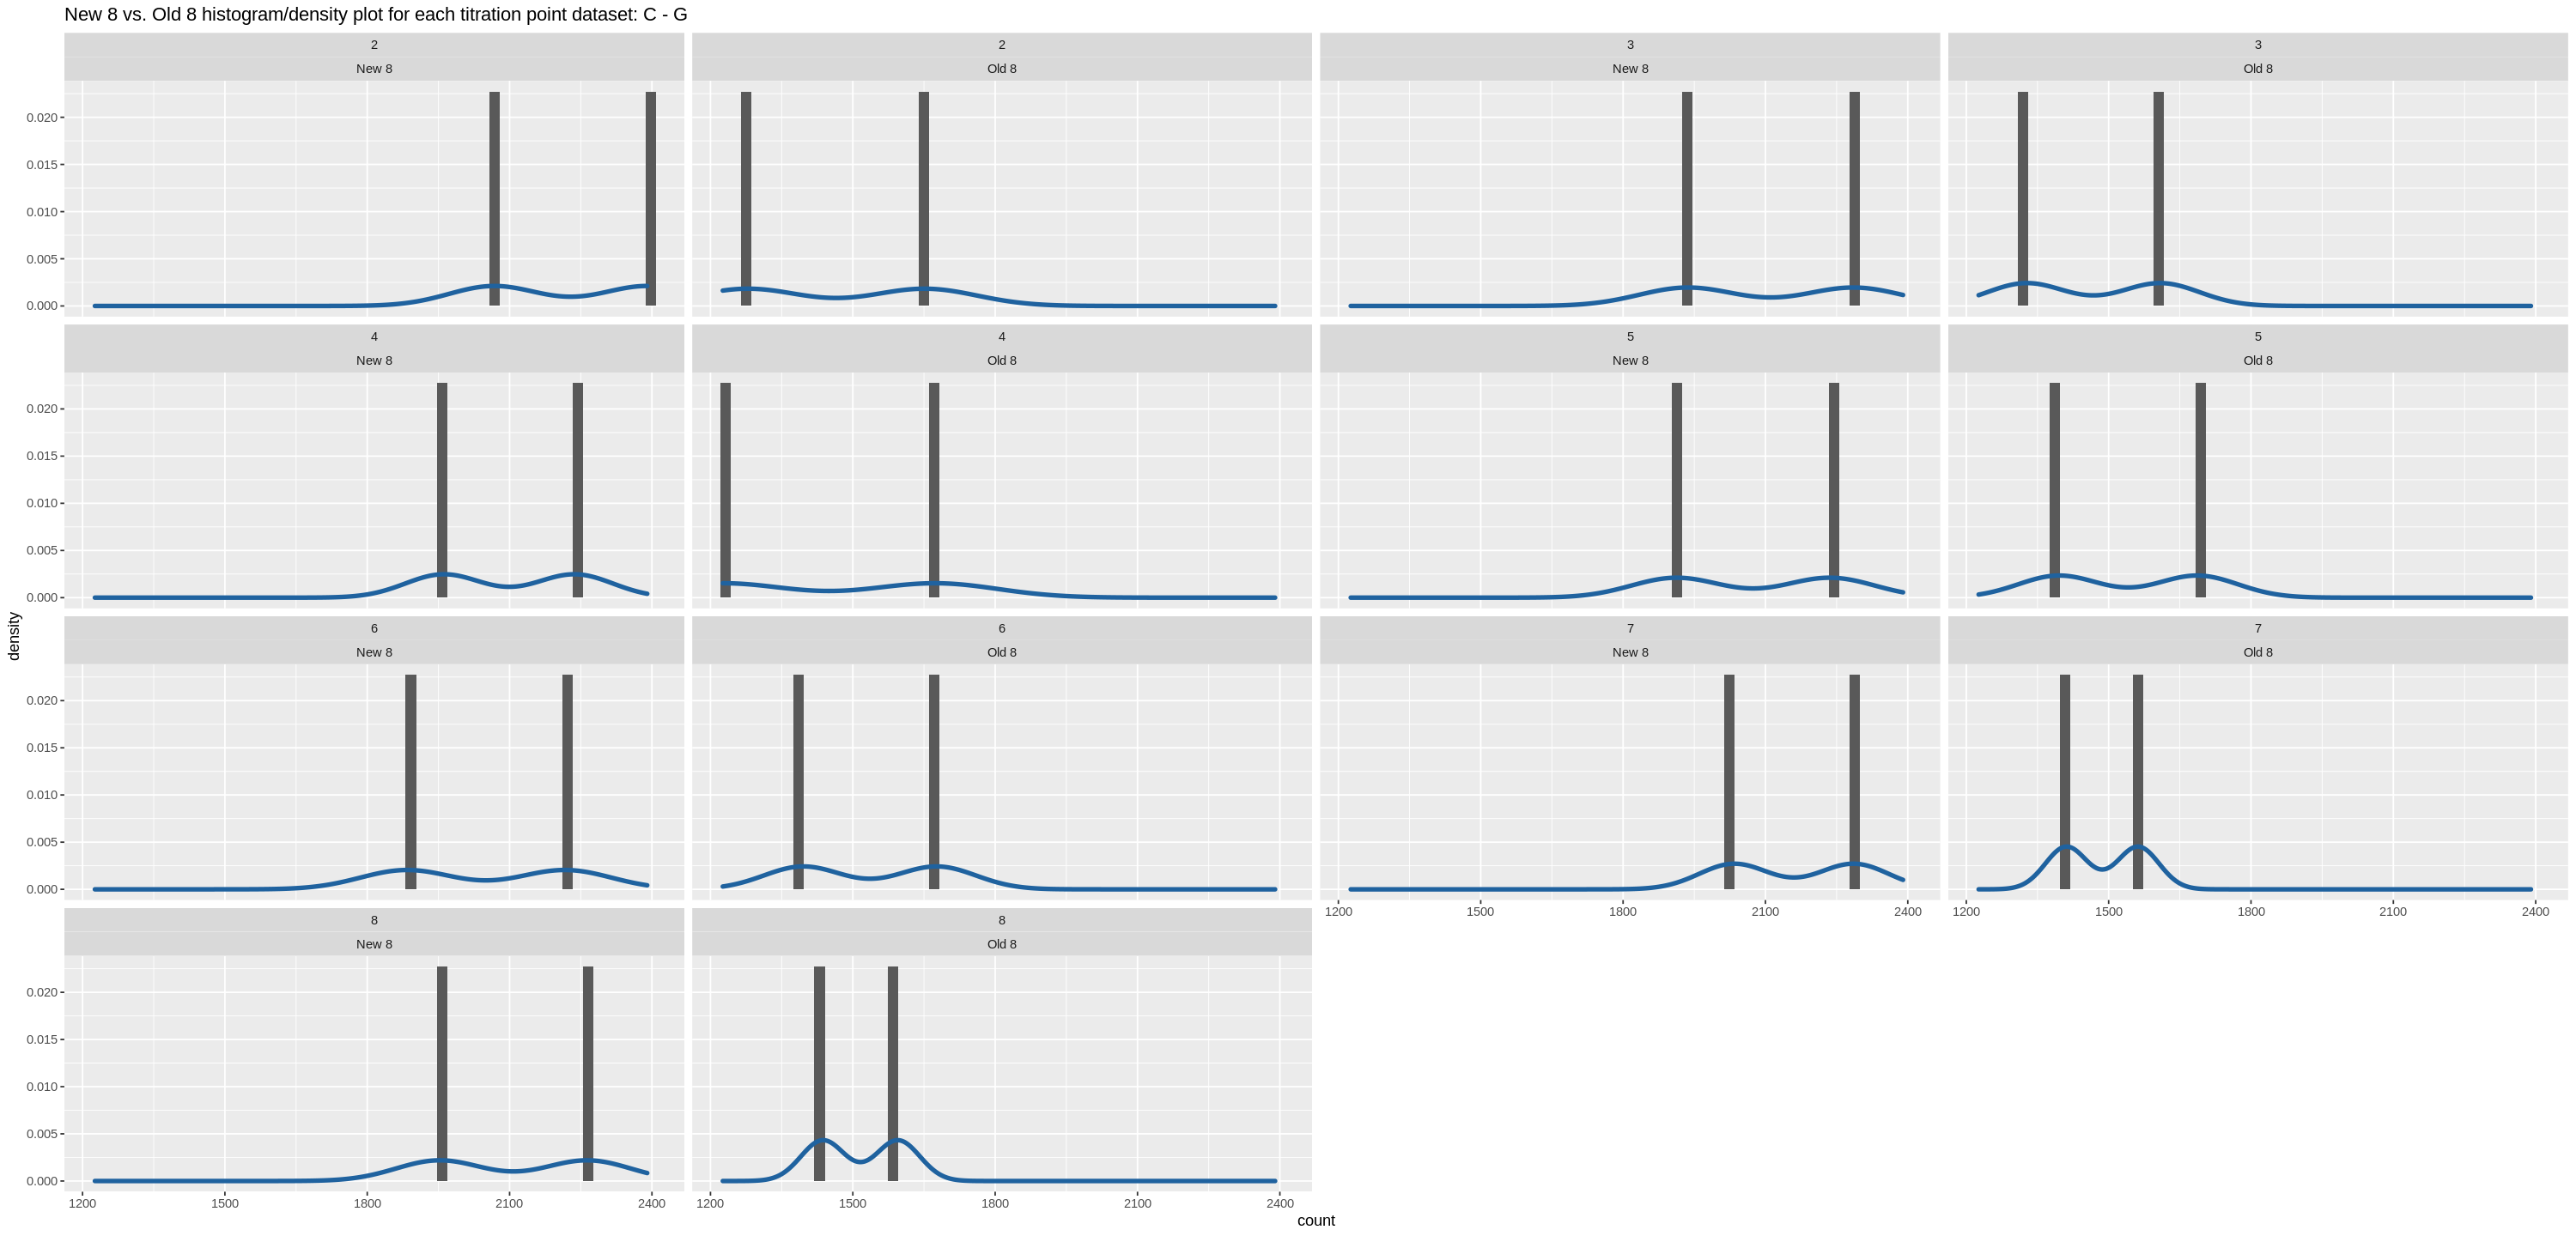

In [41]:
p_hst_cnt_ls[[3]]

In [42]:
# D-H
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "D - H old vs. new"
[1] "D2 - H2"
[1] "D3 - H3"
[1] "D4 - H4"
[1] "D5 - H5"
[1] "D6 - H6"
[1] "D7 - H7"
[1] "D8 - H8"


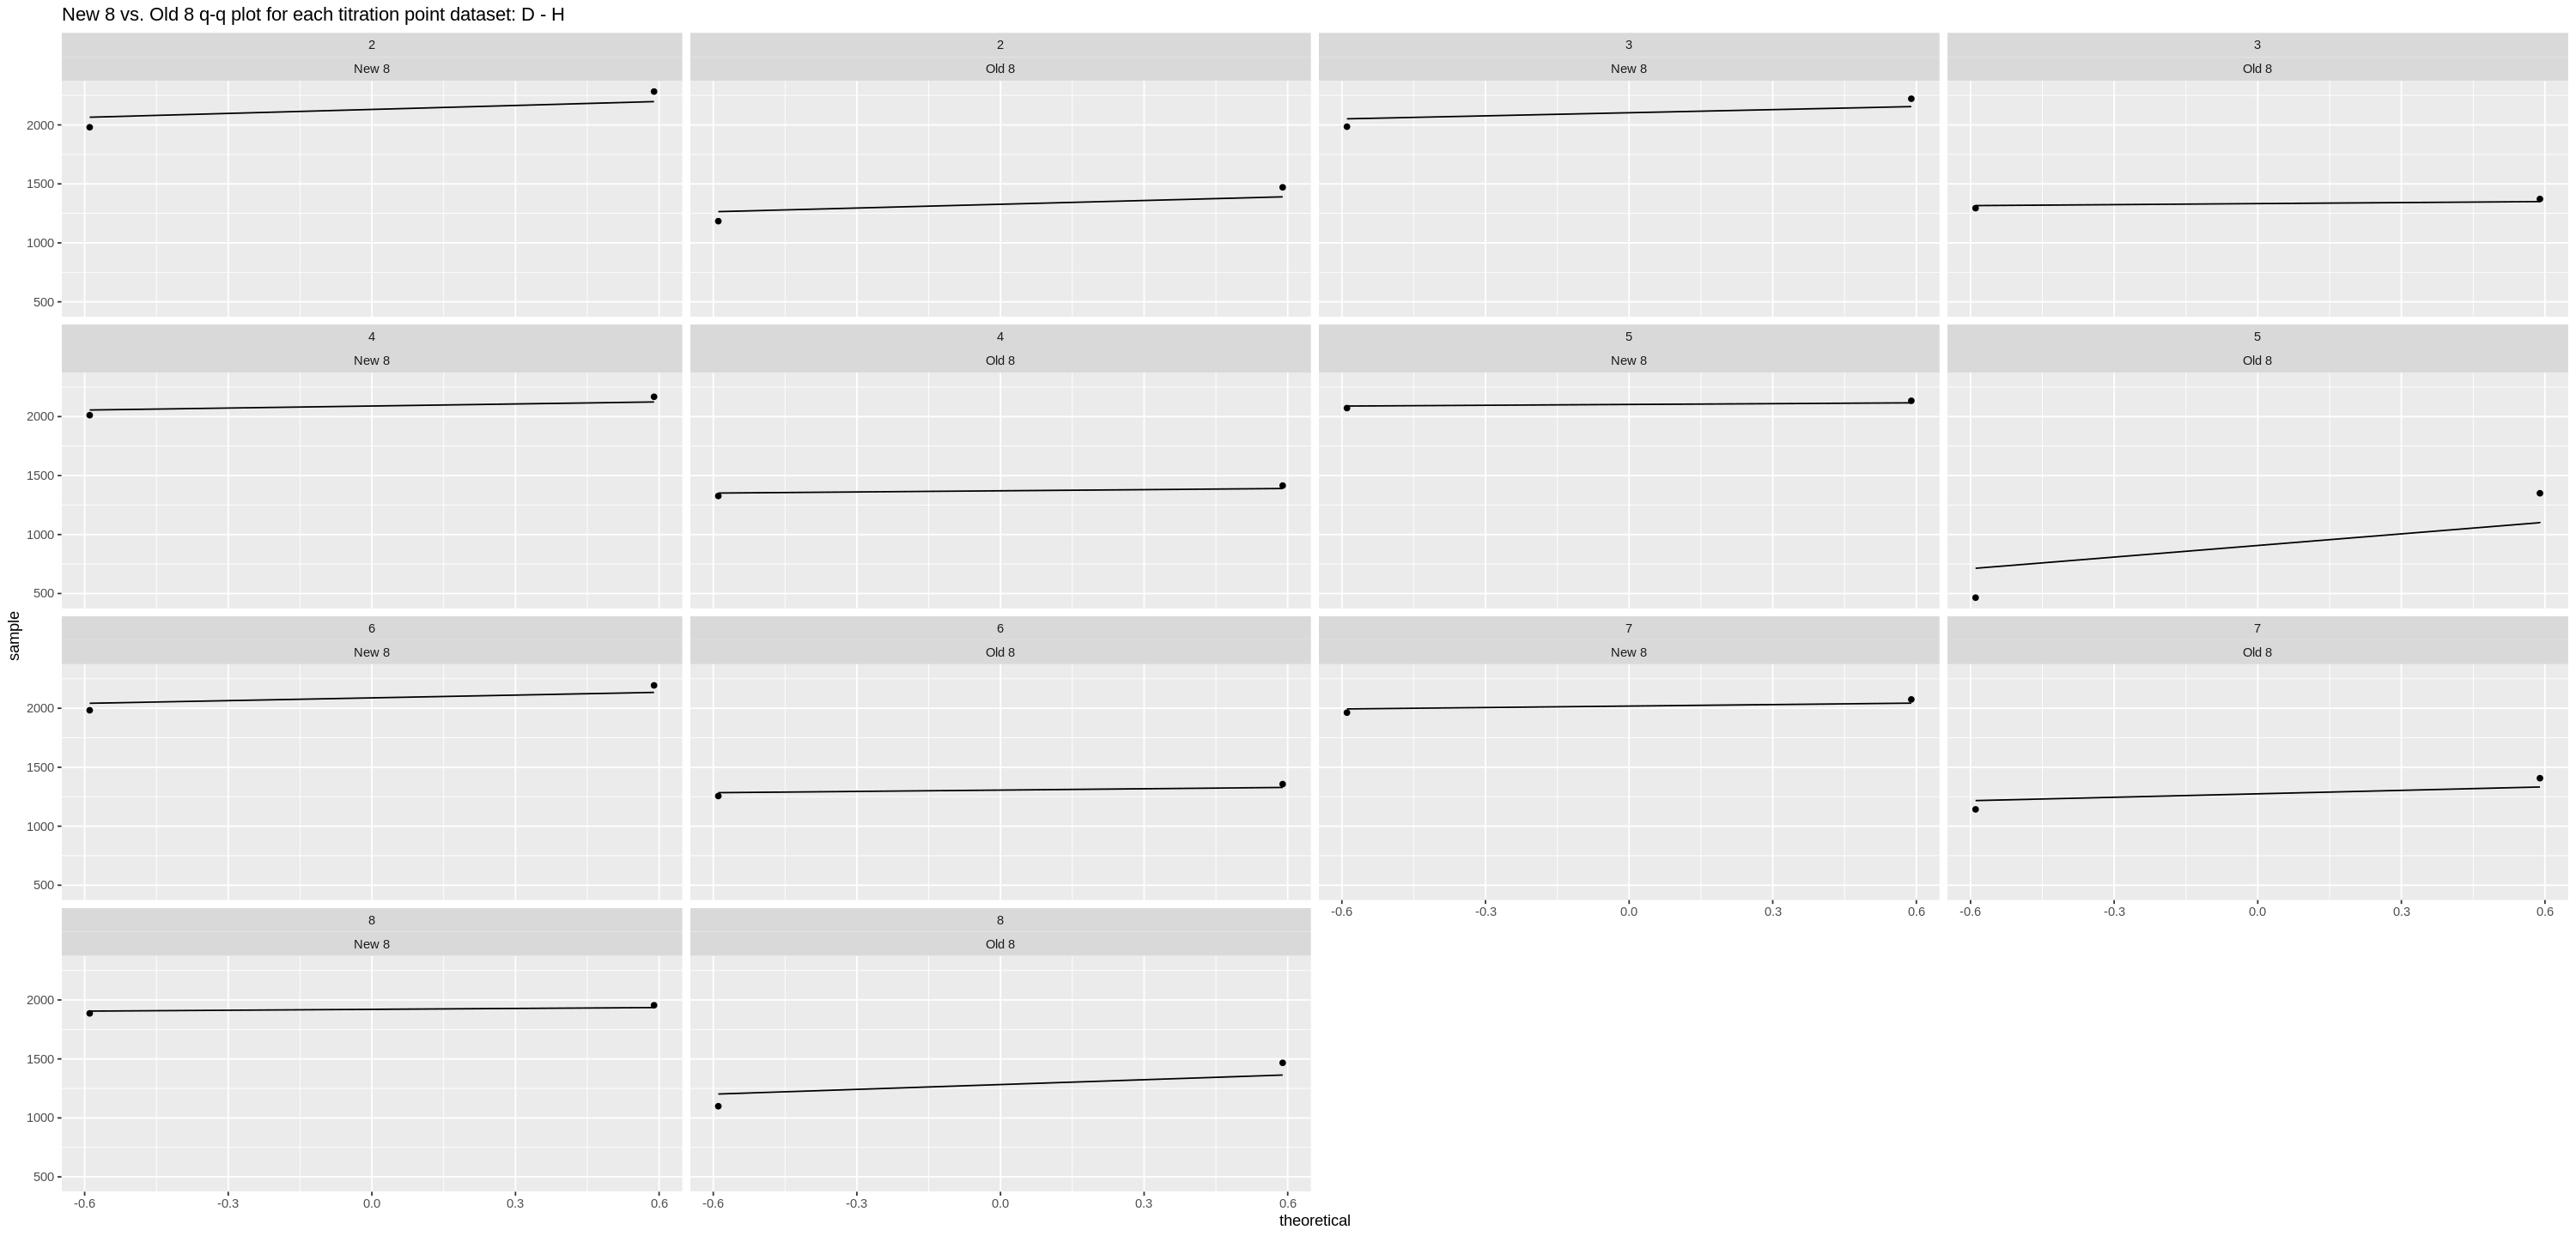

In [43]:
p_qq_cnt_ls[[4]]

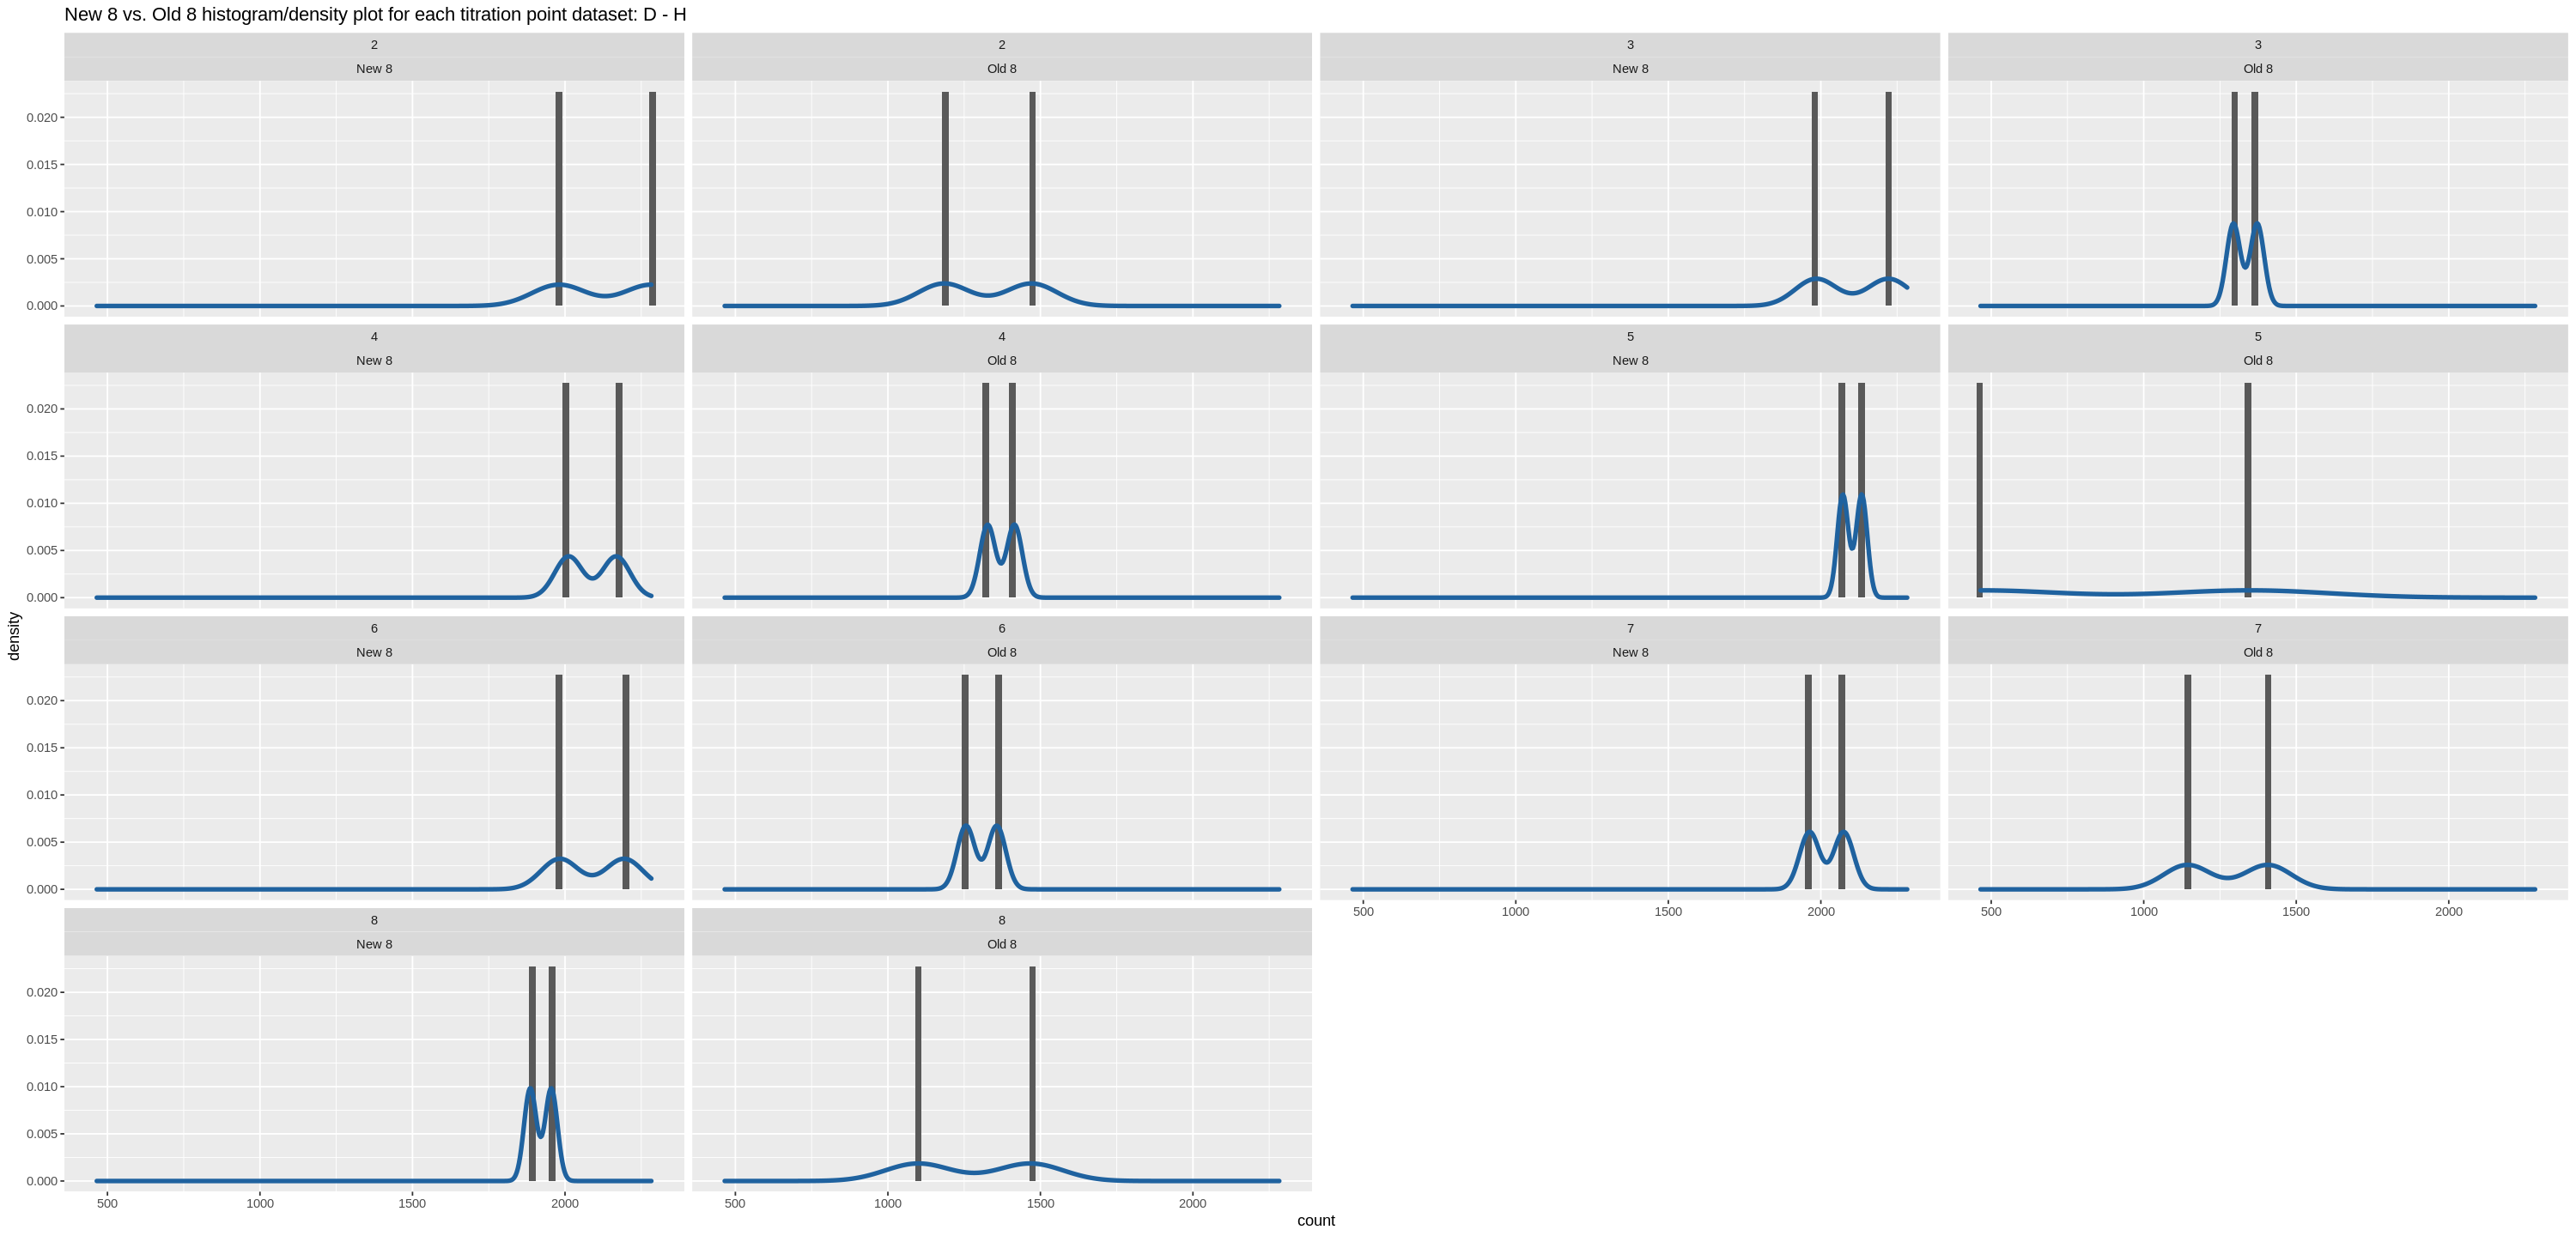

In [44]:
p_hst_cnt_ls[[4]]

In [45]:
dfn_sub_ls[[1]]

X Y Z   
1  2 A 2399
2  3 A 2139
3  4 A 2465
4  5 A 2439
5  6 A 2582
6  7 A 2474
7  8 A 2298
8  2 E 2019
9  3 E 2075
10 4 E 2037
11 5 E 2040
12 6 E 2056
13 7 E 1988
14 8 E 1949

In [46]:
p_qq_new8 <- list()
p_qq_old8 <- list()
p_hst_new8_cnt <- list()
p_hst_old8_cnt <- list()
df_pair_new8_cnt <- list()
df_pair_old8_cnt <- list()
start_seq <- seq(1,12,4)

for (i in seq(1)) {
    k = start_seq[i]
    df <- rbind(dfn_sub_ls[[k]],dfn_sub_ls[[k+1]],dfn_sub_ls[[k+2]],dfn_sub_ls[[k+3]]) %>% 
          mutate(grp = case_when(
                Y == "A" ~ "A-E",
                Y == "B" ~ "B-F",
                Y == "C" ~ "C-G",
                Y == "D" ~ "D-H",
                Y == "E" ~ "A-E",
                Y == "F" ~ "B-F",
                Y == "G" ~ "C-G",
                Y == "H" ~ "D-H"
            ))
    df_pair_new8_cnt[[i]] <- df
    p_qq_new8[[i]] <- ggplot(df, aes(sample = Z)) + 
                    stat_qq() + 
                    stat_qq_line() +
                    facet_wrap(~ grp)
    
    p_hst_new8_cnt[[i]] <- ggplot(data = df, aes(x = Z)) +
        geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
        geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
        facet_wrap(~ grp)
    
    df <- rbind(dfo_sub_ls[[k]],dfo_sub_ls[[k+1]],dfo_sub_ls[[k+2]],dfo_sub_ls[[k+3]]) %>% 
          mutate(grp = case_when(
                Y == "A" ~ "A-E",
                Y == "B" ~ "B-F",
                Y == "C" ~ "C-G",
                Y == "D" ~ "D-H",
                Y == "E" ~ "A-E",
                Y == "F" ~ "B-F",
                Y == "G" ~ "C-G",
                Y == "H" ~ "D-H"
            ))
    
    df_pair_old8_cnt[[i]] <- df
    p_qq_old8[[i]] <- ggplot(df, aes(sample = Z)) + 
                    stat_qq() + 
                    stat_qq_line() +
                    facet_wrap(~ grp)
    
    p_hst_old8_cnt[[i]] <- ggplot(data = df, aes(x = Z)) +
        geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
        geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
        facet_wrap(~ grp)
    }

### Wilcoxon rank test

- check that the median of pairwise differences is different 
- non-parametric statistical test to compare 2 related samples, matched samples or repeated measurements on single sample to assess whether their population mean ranks differ 
- an alternative to t-test; this is when we can't assume the two populatios are normally distributed; determine wheterh two dependent samples were selected from populations have the same distribution
- analysis below shows using both wilcox and t-test the sample mean for intra-plate is very different
- assume not normal distribution

#### t test for new vs old plate sets
- check mean sample difference between two datasets
- requires normal and linear data

###### info
- the data will output 8 wilcoxon and t-test results for each titration point across 3 plates totalling to 6 per group since there are 2 data points per plate 

In [47]:
# print helper function
prnt_wt_test <- function(dfo, dfn) {
    stat <- wilcox.test(x = dfo %>% 
                        select(count) %>%
                        pull(), 
                    y = dfn %>%
                        select(count) %>%
                        pull(), 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 
    print(stat)
    stat2 <- t.test(x = dfo %>% 
                        select(count) %>%
                        pull(), 
                    y = dfn %>%
                        select(count) %>%
                        pull(), 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 
    return(list(stat, stat2))
        }

In [50]:
# A-E old 8 vs new 8
idx = c(1,5,9)
j = 1
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 2, nrow = 0)), c("WILCOXON_TEST", "T_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}

write.csv(df_stats, paste0("8v8_stats2_plt3_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "A - E old vs. new"
[1] "A2 - E2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A3 - E3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A4 - E4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A5 - E5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A6 - E6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-valu

In [51]:
# B-F old 8 vs new 8

idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_plt3_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "B - F old vs. new"
[1] "B2 - F2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B3 - F3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B4 - F4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B5 - F5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B6 - F6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-valu

In [53]:
# C-G old 8 vs new 8
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_plt3_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "C - G old vs. new"
[1] "C2 - G2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C3 - G3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C4 - G4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C5 - G5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C6 - G6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-valu

In [54]:
# D-H old 8 vs new 8
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_plt3_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "D - H old vs. new"
[1] "D2 - H2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D3 - H3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D4 - H4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D5 - H5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D6 - H6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-valu

#### Box plots for n=3 plates

[1] "New 8 vs. Old 8 rows: D - H"


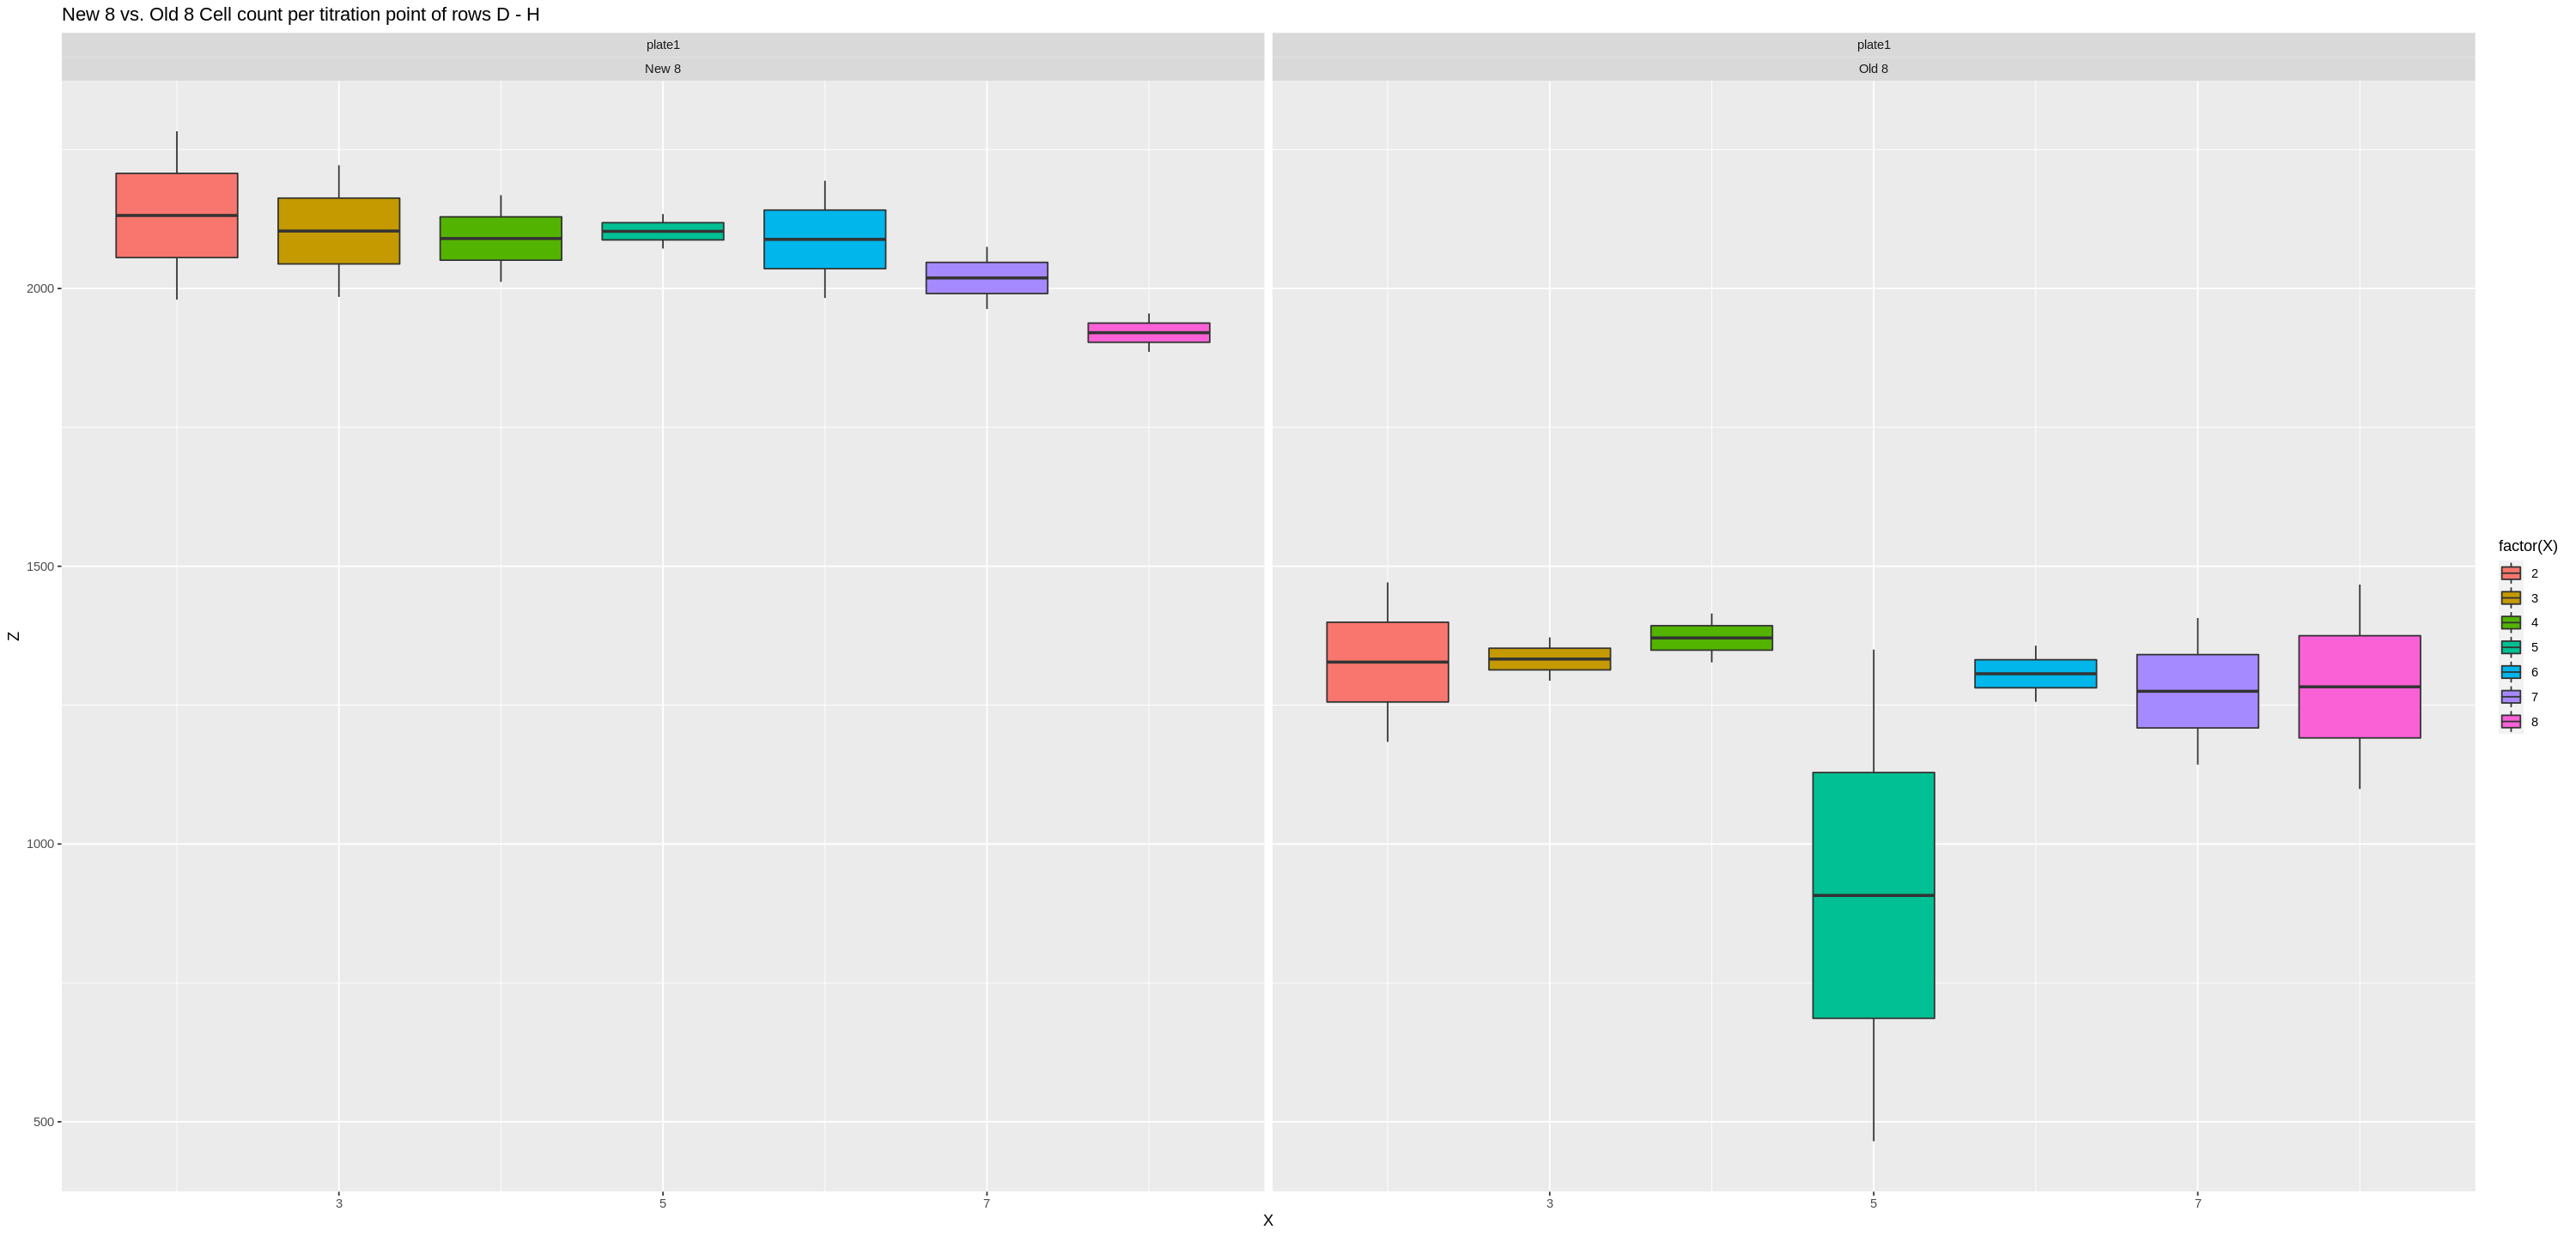

In [55]:
# D-H old 8 vs new 8
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

In [11]:
#df_boxp_new8_ls <- do.call(rbind, df_boxp_new8_ls) %>% 
#                    mutate(method = "New")
#
#df_boxp_old8_ls <- do.call(rbind, df_boxp_old8_ls) %>% 
#                    mutate(method = "Old")
#
#dff <- rbind(df_boxp_new8_ls, df_boxp_old8_ls)

[1] "New 8 vs. Old 8 rows: C - G"


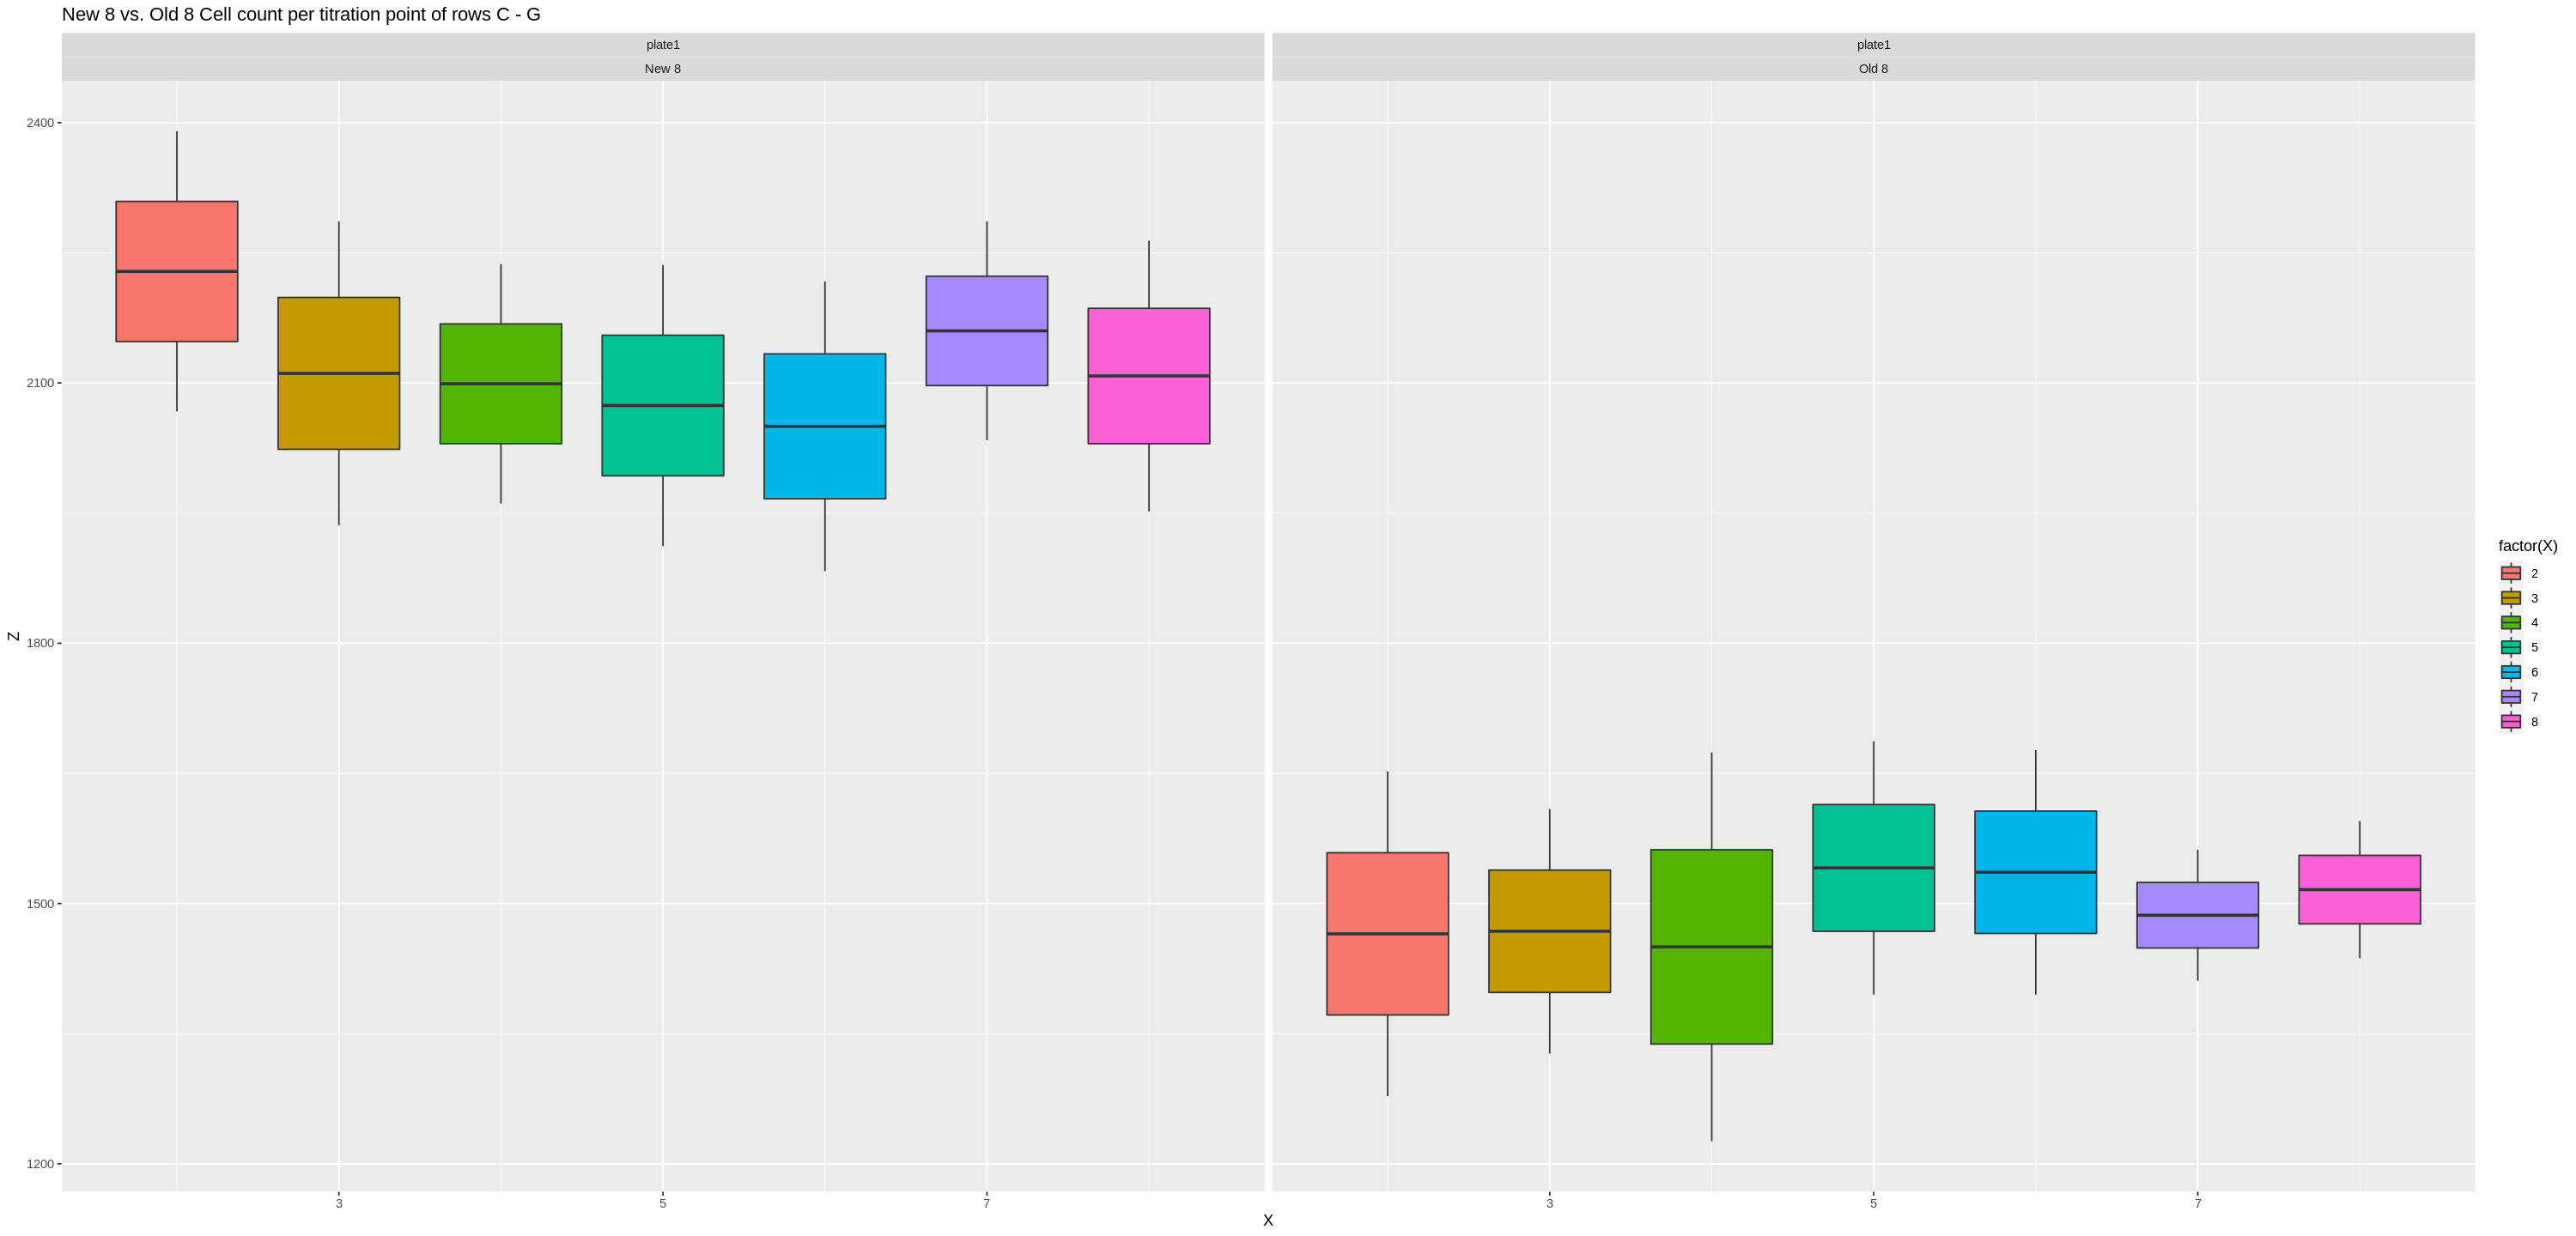

In [56]:
# C-G old 8 vs new 8
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

[1] "New 8 vs. Old 8 rows: B - F"


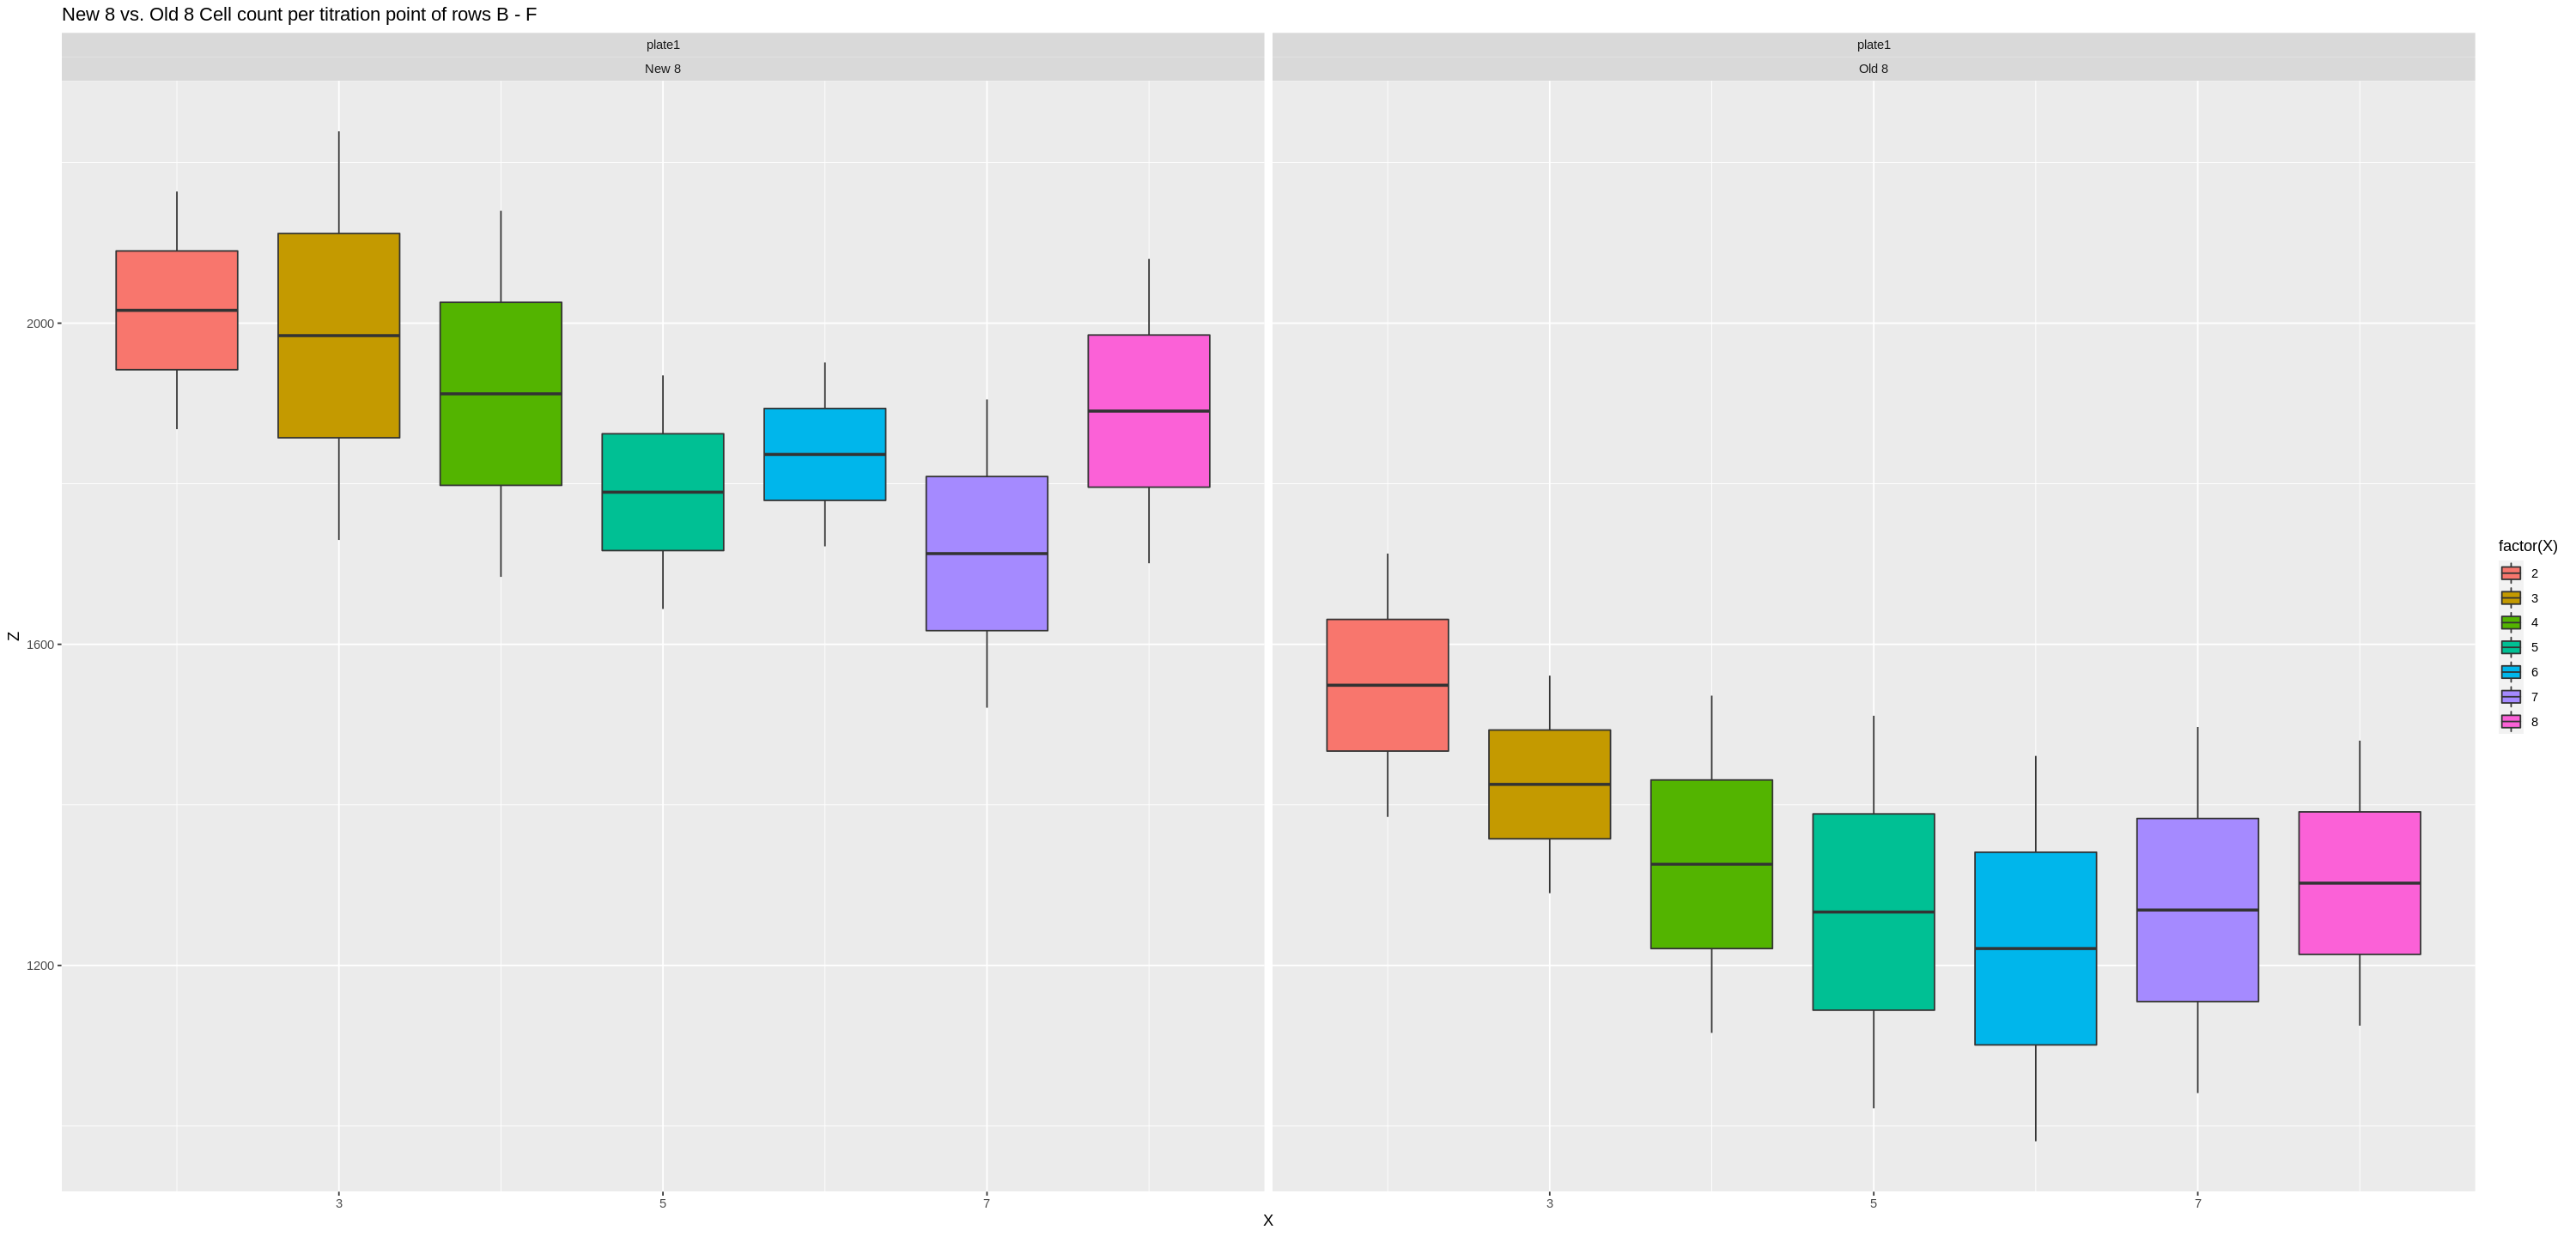

In [57]:
# B-F old 8 vs new 8
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

[1] "New 8 vs. Old 8 rows: A - E"


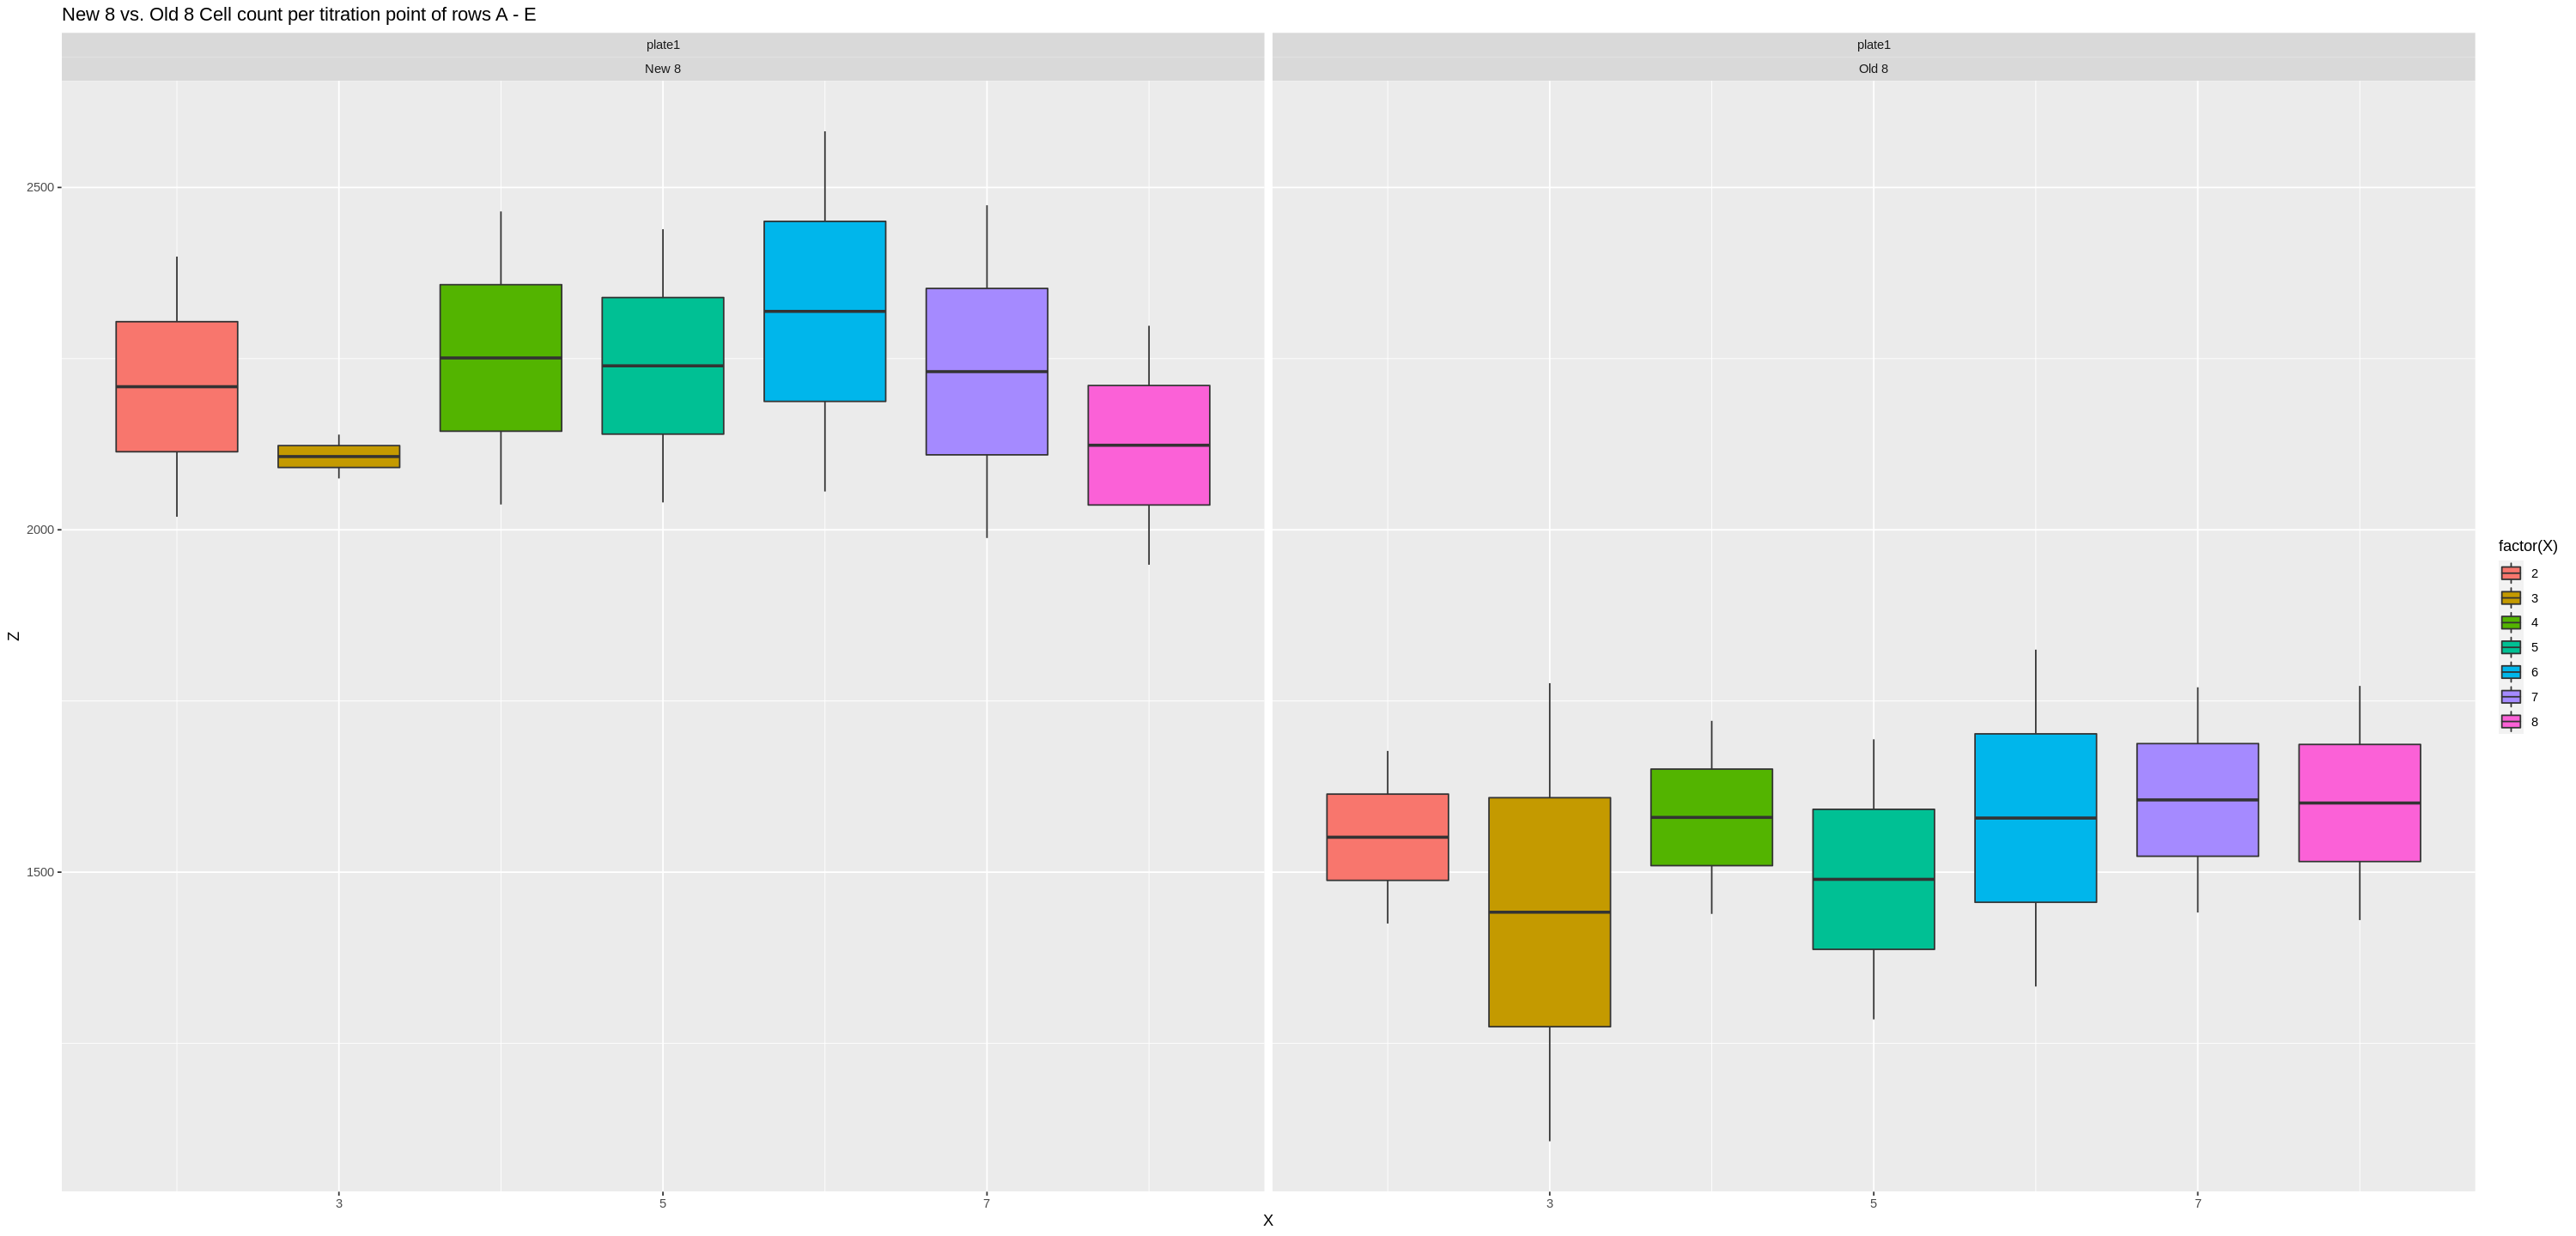

In [58]:
# A-E old 8 vs new 8
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

### combine all data to make general boxplot

In [59]:
dff <- rbind(do.call(rbind, dfn_sub_ls) %>%
             mutate(method = "NEW 8"), do.call(rbind, dfo_sub_ls) %>%
             mutate(method = "OLD 8")) %>%
        
       mutate(subgroup = case_when(
           Y == "A" & X == 2 ~ "A2-E2",
           Y == "A" & X == 3 ~ "A3-E3",
           Y == "A" & X == 4 ~ "A4-E4",
           Y == "A" & X == 5 ~ "A5-E5",
           Y == "A" & X == 6 ~ "A6-E6",
           Y == "A" & X == 7 ~ "A7-E7",
           Y == "A" & X == 8 ~ "A8-E8",
           Y == "B" & X == 2 ~ "B2-F2",
           Y == "B" & X == 3 ~ "B3-F3",
           Y == "B" & X == 4 ~ "B4-F4",
           Y == "B" & X == 5 ~ "B5-F5",
           Y == "B" & X == 6 ~ "B6-F6",
           Y == "B" & X == 7 ~ "B7-F7",
           Y == "B" & X == 8 ~ "B8-F8",
           Y == "C" & X == 2 ~ "C2-G2",
           Y == "C" & X == 3 ~ "C3-G3",
           Y == "C" & X == 4 ~ "C4-G4",
           Y == "C" & X == 5 ~ "C5-G5",
           Y == "C" & X == 6 ~ "C6-G6",
           Y == "C" & X == 7 ~ "C7-G7",
           Y == "C" & X == 8 ~ "C8-G8",
           Y == "D" & X == 2 ~ "D2-H2",
           Y == "D" & X == 3 ~ "D3-H3",
           Y == "D" & X == 4 ~ "D4-H4",
           Y == "D" & X == 5 ~ "D5-H5",
           Y == "D" & X == 6 ~ "D6-H6",
           Y == "D" & X == 7 ~ "D7-H7",
           Y == "D" & X == 8 ~ "D8-H8",
           Y == "E" & X == 2 ~ "A2-E2",
           Y == "E" & X == 3 ~ "A3-E3",
           Y == "E" & X == 4 ~ "A4-E4",
           Y == "E" & X == 5 ~ "A5-E5",
           Y == "E" & X == 6 ~ "A6-E6",
           Y == "E" & X == 7 ~ "A7-E7",
           Y == "E" & X == 8 ~ "A8-E8",
           Y == "F" & X == 2 ~ "B2-F2",
           Y == "F" & X == 3 ~ "B3-F3",
           Y == "F" & X == 4 ~ "B4-F4",
           Y == "F" & X == 5 ~ "B5-F5",
           Y == "F" & X == 6 ~ "B6-F6",
           Y == "F" & X == 7 ~ "B7-F7",
           Y == "F" & X == 8 ~ "B8-F8",
           Y == "G" & X == 2 ~ "C2-G2",
           Y == "G" & X == 3 ~ "C3-G3",
           Y == "G" & X == 4 ~ "C4-G4",
           Y == "G" & X == 5 ~ "C5-G5",
           Y == "G" & X == 6 ~ "C6-G6",
           Y == "G" & X == 7 ~ "C7-G7",
           Y == "G" & X == 8 ~ "C8-G8",
           Y == "H" & X == 2 ~ "D2-H2",
           Y == "H" & X == 3 ~ "D3-H3",
           Y == "H" & X == 4 ~ "D4-H4",
           Y == "H" & X == 5 ~ "D5-H5",
           Y == "H" & X == 6 ~ "D6-H6",
           Y == "H" & X == 7 ~ "D7-H7",
           Y == "H" & X == 8 ~ "D8-H8"
           )
          ) %>%
    mutate(wellid = paste0(Y, X))

In [60]:
head(dff)

X Y Z    method subgroup wellid
1 2 A 2399 NEW 8  A2-E2    A2    
2 3 A 2139 NEW 8  A3-E3    A3    
3 4 A 2465 NEW 8  A4-E4    A4    
4 5 A 2439 NEW 8  A5-E5    A5    
5 6 A 2582 NEW 8  A6-E6    A6    
6 7 A 2474 NEW 8  A7-E7    A7

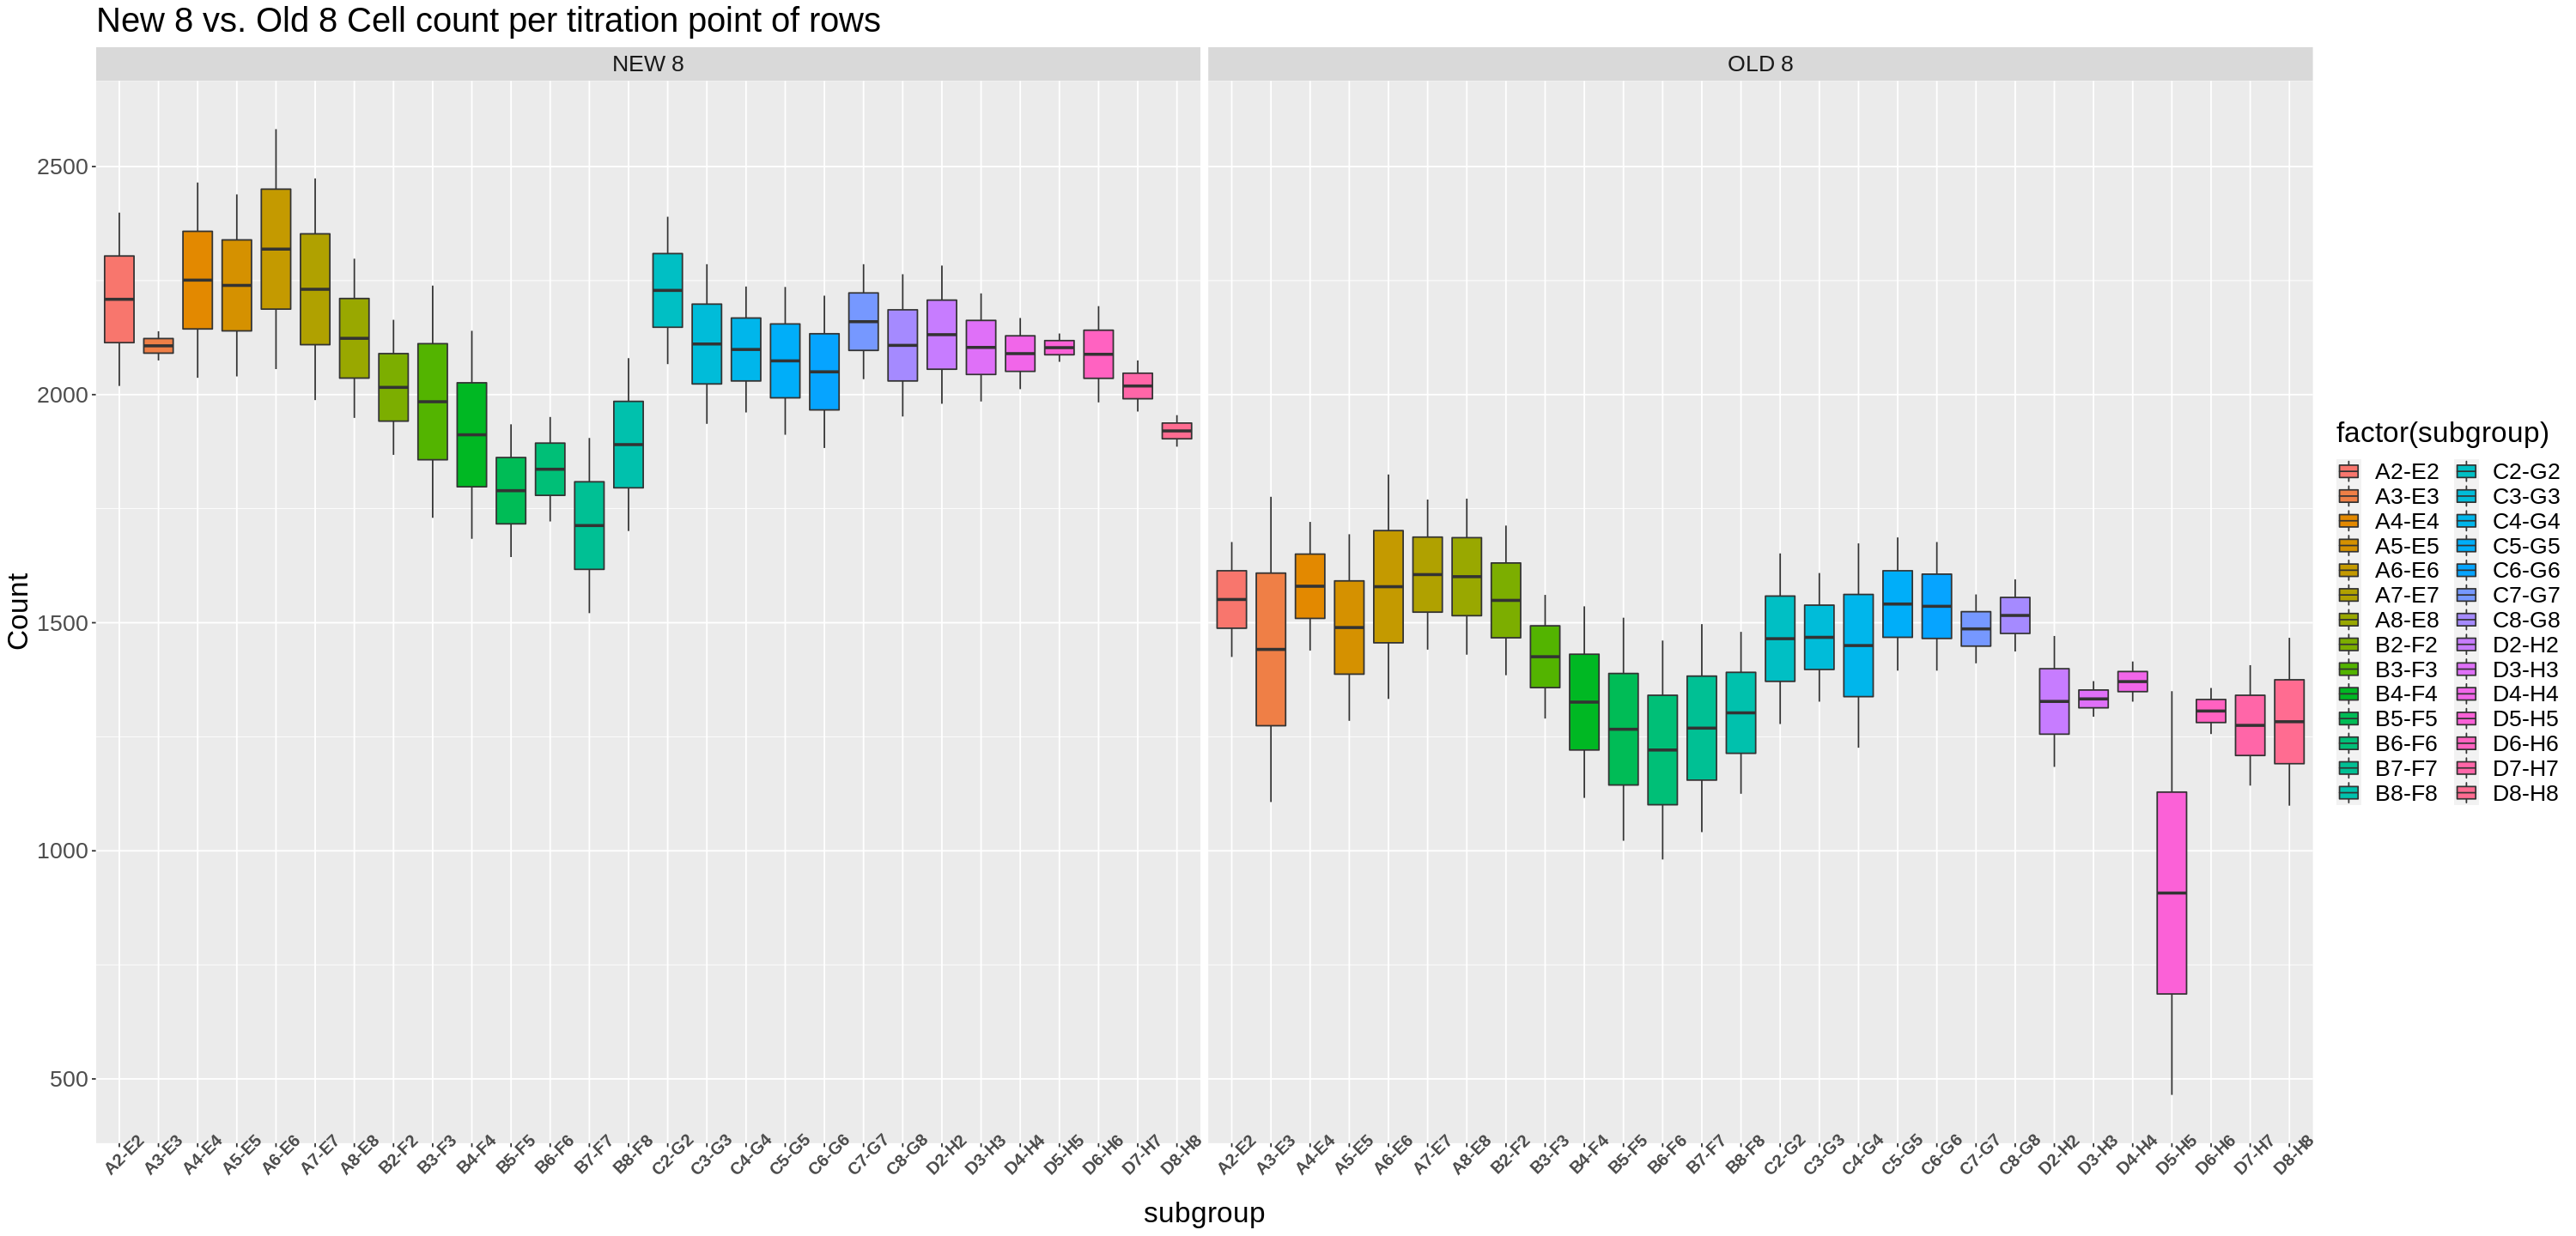

In [61]:
ggplot(dff, aes(x=subgroup,y=Z, fill = factor(subgroup))) +
  geom_boxplot() + 
  labs(title="New 8 vs. Old 8 Cell count per titration point of rows") +
  ylab("Count") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

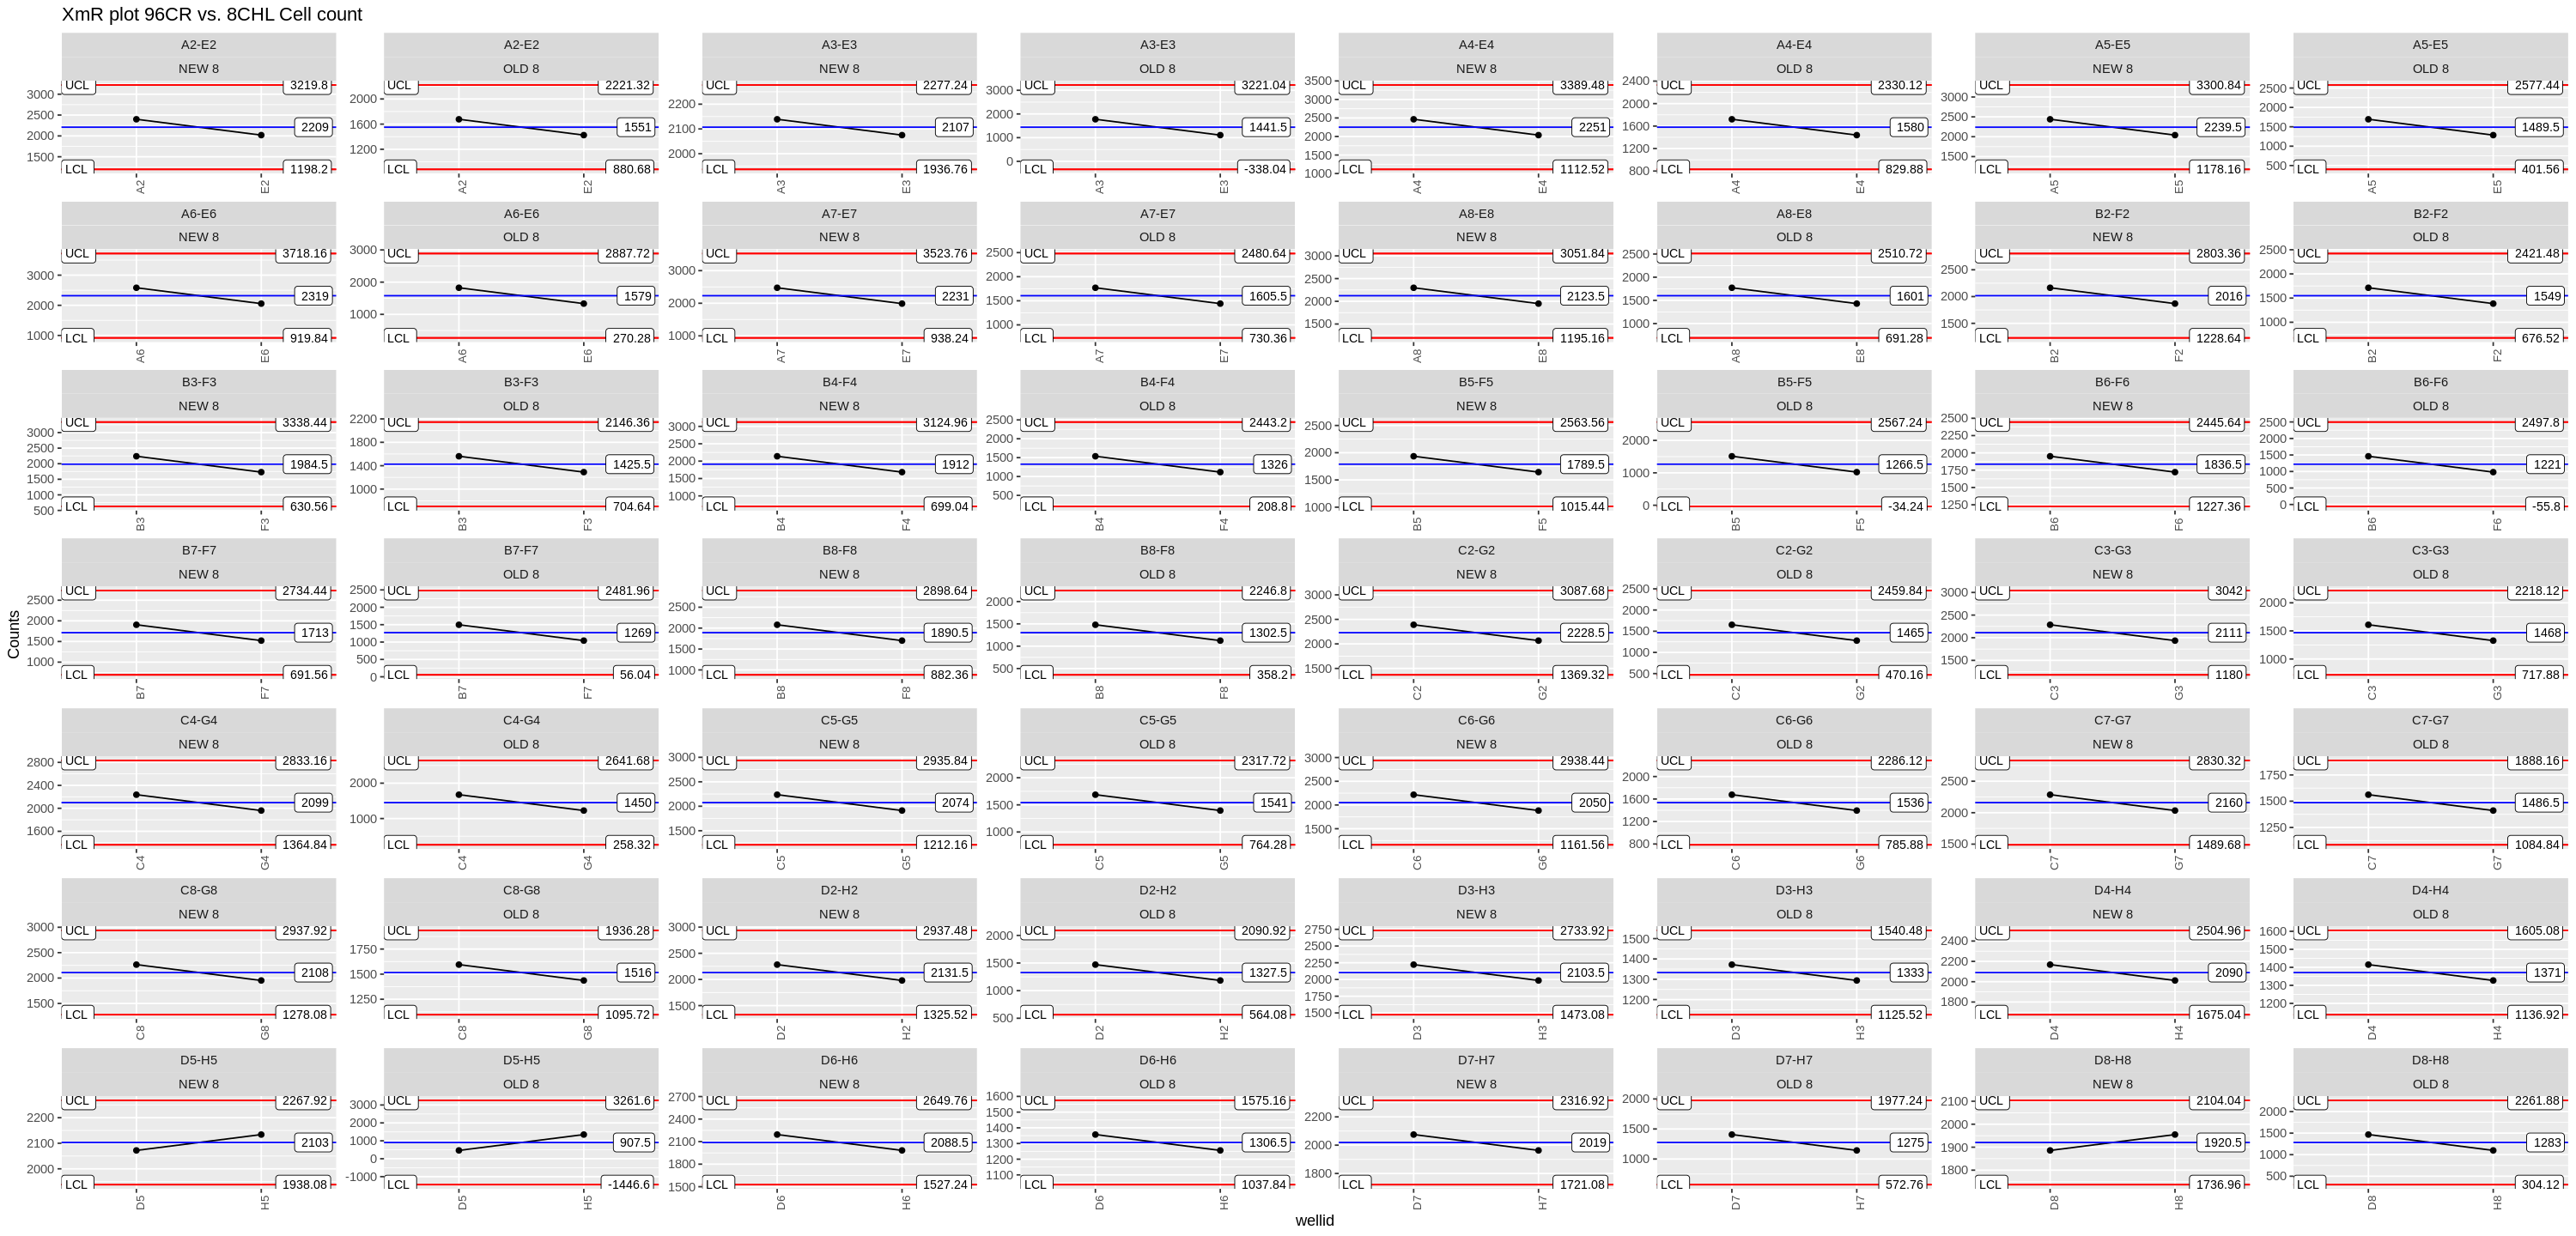

In [62]:
ggplot(dff, aes(x=wellid, y=Z, group=subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("Counts") +
  facet_wrap(subgroup~method, scales = "free") +
  ggtitle("XmR plot 96CR vs. 8CHL Cell count") + 
  theme(axis.text.x = element_text(size = 8, angle = 90))

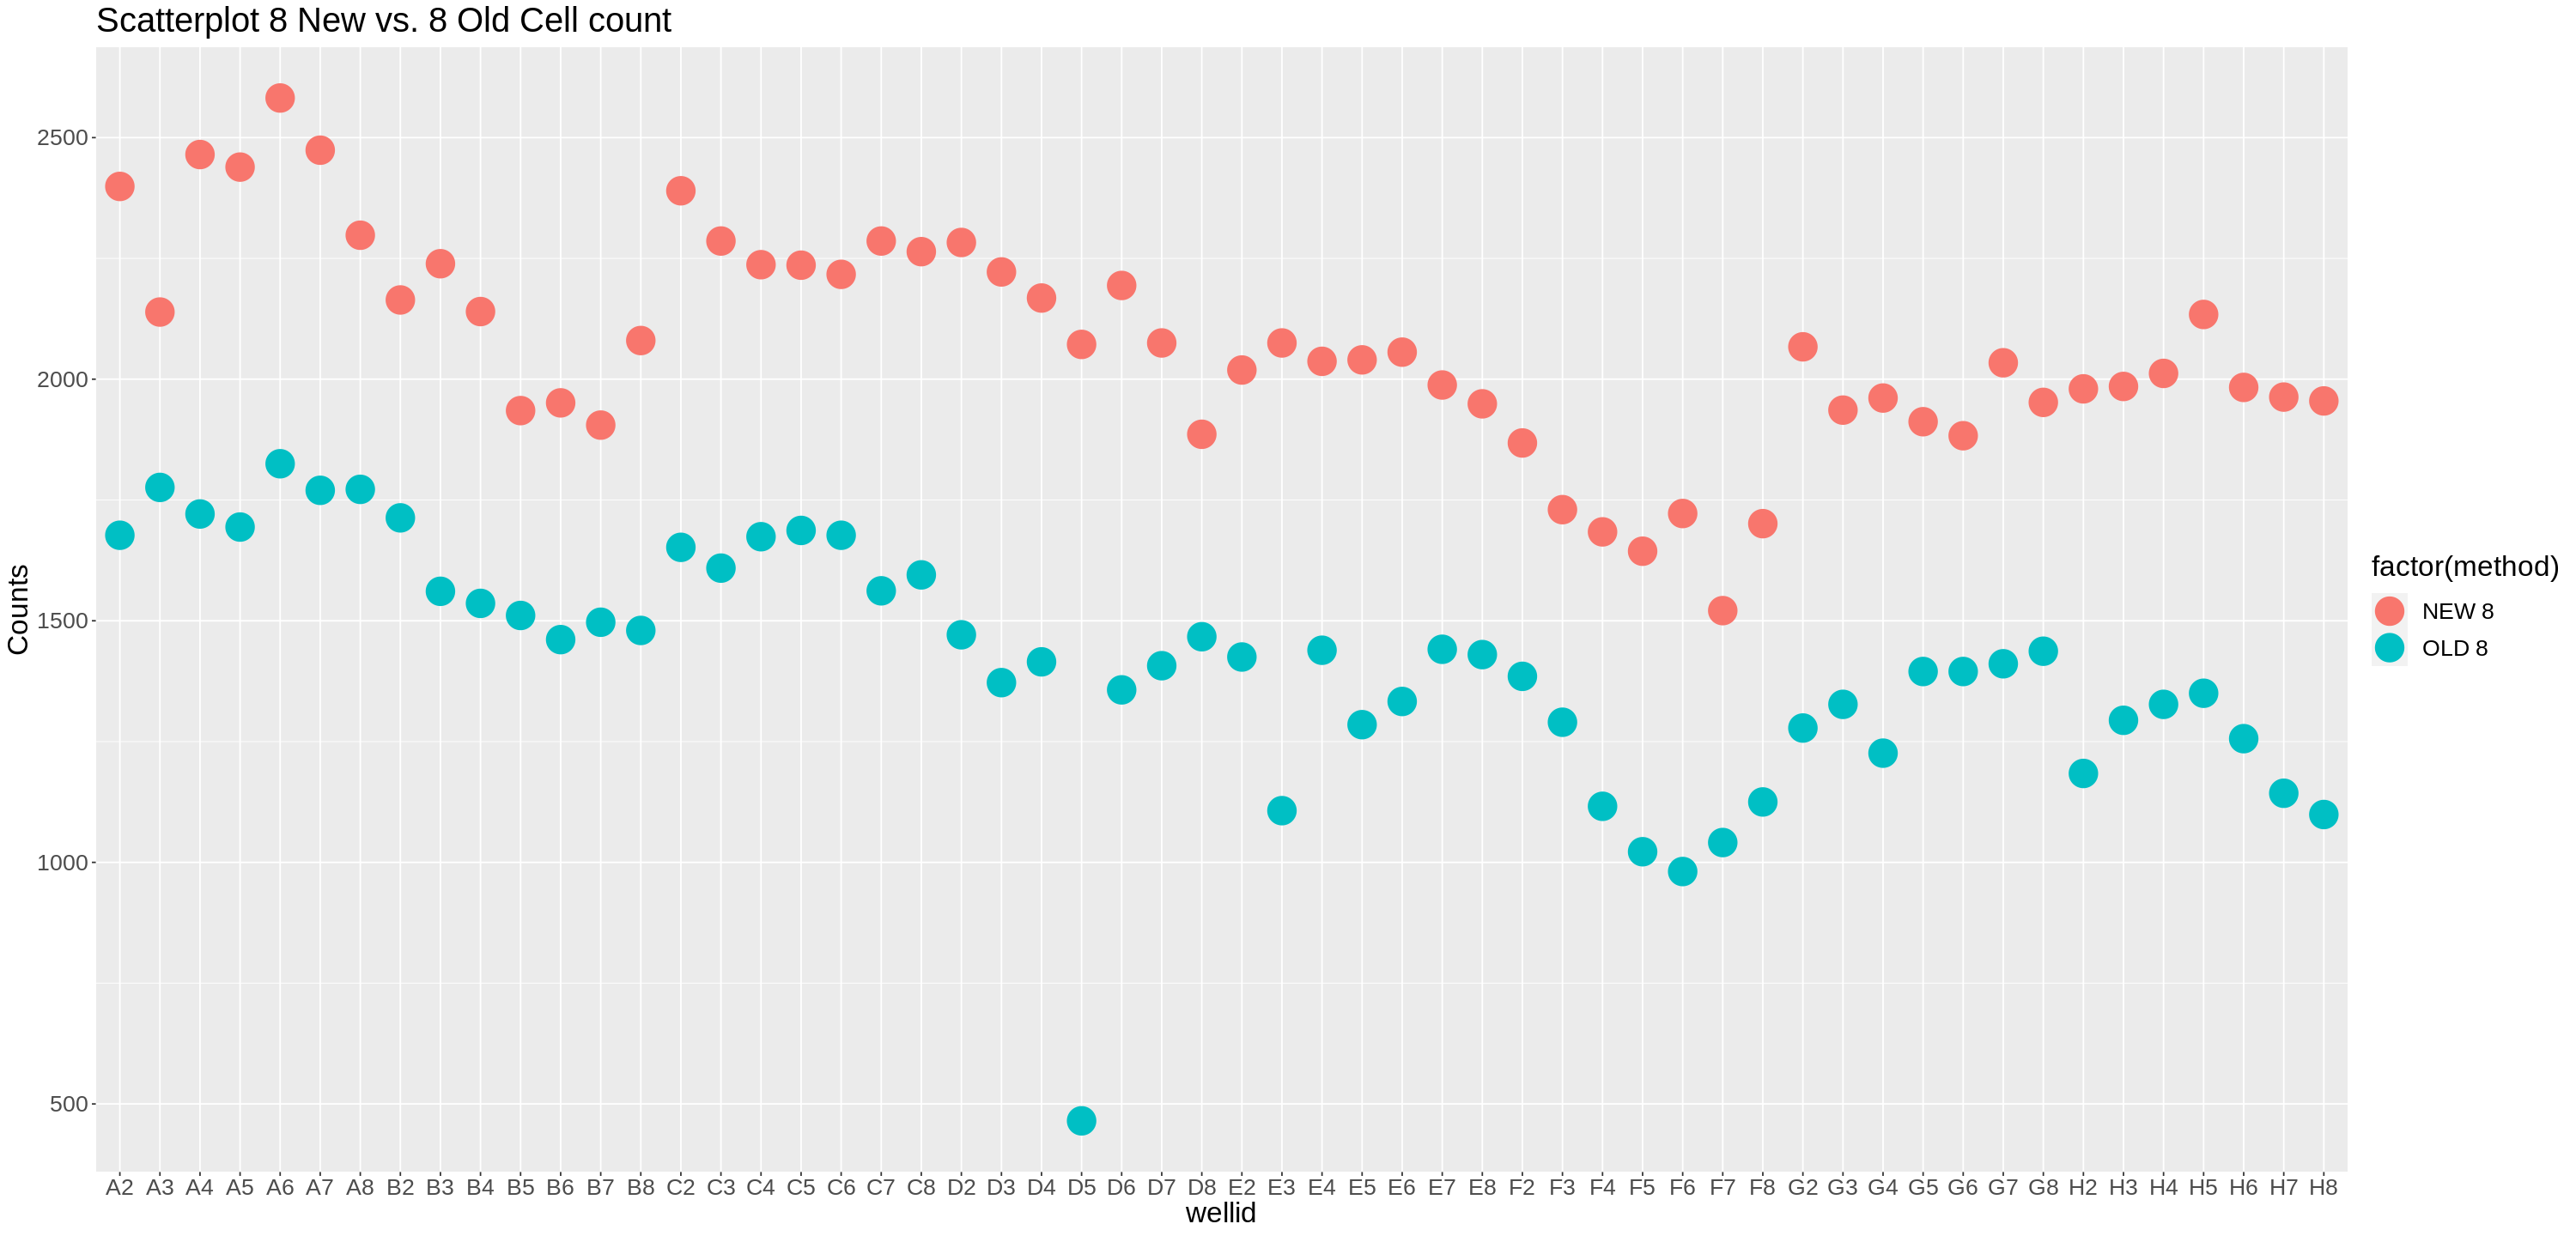

In [63]:
ggplot(dff, aes(x=wellid, y=Z) ) +
  geom_point(size = 9, aes(colour = factor(method))) + 
  ylab("Counts") +
  ggtitle("Scatterplot 8 New vs. 8 Old Cell count") +
  theme(text = element_text(size=20))

#### Summary statistics for new 8 

In [64]:
# A-E new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: A - E"
[1] "A / E : 2"
       Z       
 Min.   :2019  
 1st Qu.:2114  
 Median :2209  
 Mean   :2209  
 3rd Qu.:2304  
 Max.   :2399  
[1] "A / E : 3"
       Z       
 Min.   :2075  
 1st Qu.:2091  
 Median :2107  
 Mean   :2107  
 3rd Qu.:2123  
 Max.   :2139  
[1] "A / E : 4"
       Z       
 Min.   :2037  
 1st Qu.:2144  
 Median :2251  
 Mean   :2251  
 3rd Qu.:2358  
 Max.   :2465  
[1] "A / E : 5"
       Z       
 Min.   :2040  
 1st Qu.:2140  
 Median :2240  
 Mean   :2240  
 3rd Qu.:2339  
 Max.   :2439  
[1] "A / E : 6"
       Z       
 Min.   :2056  
 1st Qu.:2188  
 Median :2319  
 Mean   :2319  
 3rd Qu.:2450  
 Max.   :2582  
[1] "A / E : 7"
       Z       
 Min.   :1988  
 1st Qu.:2110  
 Median :2231  
 Mean   :2231  
 3rd Qu.:2352  
 Max.   :2474  
[1] "A / E : 8"
       Z       
 Min.   :1949  
 1st Qu.:2036  
 Median :2124  
 Mean   :2124  
 3rd Qu.:2211  
 Max.   :2298  


In [65]:
# A-E old 8
summary_ls <- list()
print('summary of each row pair data for old 8')
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for old 8"
[1] "Old 8, 8 rows: A - E"
[1] "A / E : 2"
       Z       
 Min.   :1425  
 1st Qu.:1488  
 Median :1551  
 Mean   :1551  
 3rd Qu.:1614  
 Max.   :1677  
[1] "A / E : 3"
       Z       
 Min.   :1107  
 1st Qu.:1274  
 Median :1442  
 Mean   :1442  
 3rd Qu.:1609  
 Max.   :1776  
[1] "A / E : 4"
       Z       
 Min.   :1439  
 1st Qu.:1510  
 Median :1580  
 Mean   :1580  
 3rd Qu.:1650  
 Max.   :1721  
[1] "A / E : 5"
       Z       
 Min.   :1285  
 1st Qu.:1387  
 Median :1490  
 Mean   :1490  
 3rd Qu.:1592  
 Max.   :1694  
[1] "A / E : 6"
       Z       
 Min.   :1333  
 1st Qu.:1456  
 Median :1579  
 Mean   :1579  
 3rd Qu.:1702  
 Max.   :1825  
[1] "A / E : 7"
       Z       
 Min.   :1441  
 1st Qu.:1523  
 Median :1606  
 Mean   :1606  
 3rd Qu.:1688  
 Max.   :1770  
[1] "A / E : 8"
       Z       
 Min.   :1430  
 1st Qu.:1516  
 Median :1601  
 Mean   :1601  
 3rd Qu.:1686  
 Max.   :1772  


In [66]:
# B-F new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: B - F"
[1] "B / F : 2"
       Z       
 Min.   :1868  
 1st Qu.:1942  
 Median :2016  
 Mean   :2016  
 3rd Qu.:2090  
 Max.   :2164  
[1] "B / F : 3"
       Z       
 Min.   :1730  
 1st Qu.:1857  
 Median :1984  
 Mean   :1984  
 3rd Qu.:2112  
 Max.   :2239  
[1] "B / F : 4"
       Z       
 Min.   :1684  
 1st Qu.:1798  
 Median :1912  
 Mean   :1912  
 3rd Qu.:2026  
 Max.   :2140  
[1] "B / F : 5"
       Z       
 Min.   :1644  
 1st Qu.:1717  
 Median :1790  
 Mean   :1790  
 3rd Qu.:1862  
 Max.   :1935  
[1] "B / F : 6"
       Z       
 Min.   :1722  
 1st Qu.:1779  
 Median :1836  
 Mean   :1836  
 3rd Qu.:1894  
 Max.   :1951  
[1] "B / F : 7"
       Z       
 Min.   :1521  
 1st Qu.:1617  
 Median :1713  
 Mean   :1713  
 3rd Qu.:1809  
 Max.   :1905  
[1] "B / F : 8"
       Z       
 Min.   :1701  
 1st Qu.:1796  
 Median :1890  
 Mean   :1890  
 3rd Qu.:1985  
 Max.   :2080  


In [67]:
# B-F old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: B - F"
[1] "B / F : 2"
       Z       
 Min.   :1385  
 1st Qu.:1467  
 Median :1549  
 Mean   :1549  
 3rd Qu.:1631  
 Max.   :1713  
[1] "B / F : 3"
       Z       
 Min.   :1290  
 1st Qu.:1358  
 Median :1426  
 Mean   :1426  
 3rd Qu.:1493  
 Max.   :1561  
[1] "B / F : 4"
       Z       
 Min.   :1116  
 1st Qu.:1221  
 Median :1326  
 Mean   :1326  
 3rd Qu.:1431  
 Max.   :1536  
[1] "B / F : 5"
       Z       
 Min.   :1022  
 1st Qu.:1144  
 Median :1266  
 Mean   :1266  
 3rd Qu.:1389  
 Max.   :1511  
[1] "B / F : 6"
       Z       
 Min.   : 981  
 1st Qu.:1101  
 Median :1221  
 Mean   :1221  
 3rd Qu.:1341  
 Max.   :1461  
[1] "B / F : 7"
       Z       
 Min.   :1041  
 1st Qu.:1155  
 Median :1269  
 Mean   :1269  
 3rd Qu.:1383  
 Max.   :1497  
[1] "B / F : 8"
       Z       
 Min.   :1125  
 1st Qu.:1214  
 Median :1302  
 Mean   :1302  
 3rd Qu.:1391  
 Max.   :1480  


In [68]:
# C-G new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: C - G"
[1] "C / G : 2"
       Z       
 Min.   :2067  
 1st Qu.:2148  
 Median :2228  
 Mean   :2228  
 3rd Qu.:2309  
 Max.   :2390  
[1] "C / G : 3"
       Z       
 Min.   :1936  
 1st Qu.:2024  
 Median :2111  
 Mean   :2111  
 3rd Qu.:2198  
 Max.   :2286  
[1] "C / G : 4"
       Z       
 Min.   :1961  
 1st Qu.:2030  
 Median :2099  
 Mean   :2099  
 3rd Qu.:2168  
 Max.   :2237  
[1] "C / G : 5"
       Z       
 Min.   :1912  
 1st Qu.:1993  
 Median :2074  
 Mean   :2074  
 3rd Qu.:2155  
 Max.   :2236  
[1] "C / G : 6"
       Z       
 Min.   :1883  
 1st Qu.:1966  
 Median :2050  
 Mean   :2050  
 3rd Qu.:2134  
 Max.   :2217  
[1] "C / G : 7"
       Z       
 Min.   :2034  
 1st Qu.:2097  
 Median :2160  
 Mean   :2160  
 3rd Qu.:2223  
 Max.   :2286  
[1] "C / G : 8"
       Z       
 Min.   :1952  
 1st Qu.:2030  
 Median :2108  
 Mean   :2108  
 3rd Qu.:2186  
 Max.   :2264  


In [69]:
# C-G old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: C - G"
[1] "C / G : 2"
       Z       
 Min.   :1278  
 1st Qu.:1372  
 Median :1465  
 Mean   :1465  
 3rd Qu.:1558  
 Max.   :1652  
[1] "C / G : 3"
       Z       
 Min.   :1327  
 1st Qu.:1398  
 Median :1468  
 Mean   :1468  
 3rd Qu.:1538  
 Max.   :1609  
[1] "C / G : 4"
       Z       
 Min.   :1226  
 1st Qu.:1338  
 Median :1450  
 Mean   :1450  
 3rd Qu.:1562  
 Max.   :1674  
[1] "C / G : 5"
       Z       
 Min.   :1395  
 1st Qu.:1468  
 Median :1541  
 Mean   :1541  
 3rd Qu.:1614  
 Max.   :1687  
[1] "C / G : 6"
       Z       
 Min.   :1395  
 1st Qu.:1466  
 Median :1536  
 Mean   :1536  
 3rd Qu.:1606  
 Max.   :1677  
[1] "C / G : 7"
       Z       
 Min.   :1411  
 1st Qu.:1449  
 Median :1486  
 Mean   :1486  
 3rd Qu.:1524  
 Max.   :1562  
[1] "C / G : 8"
       Z       
 Min.   :1437  
 1st Qu.:1476  
 Median :1516  
 Mean   :1516  
 3rd Qu.:1556  
 Max.   :1595  


In [70]:
# D-H new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: D - H"
[1] "D / H : 2"
       Z       
 Min.   :1980  
 1st Qu.:2056  
 Median :2132  
 Mean   :2132  
 3rd Qu.:2207  
 Max.   :2283  
[1] "D / H : 3"
       Z       
 Min.   :1985  
 1st Qu.:2044  
 Median :2104  
 Mean   :2104  
 3rd Qu.:2163  
 Max.   :2222  
[1] "D / H : 4"
       Z       
 Min.   :2012  
 1st Qu.:2051  
 Median :2090  
 Mean   :2090  
 3rd Qu.:2129  
 Max.   :2168  
[1] "D / H : 5"
       Z       
 Min.   :2072  
 1st Qu.:2088  
 Median :2103  
 Mean   :2103  
 3rd Qu.:2118  
 Max.   :2134  
[1] "D / H : 6"
       Z       
 Min.   :1983  
 1st Qu.:2036  
 Median :2088  
 Mean   :2088  
 3rd Qu.:2141  
 Max.   :2194  
[1] "D / H : 7"
       Z       
 Min.   :1963  
 1st Qu.:1991  
 Median :2019  
 Mean   :2019  
 3rd Qu.:2047  
 Max.   :2075  
[1] "D / H : 8"
       Z       
 Min.   :1886  
 1st Qu.:1903  
 Median :1920  
 Mean   :1920  
 3rd Qu.:1938  
 Max.   :1955  


In [71]:
# D-H old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: D - H"
[1] "D / H : 2"
       Z       
 Min.   :1184  
 1st Qu.:1256  
 Median :1328  
 Mean   :1328  
 3rd Qu.:1399  
 Max.   :1471  
[1] "D / H : 3"
       Z       
 Min.   :1294  
 1st Qu.:1314  
 Median :1333  
 Mean   :1333  
 3rd Qu.:1352  
 Max.   :1372  
[1] "D / H : 4"
       Z       
 Min.   :1327  
 1st Qu.:1349  
 Median :1371  
 Mean   :1371  
 3rd Qu.:1393  
 Max.   :1415  
[1] "D / H : 5"
       Z         
 Min.   : 465.0  
 1st Qu.: 686.2  
 Median : 907.5  
 Mean   : 907.5  
 3rd Qu.:1128.8  
 Max.   :1350.0  
[1] "D / H : 6"
       Z       
 Min.   :1256  
 1st Qu.:1281  
 Median :1306  
 Mean   :1306  
 3rd Qu.:1332  
 Max.   :1357  
[1] "D / H : 7"
       Z       
 Min.   :1143  
 1st Qu.:1209  
 Median :1275  
 Mean   :1275  
 3rd Qu.:1341  
 Max.   :1407  
[1] "D / H : 8"
       Z       
 Min.   :1099  
 1st Qu.:1191  
 Median :1283  
 Mean   :1283  
 3rd Qu.:1375  
 Max.   :1467  


#### ANOVA test for each set of three plates
- Compute the analysis of variance for new 8 channel rows A-E
- Summary of the analysis
- As the p-value is less than the significance level 0.05, 
- we can conclude that there are significant differences between the 
- groups highlighted with “*" in the model summary
- In one-way ANOVA test, a significant p-value indicates that some of the group means are different, but we don’t know which pairs of groups are different.
- It’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.
- Use the Tukey to conduct this
- anova shows high p-value meaning all 12 rows in total are similar
- pairewise.t.test() can be also used to calculate pairwise comparisons 
- between group levels with corrections for multiple testing
- The result is a table of p-values for the pairwise comparisons. 
- Here, the p-values have been adjusted by the Benjamini-Hochberg method.

In [72]:
rbind(df.new, df.old)

X Y Z    plate  method
1  2 D 2283 plate1 New 8 
2  3 D 2222 plate1 New 8 
3  4 D 2168 plate1 New 8 
4  5 D 2072 plate1 New 8 
5  6 D 2194 plate1 New 8 
6  7 D 2075 plate1 New 8 
7  8 D 1886 plate1 New 8 
8  2 H 1980 plate1 New 8 
9  3 H 1985 plate1 New 8 
10 4 H 2012 plate1 New 8 
11 5 H 2134 plate1 New 8 
12 6 H 1983 plate1 New 8 
13 7 H 1963 plate1 New 8 
14 8 H 1955 plate1 New 8 
15 2 D 1471 plate1 Old 8 
16 3 D 1372 plate1 Old 8 
17 4 D 1415 plate1 Old 8 
18 5 D  465 plate1 Old 8 
19 6 D 1357 plate1 Old 8 
20 7 D 1407 plate1 Old 8 
21 8 D 1467 plate1 Old 8 
22 2 H 1184 plate1 Old 8 
23 3 H 1294 plate1 Old 8 
24 4 H 1327 plate1 Old 8 
25 5 H 1350 plate1 Old 8 
26 6 H 1256 plate1 Old 8 
27 7 H 1143 plate1 Old 8 
28 8 H 1099 plate1 Old 8

In [75]:
# A-E
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

dff <- rbind(df.old, df.new)

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_plt3_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: A - E"
[1] "A / E : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  99856   99856   0.457  0.569
Residuals    2 437060  218530               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff      lwr     upr     p adj
E2-A2 -316 -2325.64 1693.64 0.5687328

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   A2  
E2 0.57

P value adjustment method: BH 
[1] "A / E : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1 134322  134322   0.503  0.552
Residuals    2 534397  267198               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
        diff       lwr      upr     p adj
E3-A3 -366.5 -2588.681 1855.681

In [76]:
# B-F
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_plt3_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: B - F"
[1] "B / F : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  97344   97344   0.892  0.445
Residuals    2 218345  109173               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr     p adj
F2-B2 -312 -1732.428 1108.428 0.4446862

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   B2  
F2 0.44

P value adjustment method: BH 
[1] "B / F : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1 152100  152100   0.931  0.436
Residuals    2 326642  163321               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr     p adj
F3-B3 -390 -2127.336 1347.336

In [94]:
# C-G
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))
print(paste("ANOVA 8 rows:", pat1, "-", pat2))
dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_plt3_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: C - G"
[1] "C / G : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   6162    6162   0.021  0.899
Residuals    2 597190  298595               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr     p adj
G2-C2 78.5 -2270.614 2427.614 0.8989363

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   C2 
G2 0.9

P value adjustment method: BH 
[1] "C / G : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  23409   23409   0.064  0.824
Residuals    2 731309  365654               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff      lwr     upr     p adj
G3-C3  153 -2446.55 2752.55 0.823

In [77]:
# D-H
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))
print(paste("ANOVA 8 rows:", pat1, "-", pat2))
dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_plt3_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: D - H"
[1] "D / H : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  87025   87025   0.269  0.656
Residuals    2 646480  323240               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr    p adj
H2-D2 -295 -2739.135 2149.135 0.655545

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   D2  
H2 0.66

P value adjustment method: BH 
[1] "D / H : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  24806   24806   0.083  0.801
Residuals    2 599991  299995               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
        diff       lwr      upr     p adj
H3-D3 -157.5 -2512.115 2197.1

### "residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

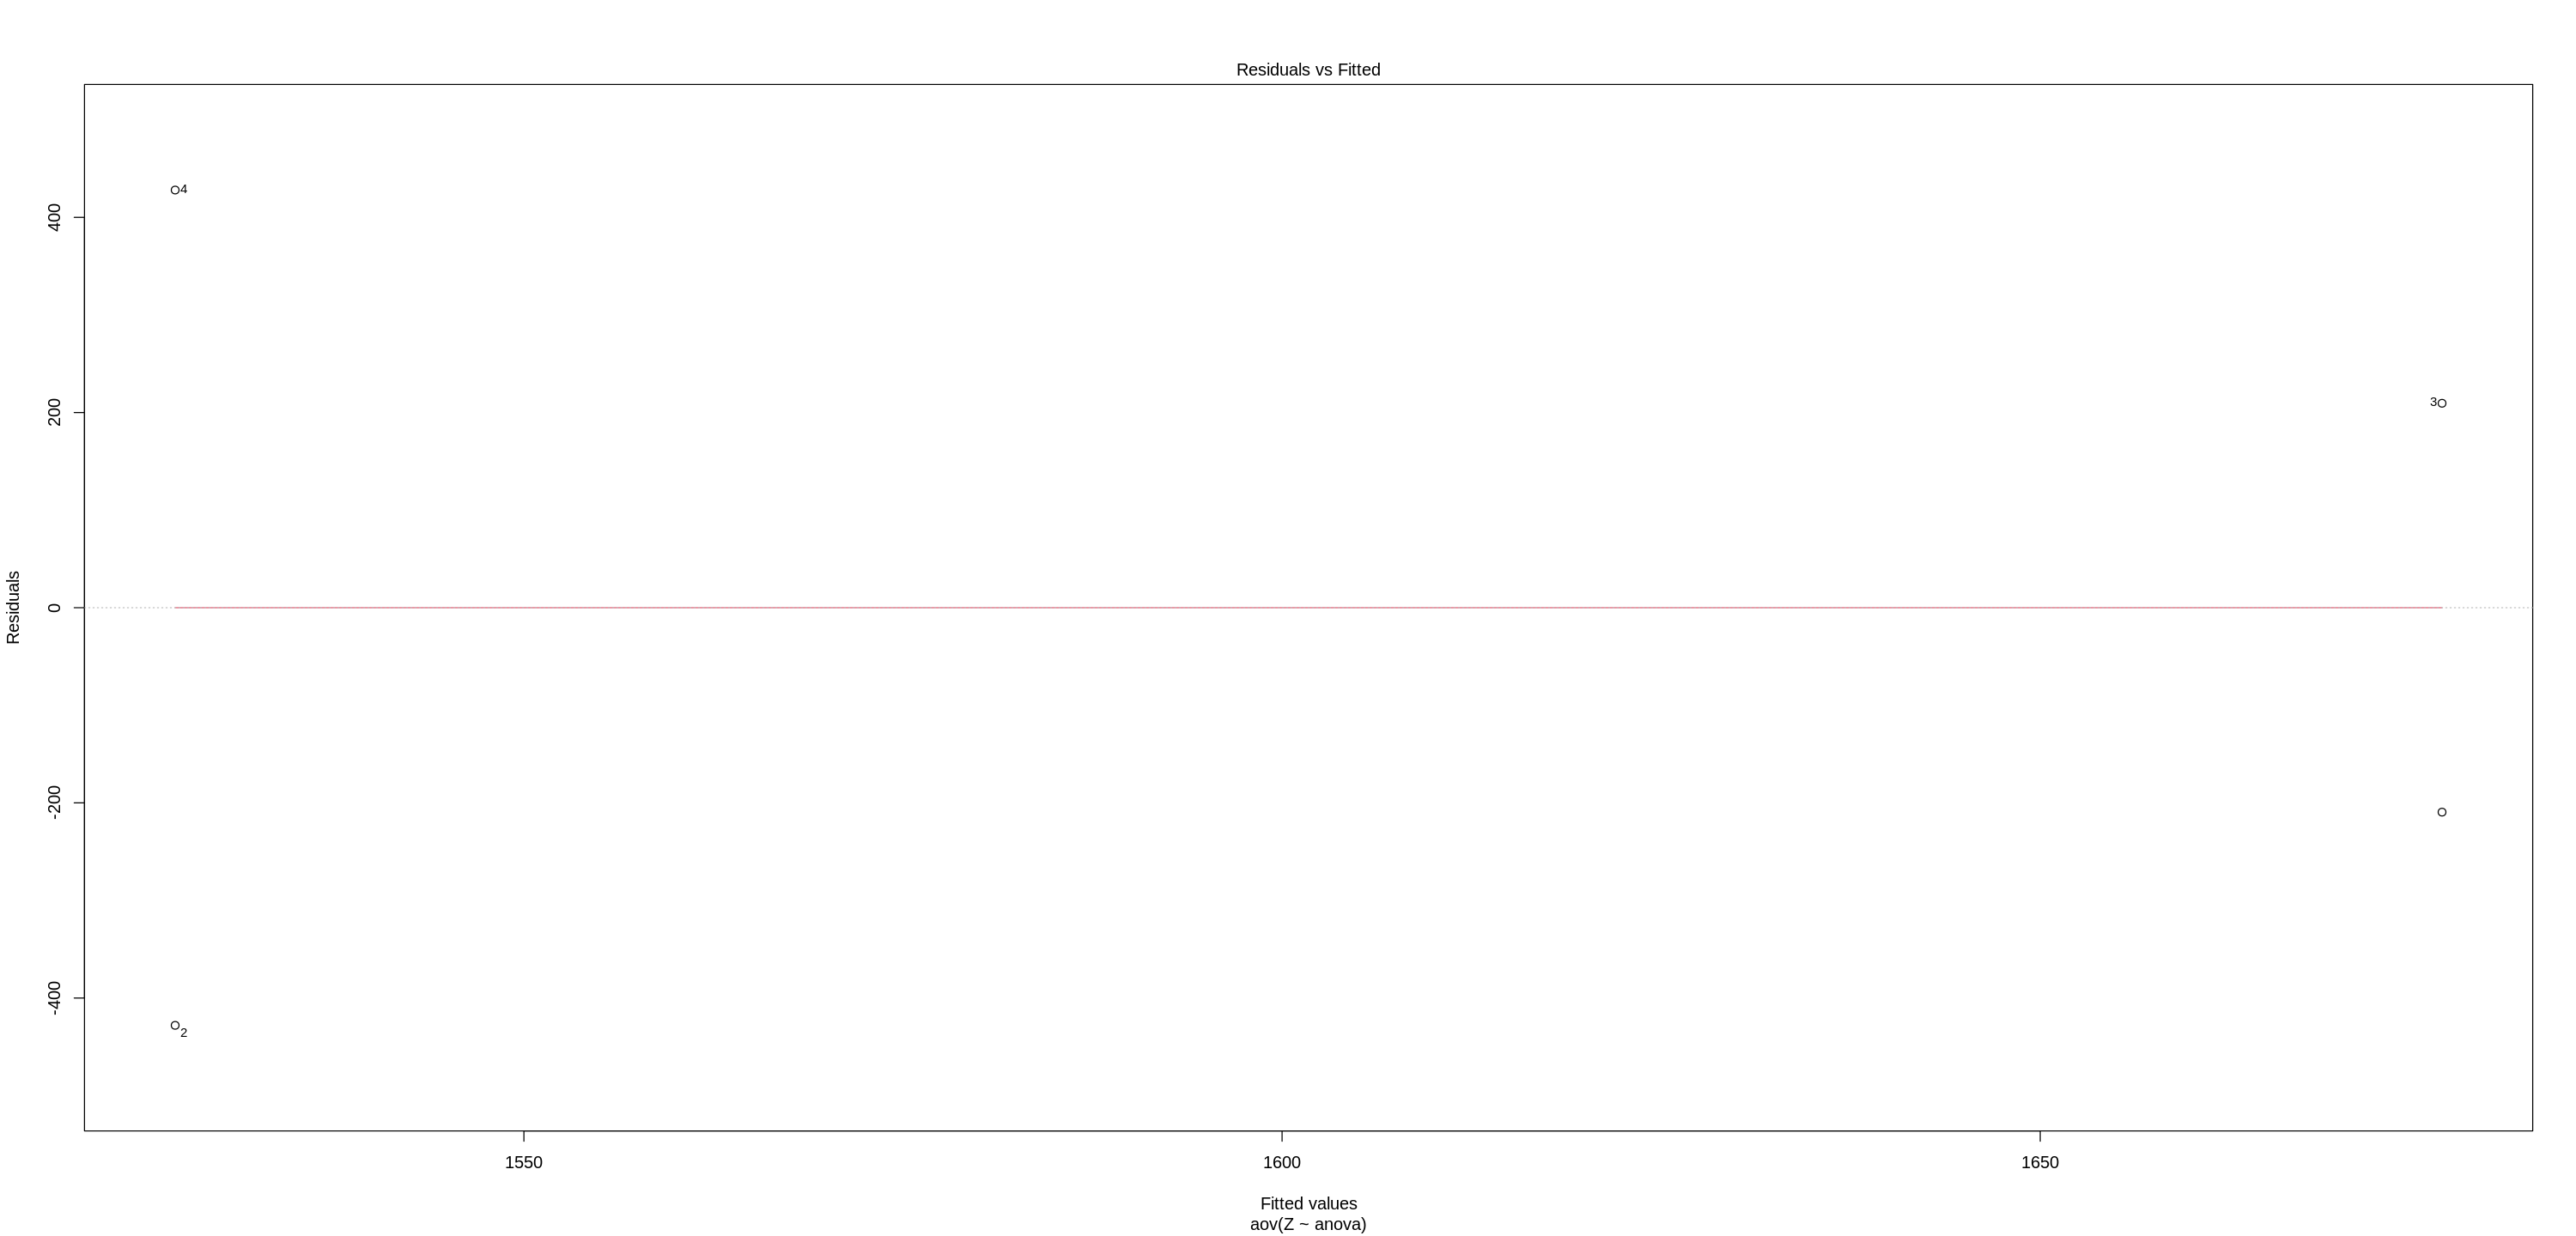

In [78]:
plot(res.aov, 1)

#### USE SI AS SAMPLE DATA

In [79]:
dfsi_new8 <- list()
dfsi_old8 <- list()
new8_file <- list.files(parentdir, pattern = "2021-07-20.*NEW8_DF.*")
old8_file <- list.files(parentdir, pattern = "2021-07-20.*OLD8_DF.*")
for (i in seq(1)) {
    dfsi_new8[[i]] <- read.csv(paste0(parentdir, new8_file[i])) %>% 
                        na.omit() %>% select(SAMPLE_NAME, 
                            MFI.,
                            MFI..1,
                            SI,
                            SN) %>%
                        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
                        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric))
    dfsi_old8[[i]] <- read.csv(paste0(parentdir, old8_file[i])) %>% 
                        na.omit() %>% 
                        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
                        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric))
    }

In [80]:
si.pos.new8 <- list()
si.pos.old8 <- list()

for (i in seq(1)) {
    si.pos.new8[[i]] <- dfsi_new8[[i]] %>% select(SI, SAMPLE_NAME ) %>% mutate(wellid = substr(SAMPLE_NAME, 17,19), plate = paste("plate", i), method = "New 8")
    si.pos.old8[[i]] <- dfsi_old8[[i]] %>% select(SI, SAMPLE_NAME ) %>% mutate(wellid = substr(SAMPLE_NAME, 17,19), plate = paste("plate", i), method = "Old 8")
    }

dfm <- do.call(rbind, si.pos.new8) %>% bind_rows(
        do.call(rbind, si.pos.old8)
        )

#### F test for normality
- The p values are big, meaning the variances do not change more from plate 1 to 3

#### Anderson-Darling test
- goodness of fit test that measures how well your data fit a specified distribution.
- H_0: The data follow a specified distribution

#### Shapiro test, bonett test, qq plot to show normality
- shapiro-wilk test - tell if a random sample comes from a normal distribution
- bonett test - measure of kurtosis for normally distributed data
- under the hypothesis of normality, data should have Geary's kurtosis equal to sqrt(2/pi) (0.7979)
- the kurtosis is near .7979, with p-value barely above 0.05, indicating it is slightly normal

In [82]:
# A-E new 8 vs old 8
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    #stat <- ad.test(df.t$SI)
    #df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "A / E : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.26108, num df = 1, denom df = 1, p-value = 0.6015
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 4.030373e-04 1.691268e+02
sample estimates:
ratio of variances 
         0.2610831 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.95259, p-value = 0.7323

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 9.6640, z = -1.4087, p-value = 0.1589
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.9300263
[1] "A / E : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 1.6864, num df = 1, denom df = 1, p-value = 0.8355
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2

In [83]:
# B-F new 8 vs old 8
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
   # stat <- ad.test(df.t$SI)
   # df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
   # print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "B / F : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.56836, num df = 1, denom df = 1, p-value = 0.8225
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 8.773898e-04 3.681796e+02
sample estimates:
ratio of variances 
         0.5683634 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.99016, p-value = 0.9583

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 2.04758, z = -0.23631, p-value = 0.8132
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.8187008
[1] "B / F : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.0067189, num df = 1, denom df = 1, p-value = 0.1041
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interva

In [84]:
# C-G new 8 vs old 8
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    #stat <- ad.test(df.t$SI)
    #df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "C / G : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.3406, num df = 1, denom df = 1, p-value = 0.6726
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 5.257813e-04 2.206339e+02
sample estimates:
ratio of variances 
         0.3405954 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.86386, p-value = 0.2743

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 1.5449, z = -1.4900, p-value = 0.1362
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.9382824
[1] "C / G : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 5.7911, num df = 1, denom df = 1, p-value = 0.5014
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 8.

In [85]:
# D-H new 8 vs old 8
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
#    stat <- ad.test(df.t$SI)
#    df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
#    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "D / H : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.14818, num df = 1, denom df = 1, p-value = 0.4679
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.287447e-04 9.598826e+01
sample estimates:
ratio of variances 
         0.1481783 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.95517, p-value = 0.7485

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 26.18782, z = -0.88793, p-value = 0.3746
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.8788179
[1] "D / H : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 63.548, num df = 1, denom df = 1, p-value = 0.1589
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:

### Summary stats

In [86]:
# for NEW 8 A-E
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "A / E : 2"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 3"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 4"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 5"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 6"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 7"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  
[1] "A / E : 8"
       SI        
 Min.   : 87.11  
 1st Qu.:118.74  
 Median :200.49  
 Mean   :181.24  
 3rd Qu.:238.97  
 Max.   :289.55  


In [87]:
# for OLD A-E
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "A / E : 2"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 3"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 4"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 5"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 6"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 7"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  
[1] "A / E : 8"
       SI        
 Min.   : 30.26  
 1st Qu.: 90.33  
 Median :135.33  
 Mean   :151.54  
 3rd Qu.:218.88  
 Max.   :278.23  


In [88]:
# for NEW 8 B-F
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "B / F : 2"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 3"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 4"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 5"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 6"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 7"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  
[1] "B / F : 8"
       SI       
 Min.   :21.74  
 1st Qu.:39.57  
 Median :55.49  
 Mean   :51.89  
 3rd Qu.:66.28  
 Max.   :73.72  


In [89]:
# for OLD 8 B-F
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "B / F : 2"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 3"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 4"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 5"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 6"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 7"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  
[1] "B / F : 8"
       SI       
 Min.   :21.35  
 1st Qu.:29.67  
 Median :47.47  
 Mean   :47.25  
 3rd Qu.:62.00  
 Max.   :77.79  


In [90]:
# for NEW 8 C-G
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "C / G : 2"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 3"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 4"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 5"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 6"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 7"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.4664  
 3rd Qu.:17.2783  
 Max.   :20.5062  
[1] "C / G : 8"
       SI         
 Min.   : 0.4526  
 1st Qu.:11.1355  
 Median :12.4501  
 Mean   :13.46

In [91]:
# for OLD 8 C-G
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "C / G : 2"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 3"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 4"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 5"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 6"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 7"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  
[1] "C / G : 8"
       SI        
 Min.   : 6.608  
 1st Qu.:10.146  
 Median :11.903  
 Mean   :12.696  
 3rd Qu.:14.176  
 Max.   :21.068  


In [92]:
# for NEW 8 D-H
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "D / H : 2"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 3"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 4"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 5"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 6"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 7"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  
[1] "D / H : 8"
       SI        
 Min.   : 33.56  
 1st Qu.:101.80  
 Median :175.76  
 Mean   :169.68  
 3rd Qu.:232.39  
 Max.   :301.50  


In [93]:
# for OLD 8 D-H
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "D / H : 2"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 3"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 4"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 5"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 6"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 7"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  
[1] "D / H : 8"
       SI        
 Min.   : 43.82  
 1st Qu.: 85.44  
 Median :171.63  
 Mean   :169.59  
 3rd Qu.:210.85  
 Max.   :359.44  


In [94]:
# A-E
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "A / E : 2"
[1] "A / E : 3"
[1] "A / E : 4"
[1] "A / E : 5"
[1] "A / E : 6"
[1] "A / E : 7"
[1] "A / E : 8"


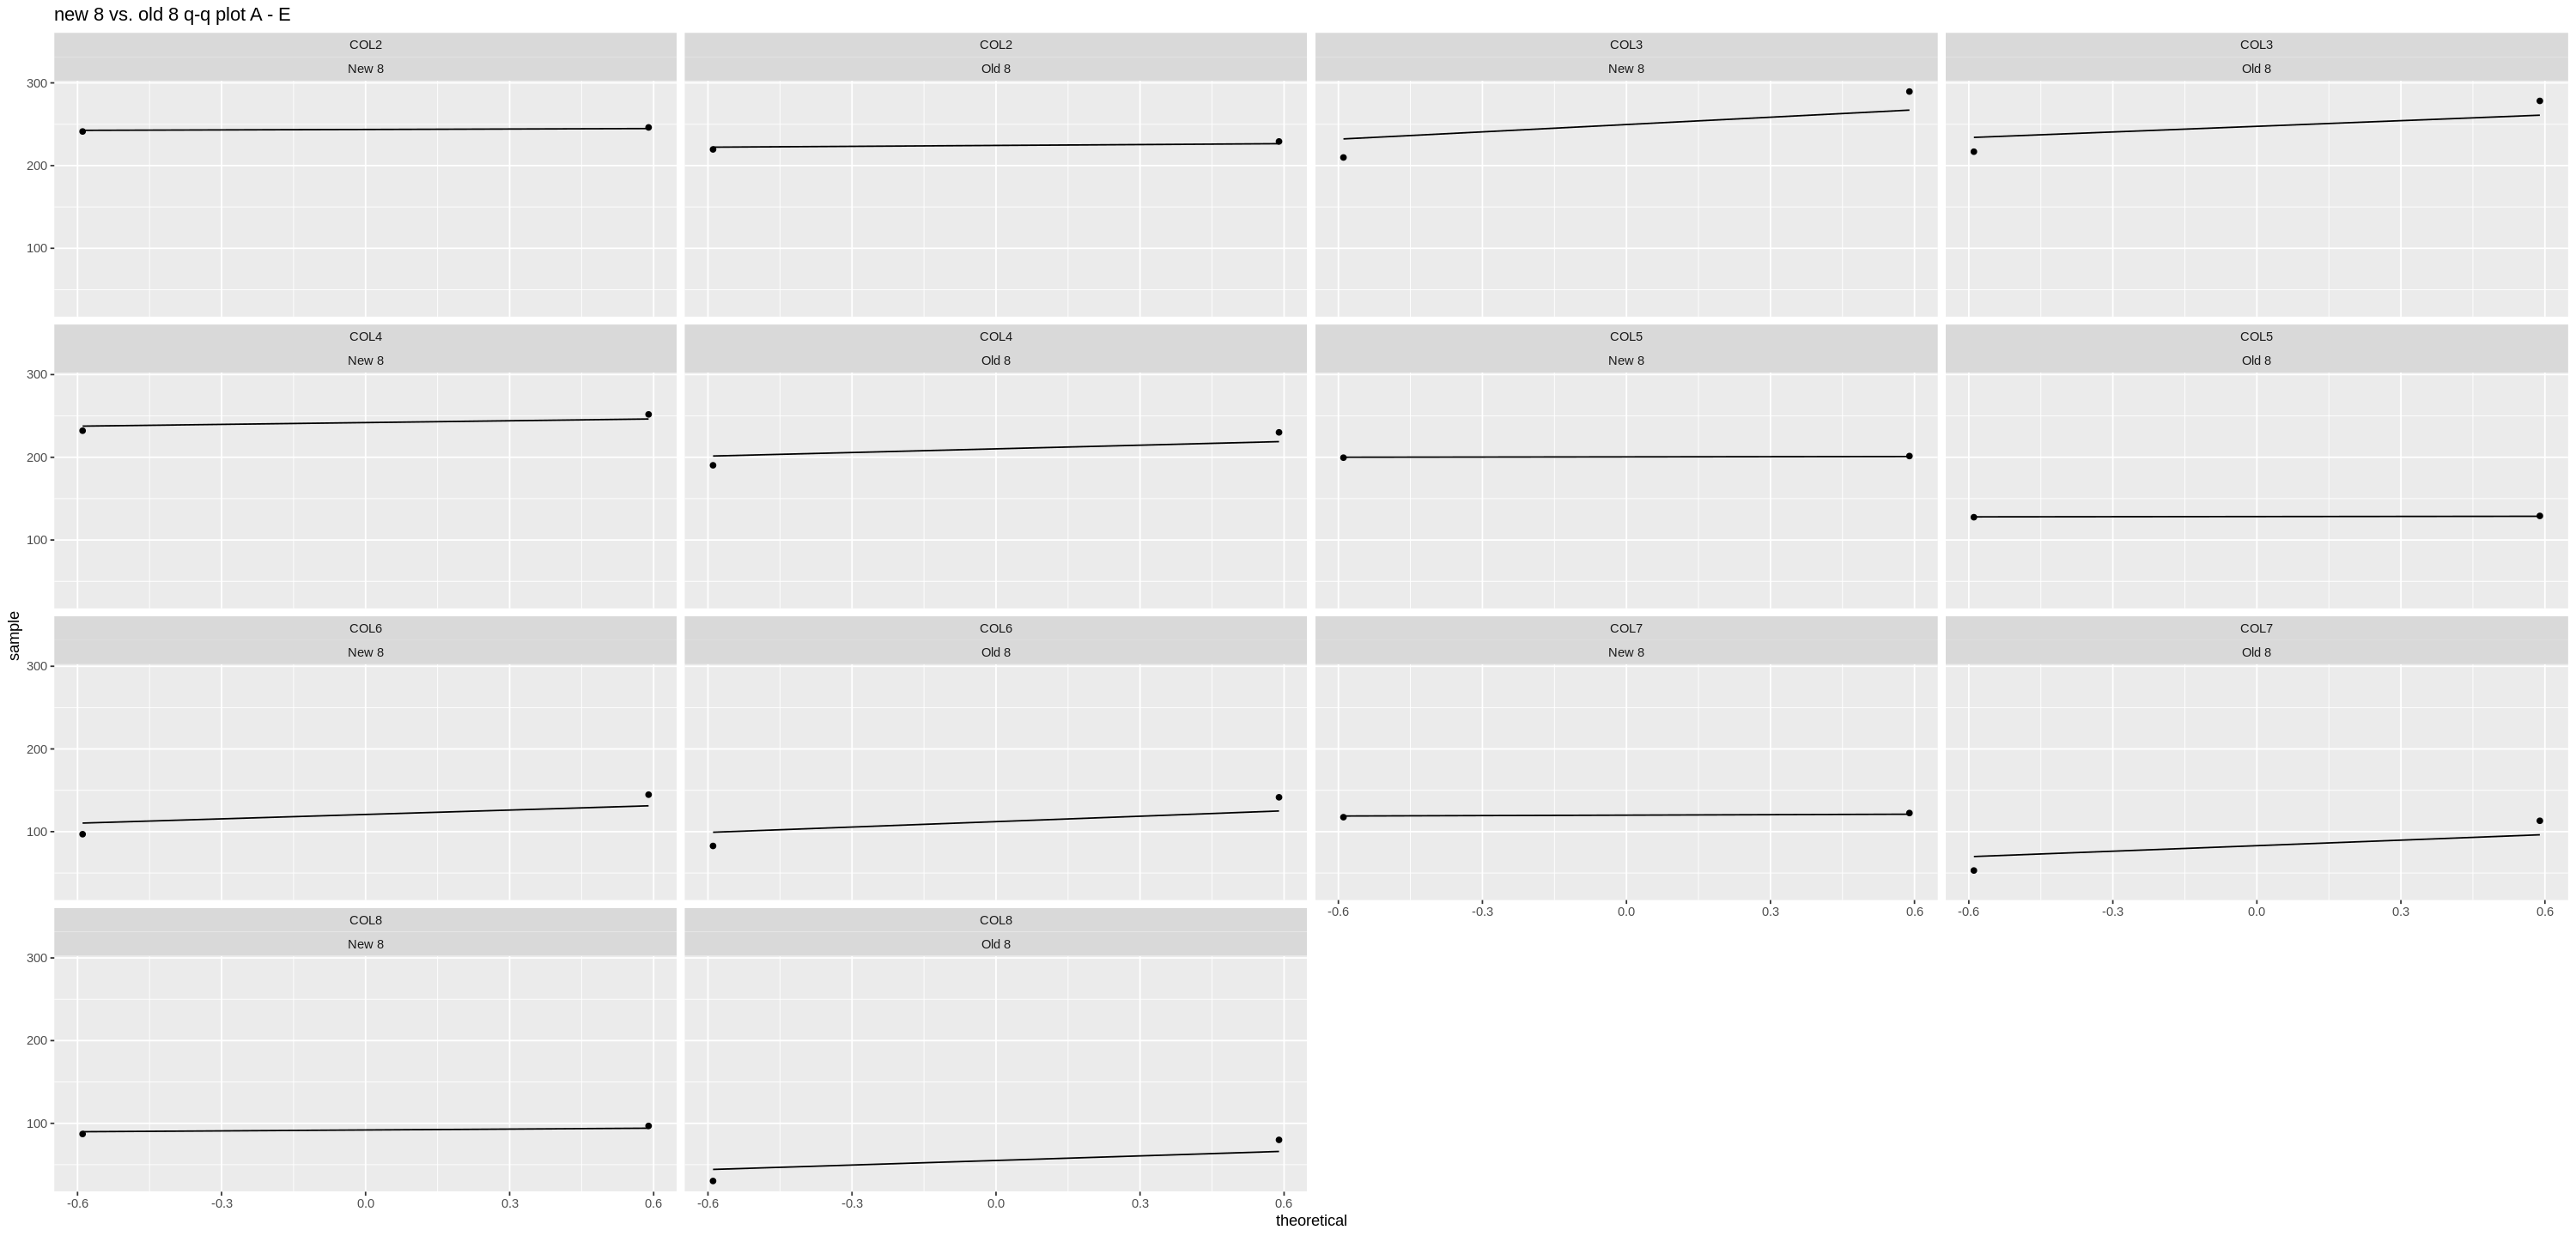

In [95]:
p_qq_si

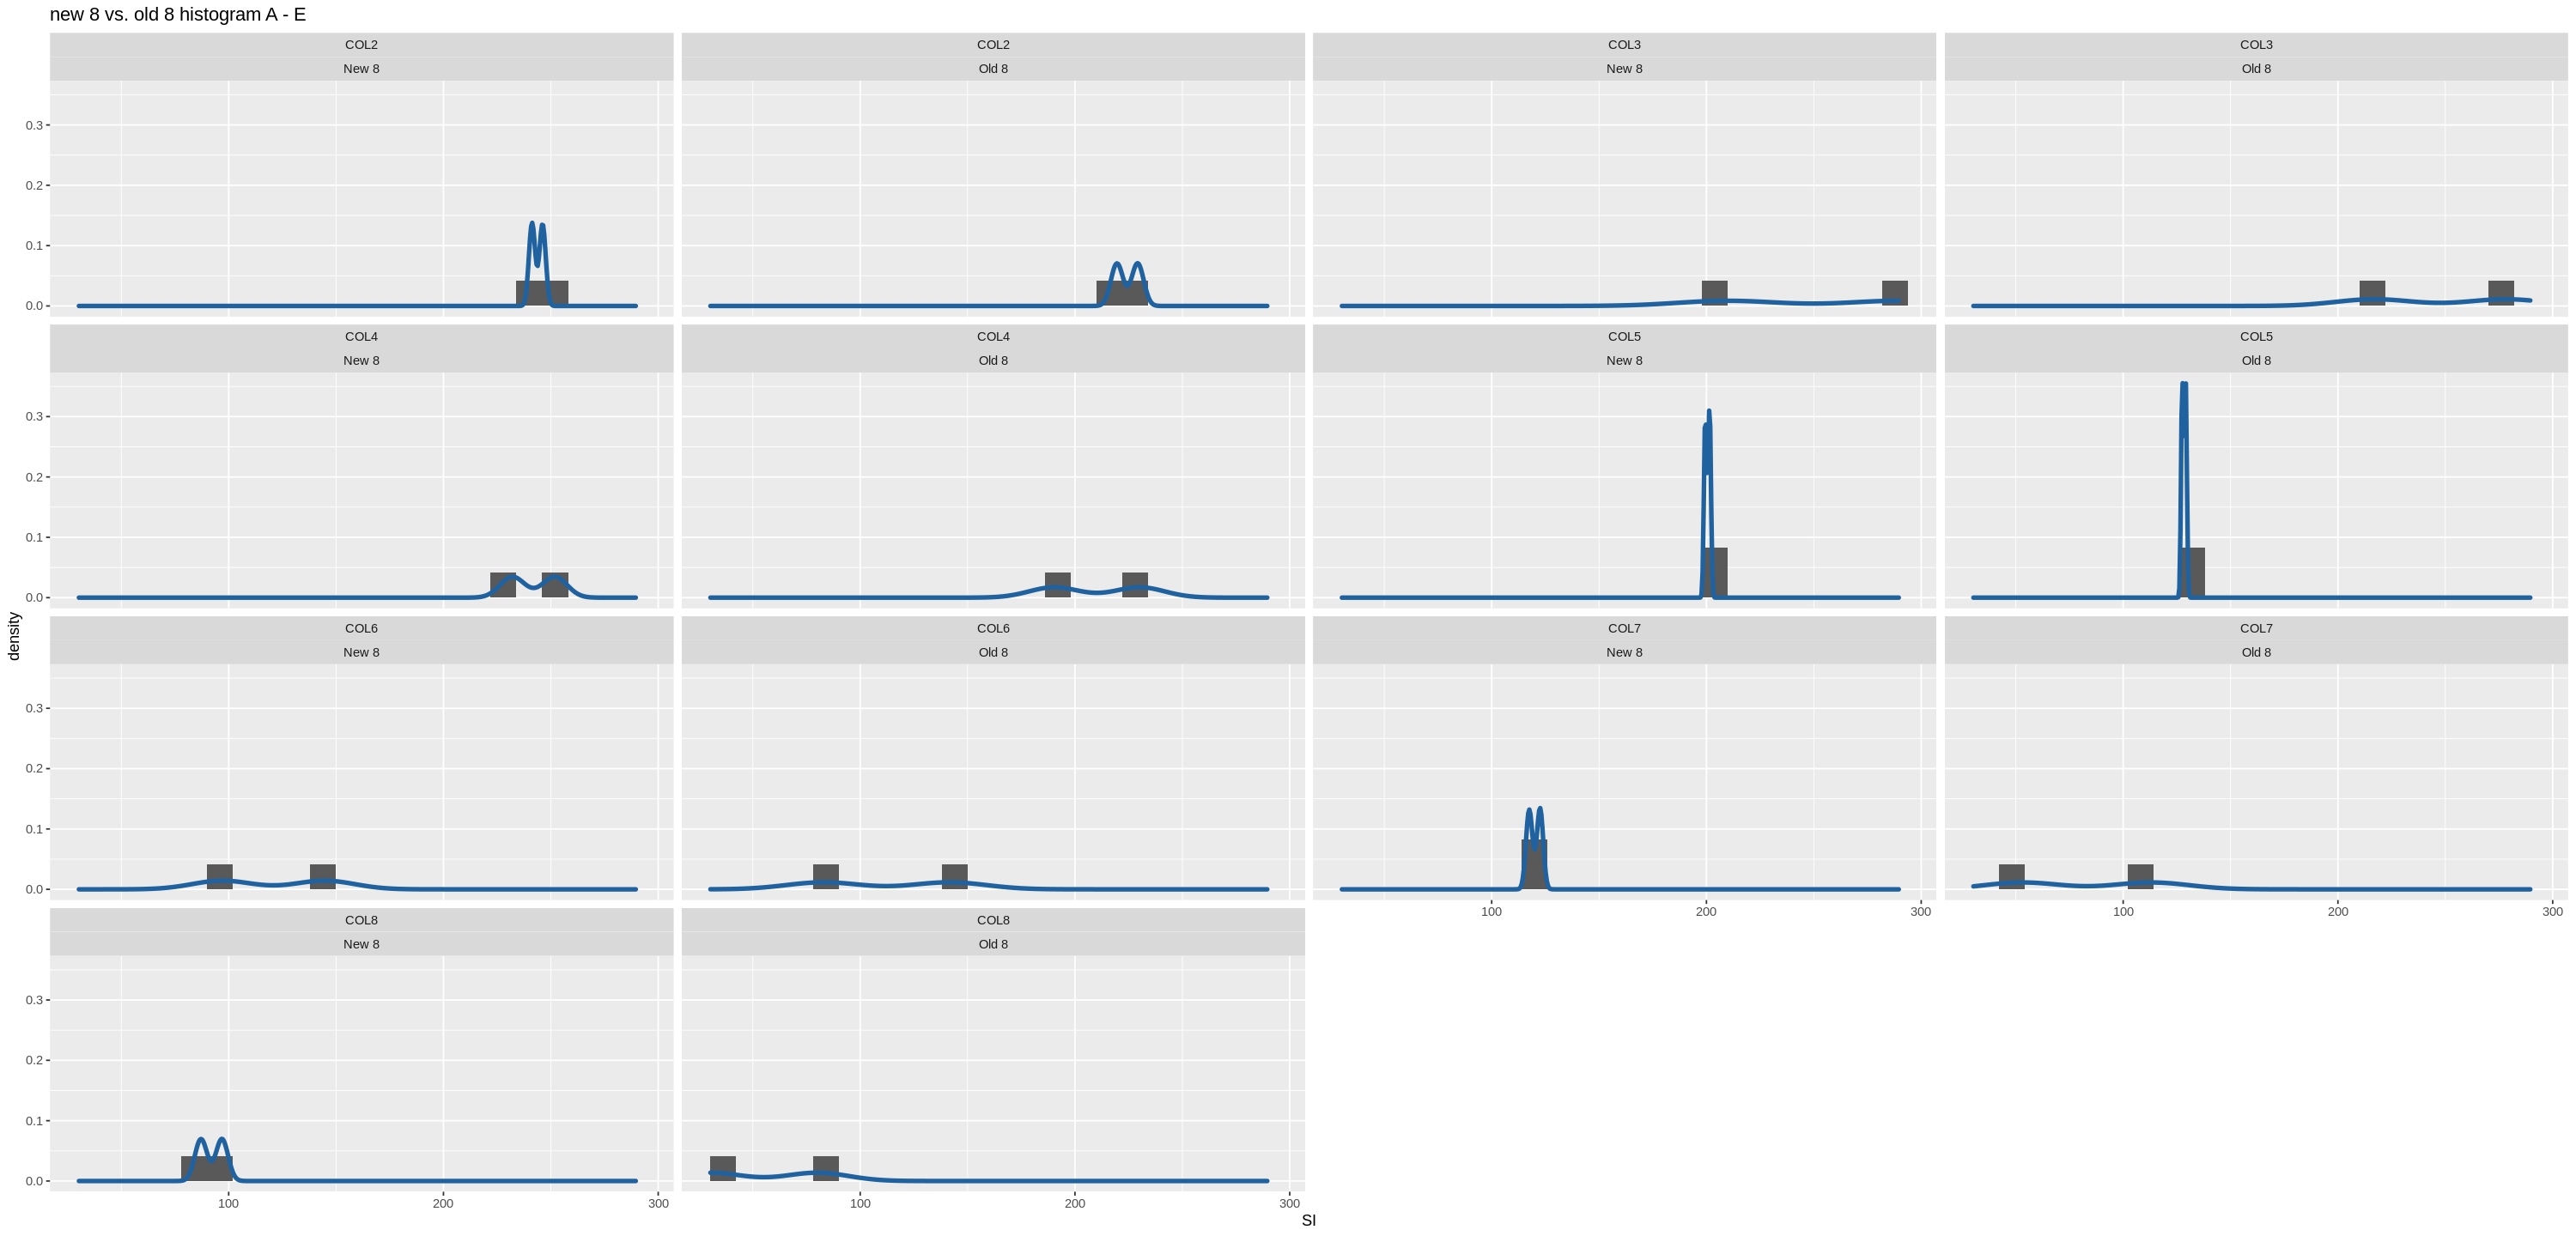

In [96]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

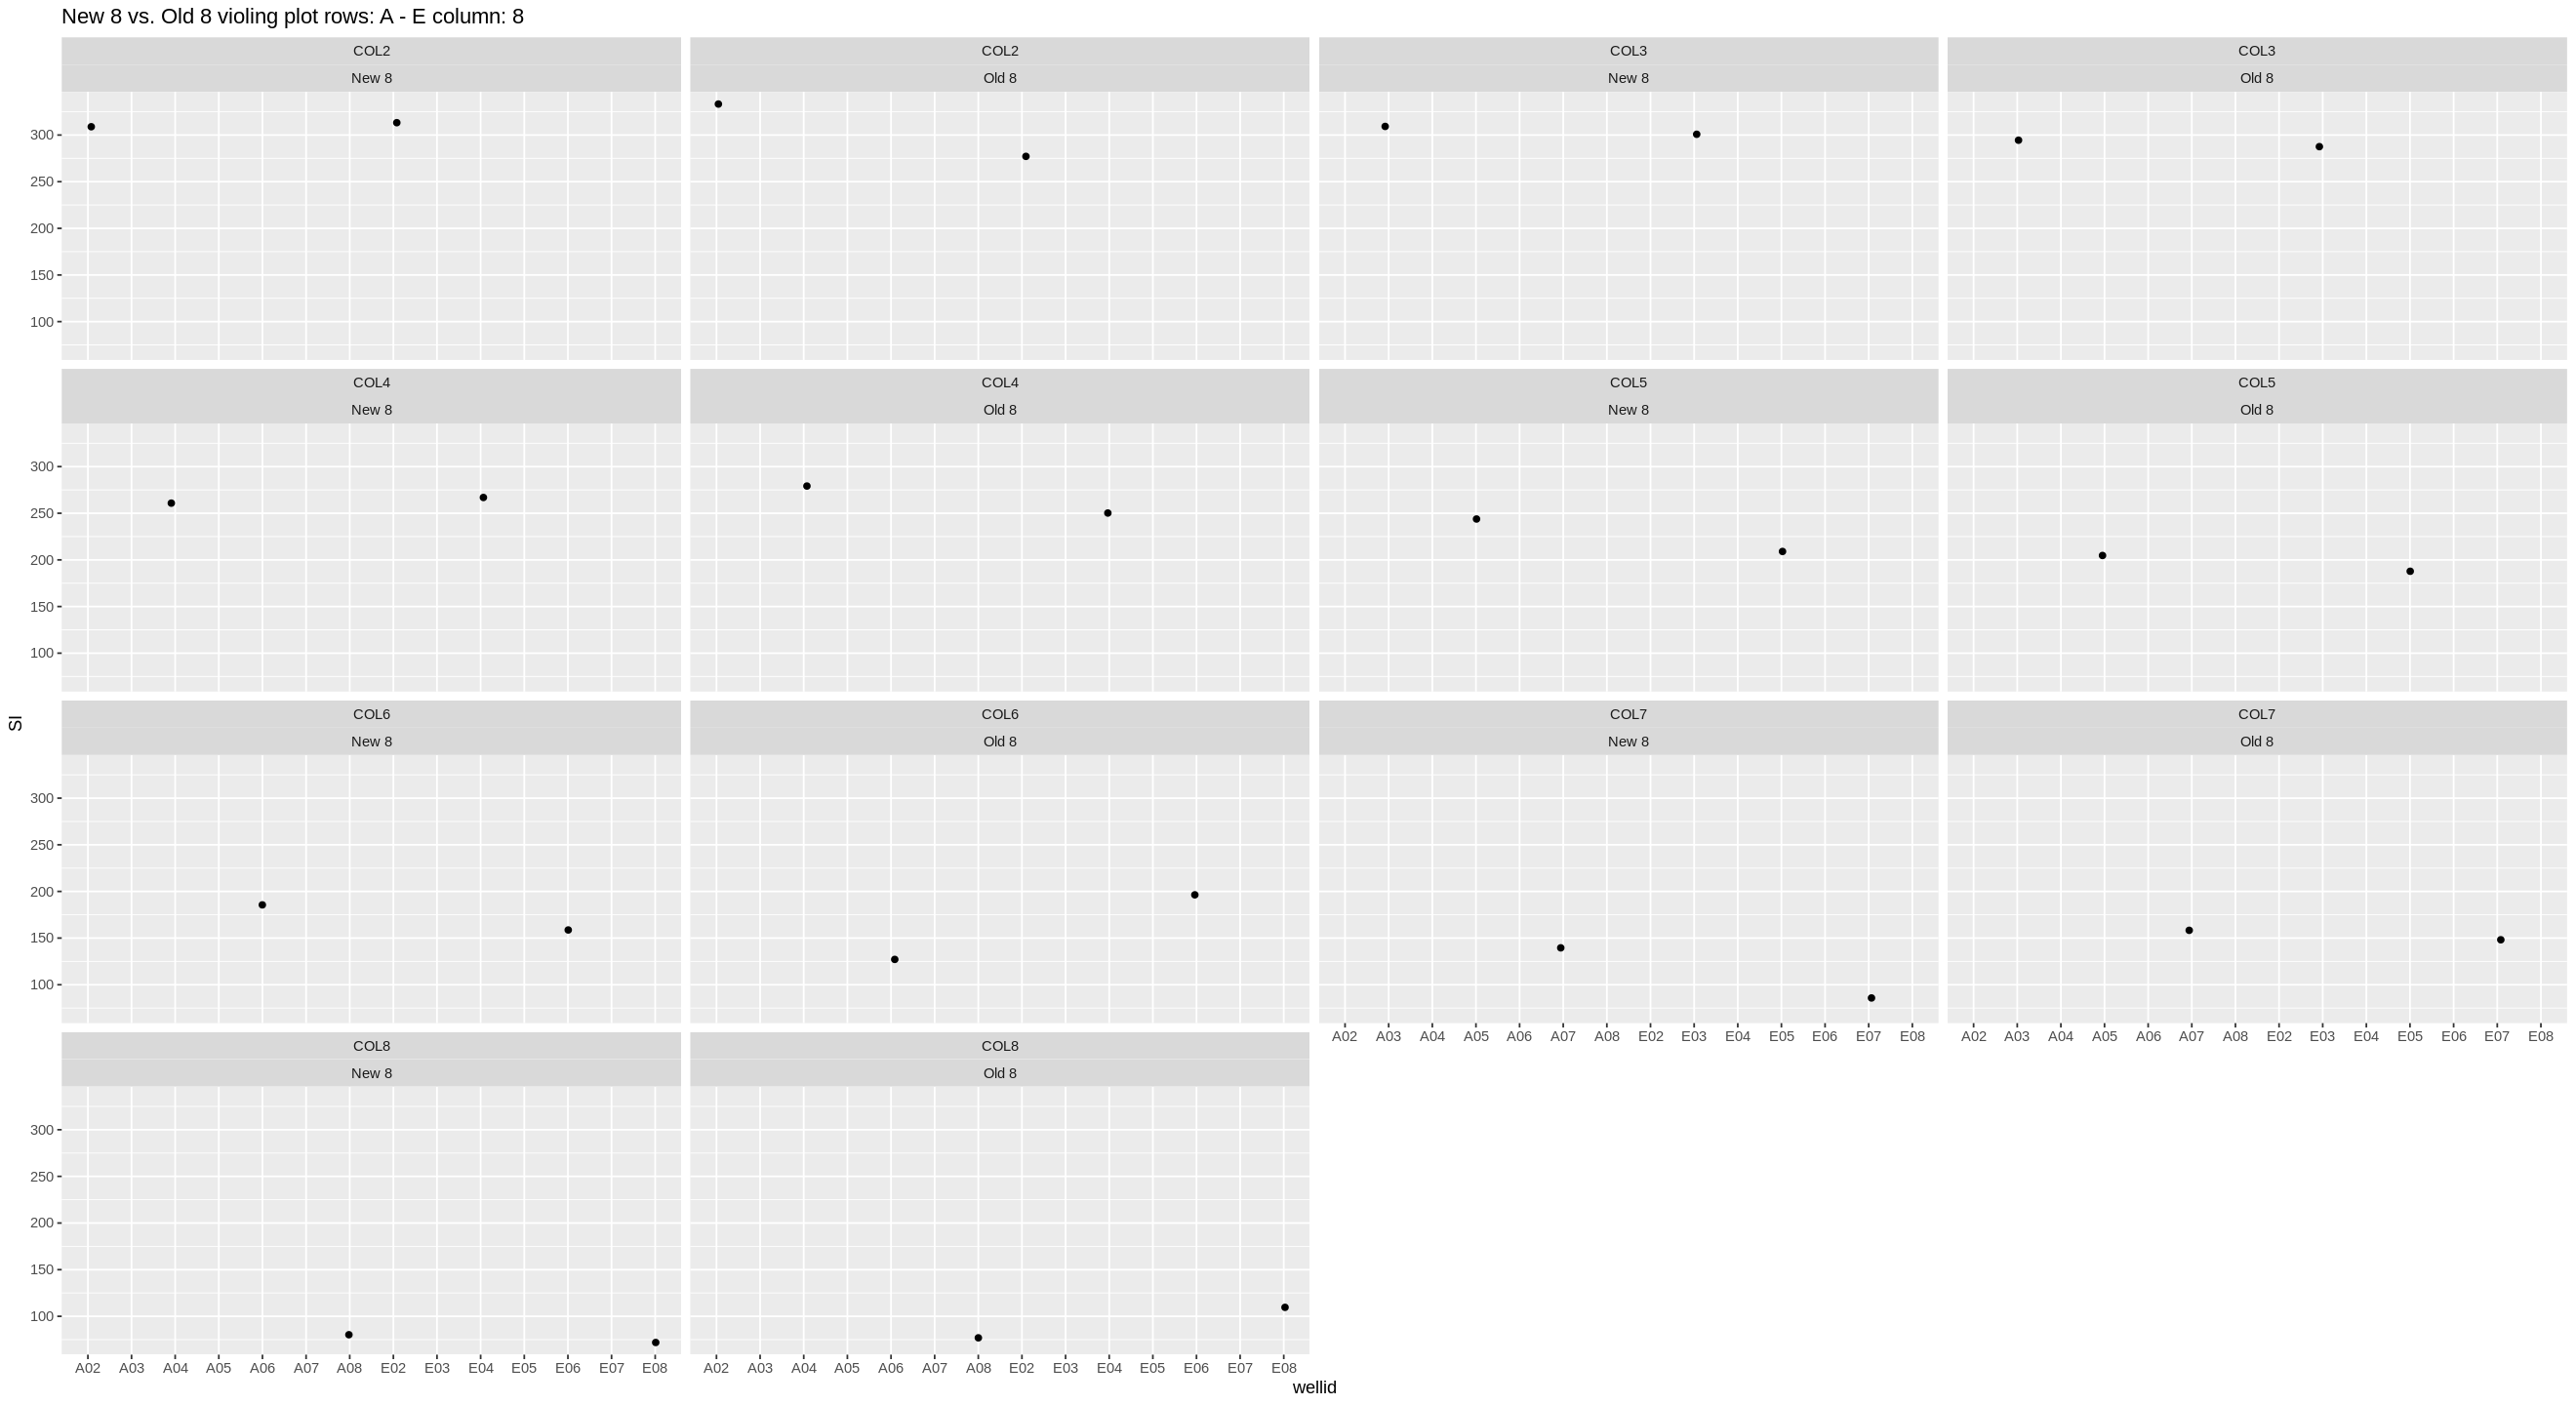

In [114]:
p_violin_si

In [97]:
# B-F
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "B / F : 2"
[1] "B / F : 3"
[1] "B / F : 4"
[1] "B / F : 5"
[1] "B / F : 6"
[1] "B / F : 7"
[1] "B / F : 8"


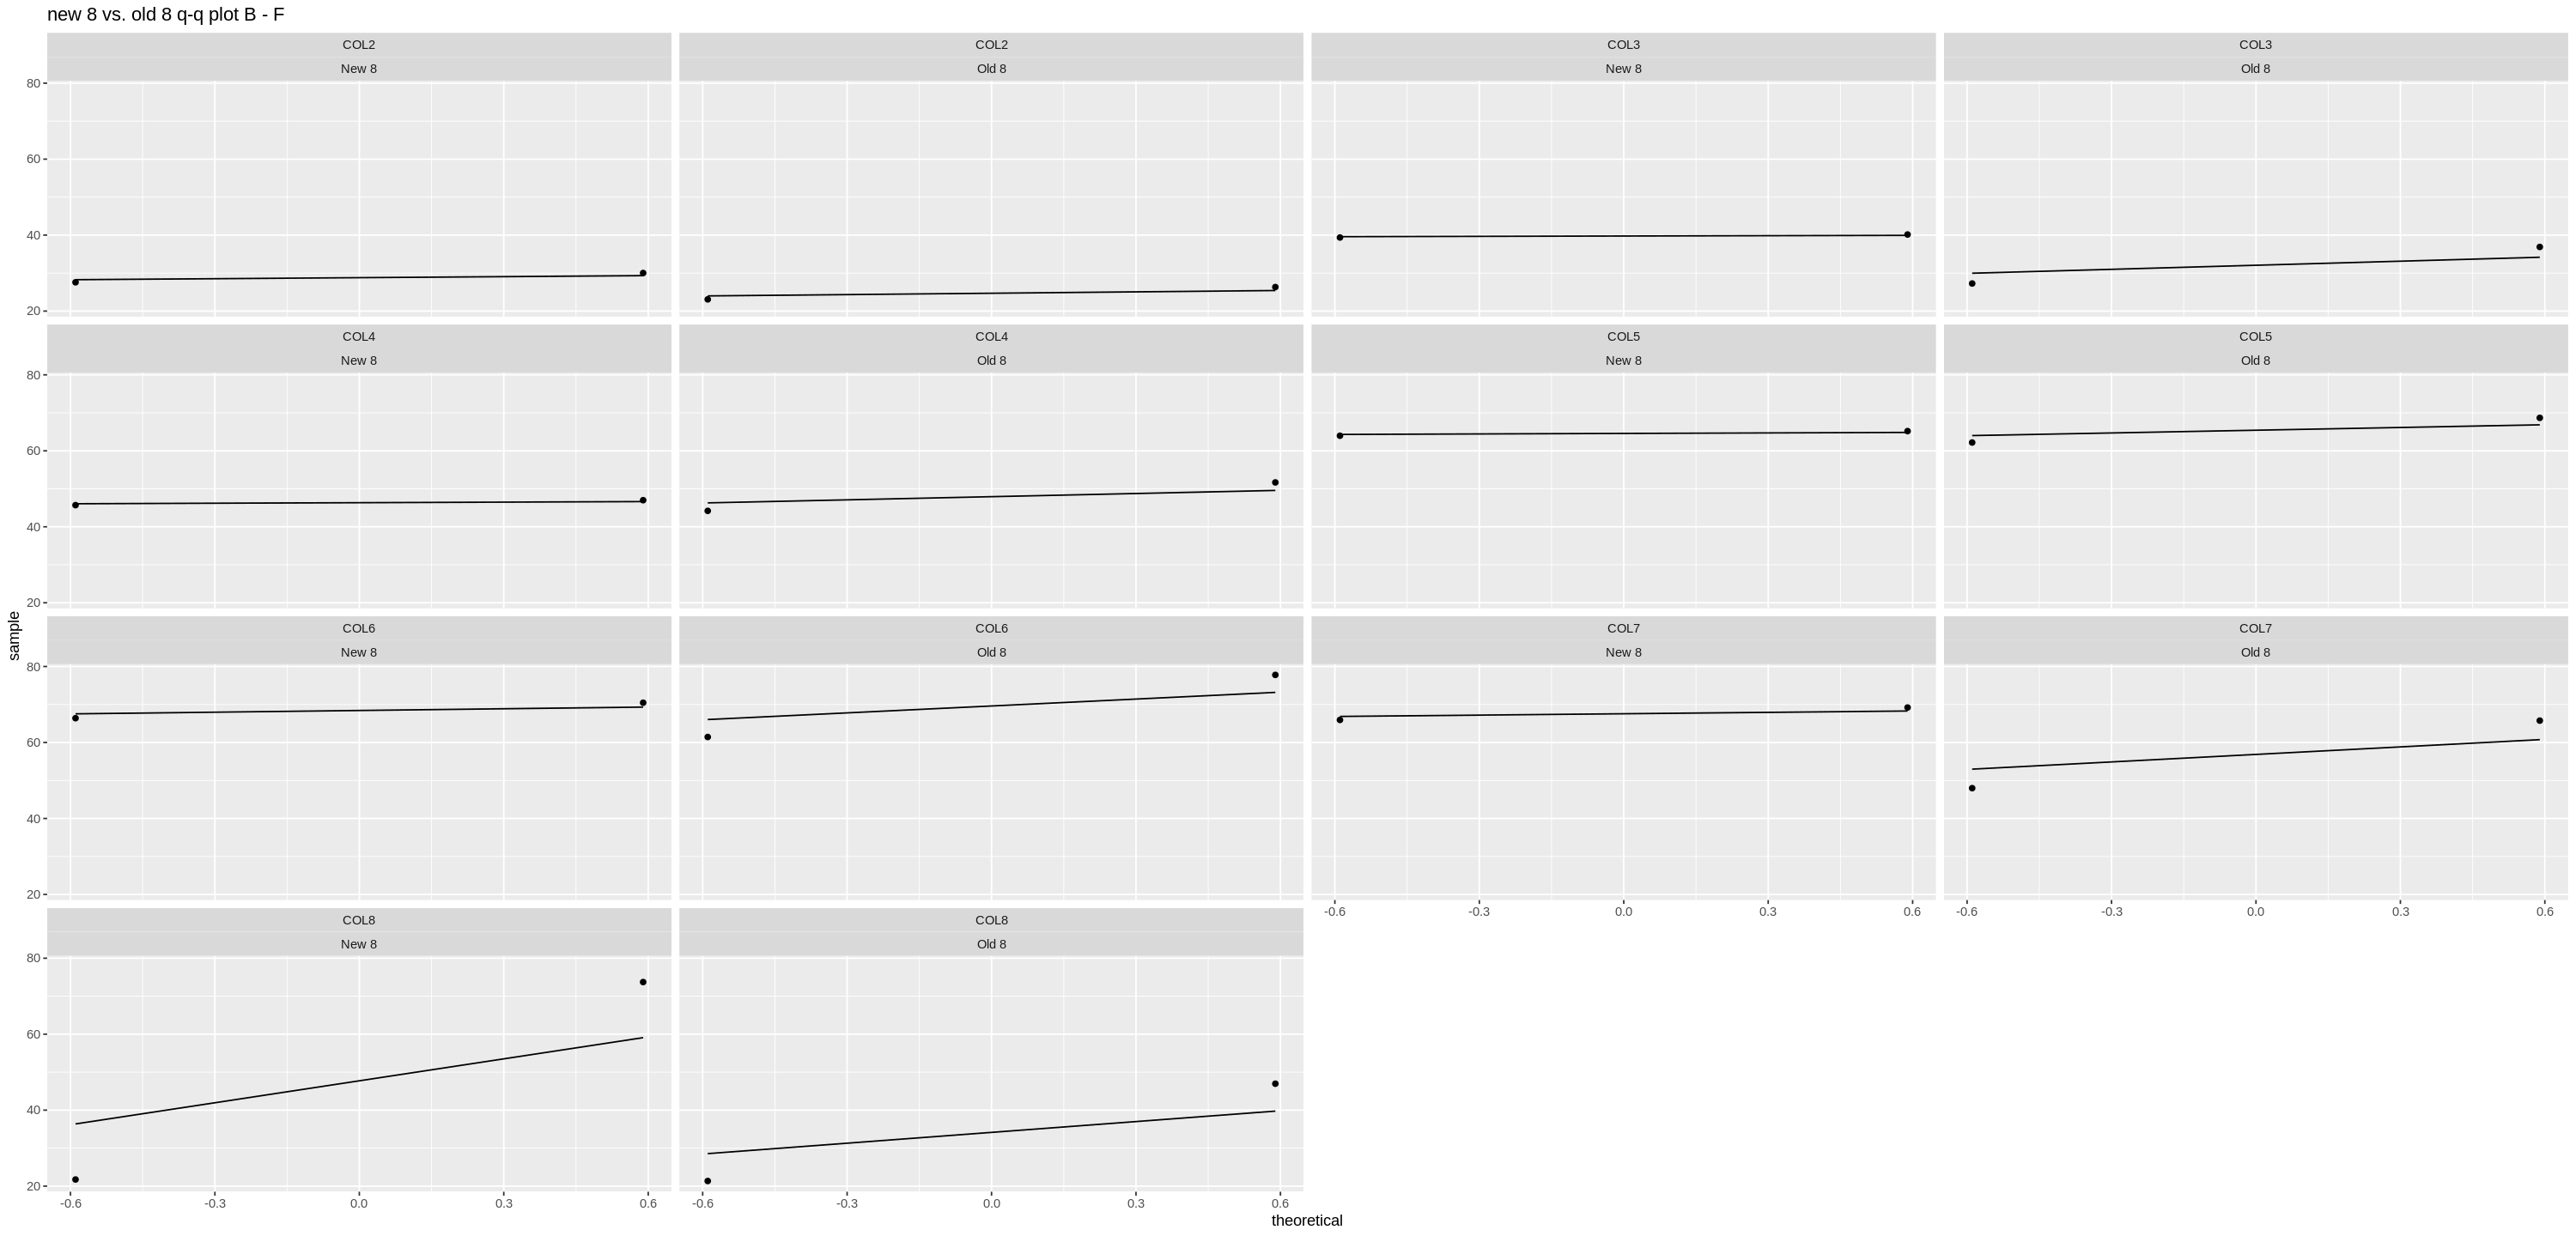

In [98]:
p_qq_si

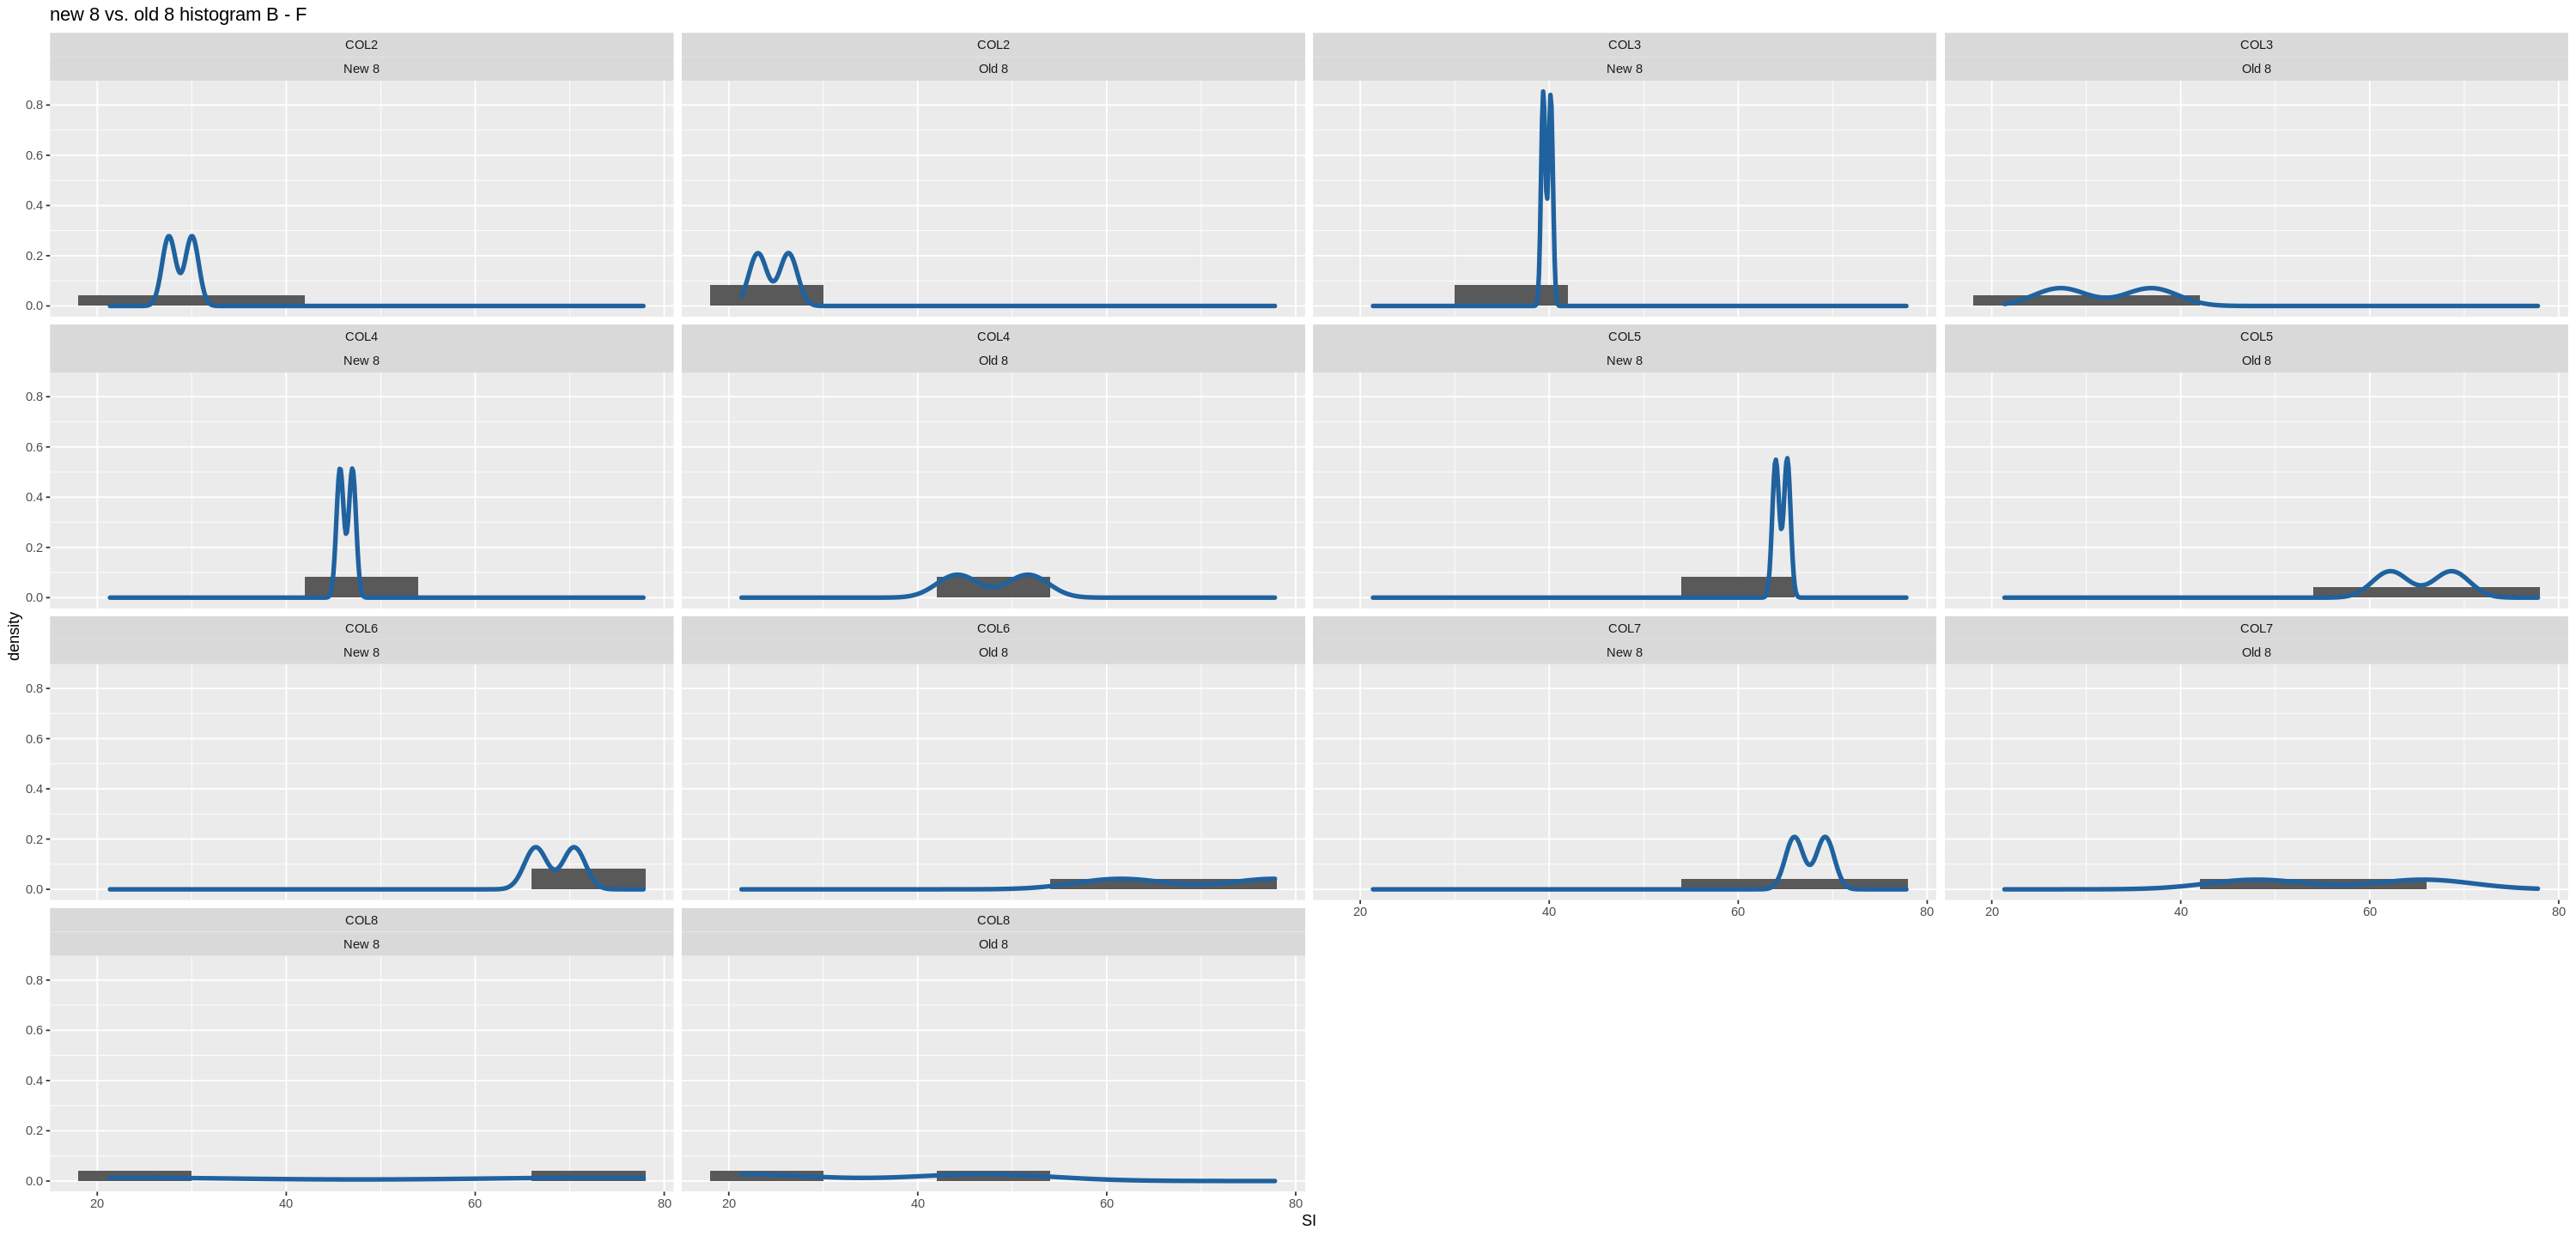

In [99]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

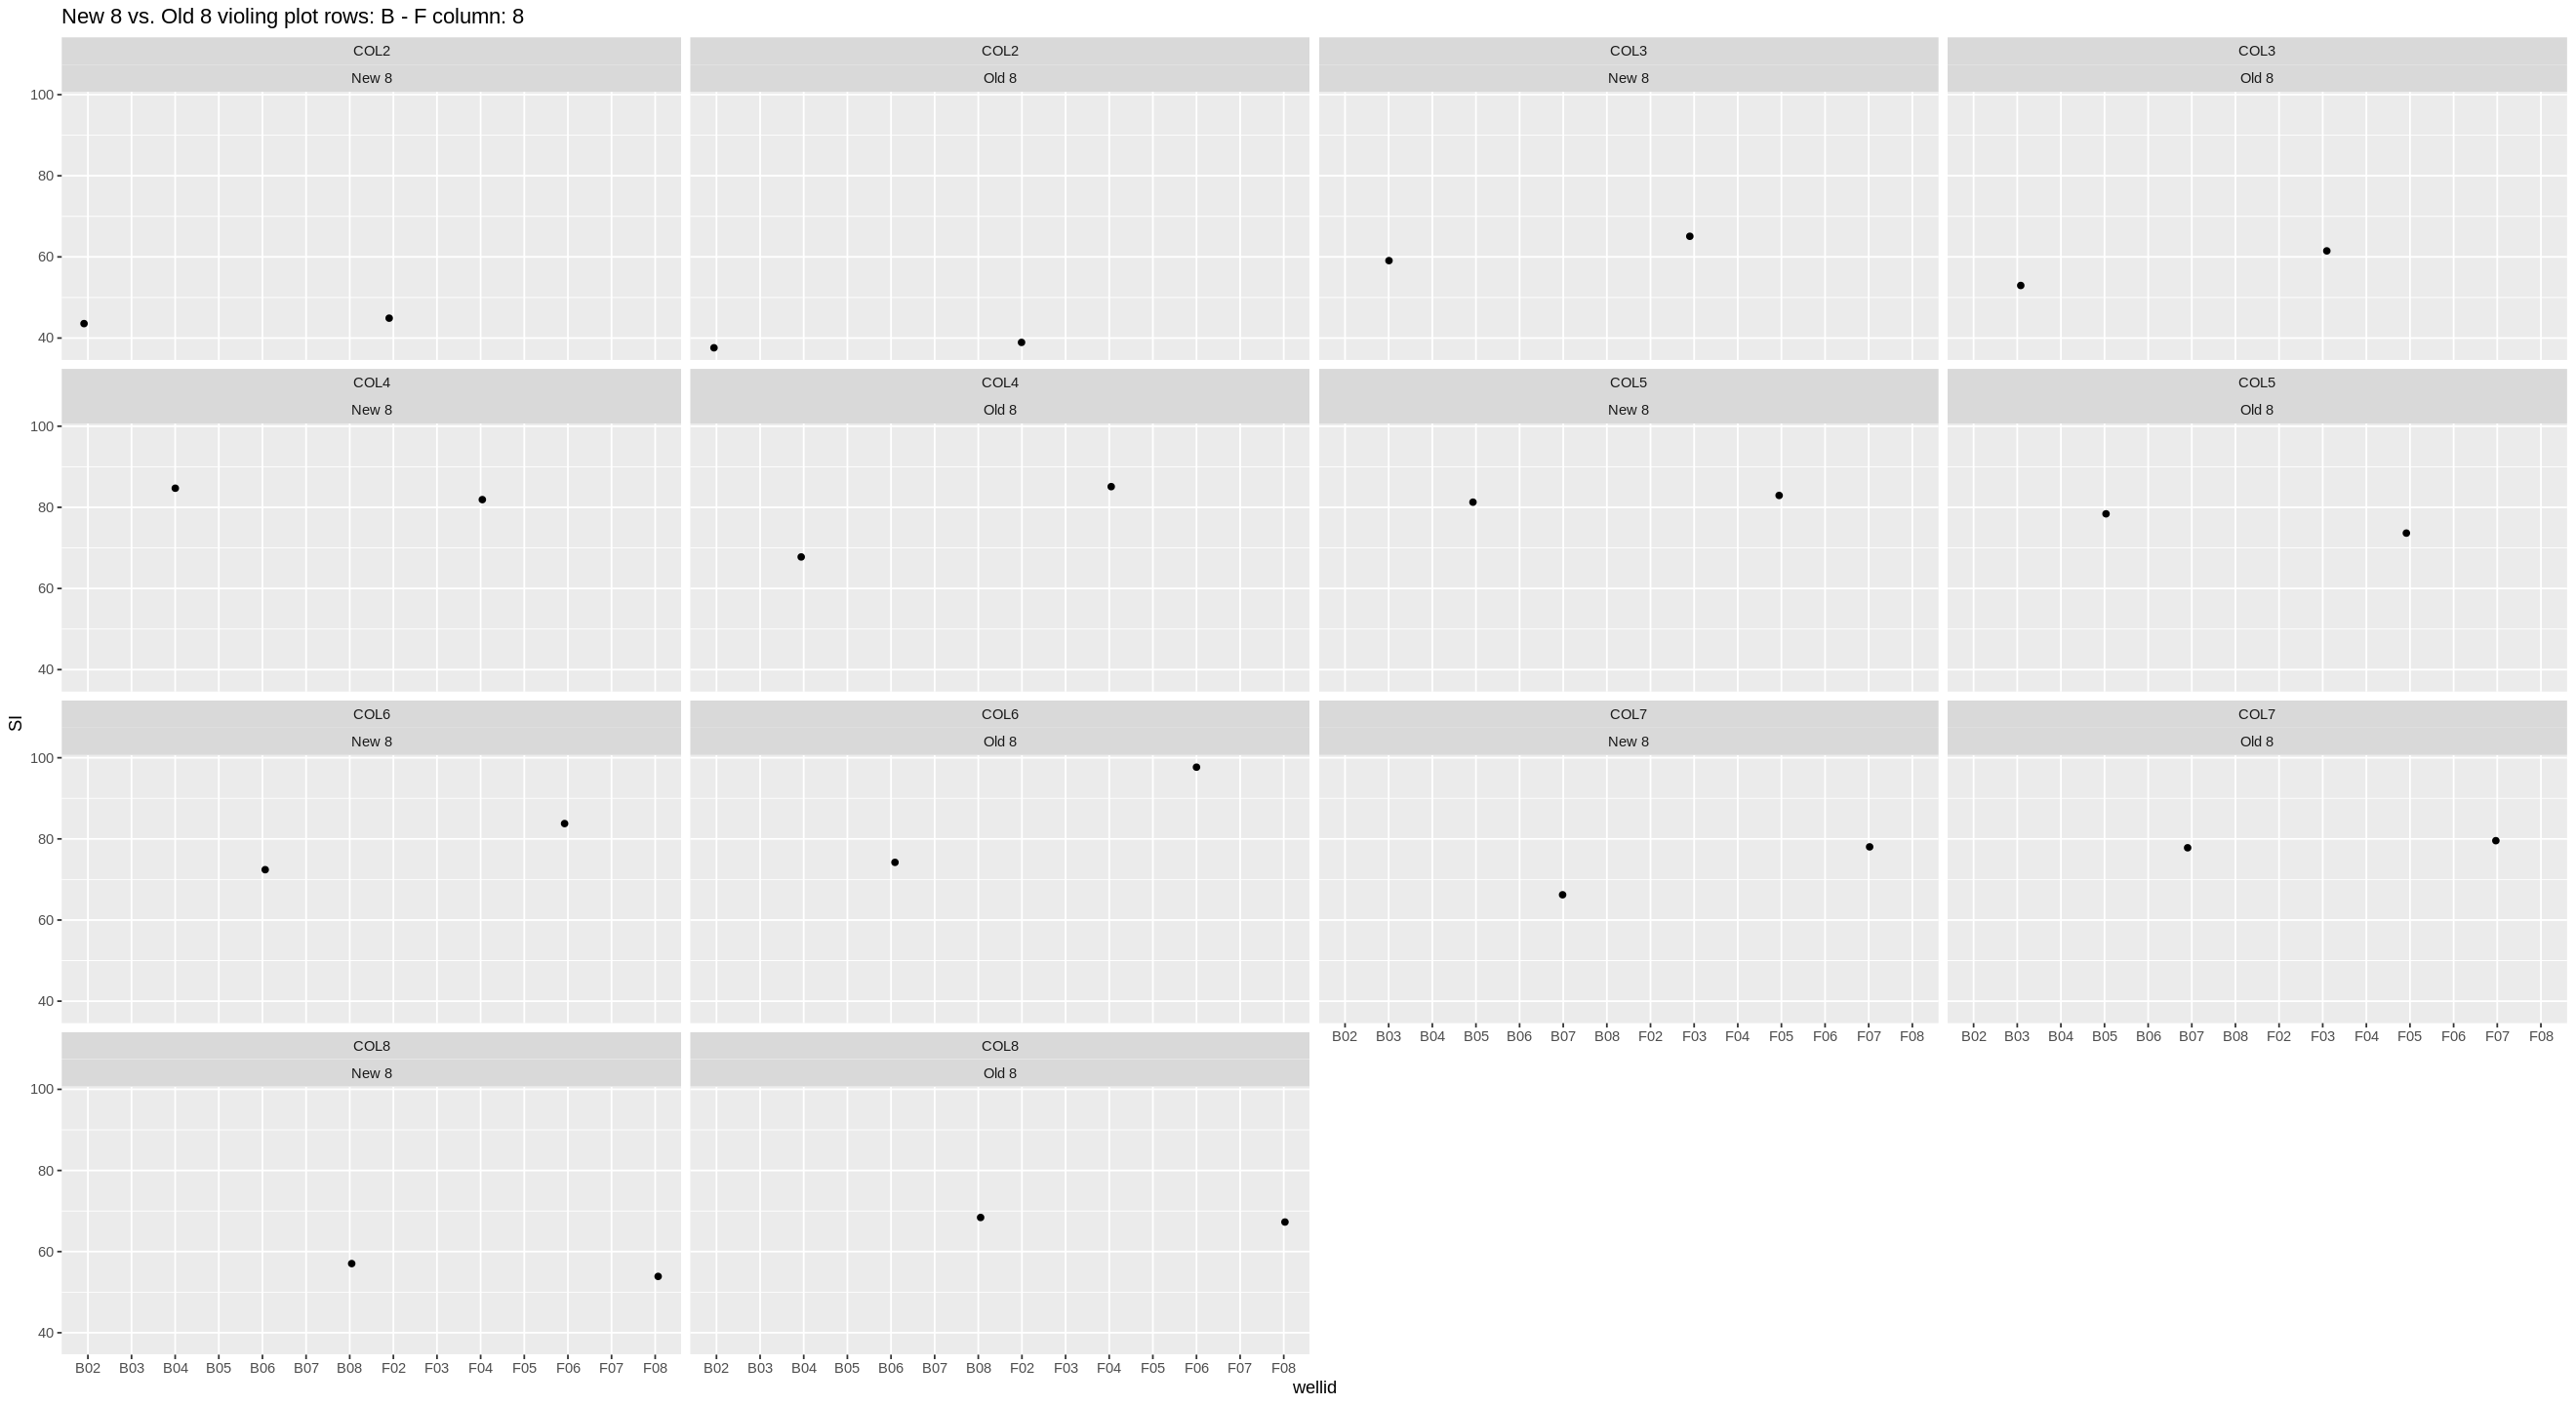

In [75]:
p_violin_si

In [100]:
# C-G
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "C / G : 2"
[1] "C / G : 3"
[1] "C / G : 4"
[1] "C / G : 5"
[1] "C / G : 6"
[1] "C / G : 7"
[1] "C / G : 8"


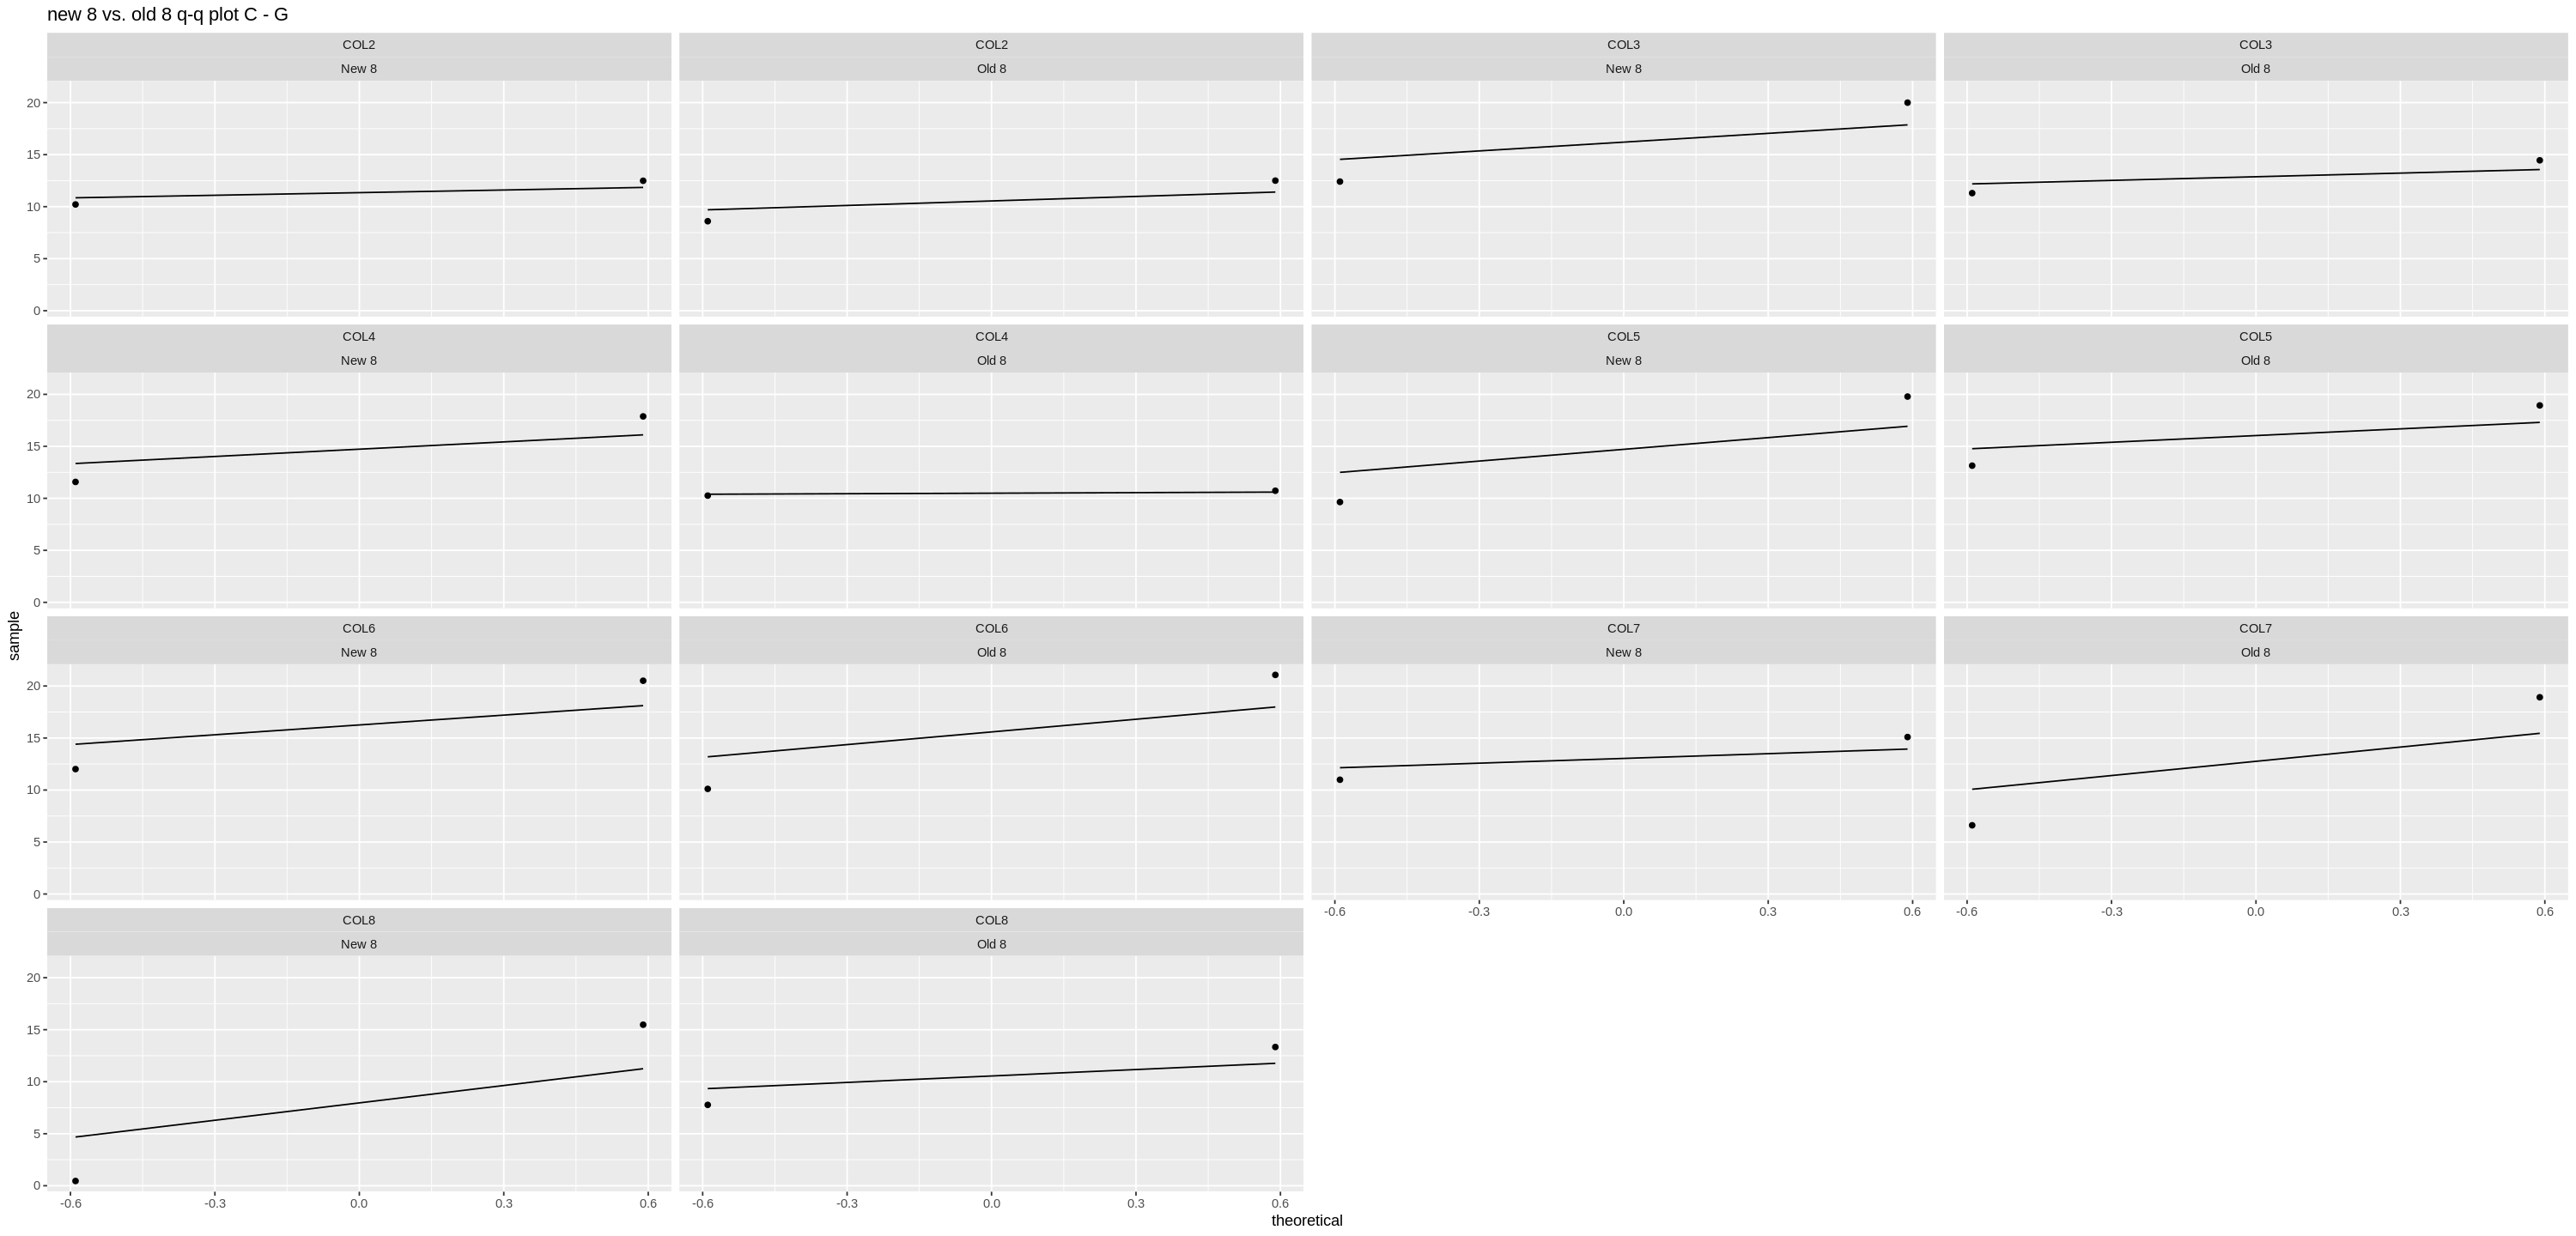

In [101]:
p_qq_si

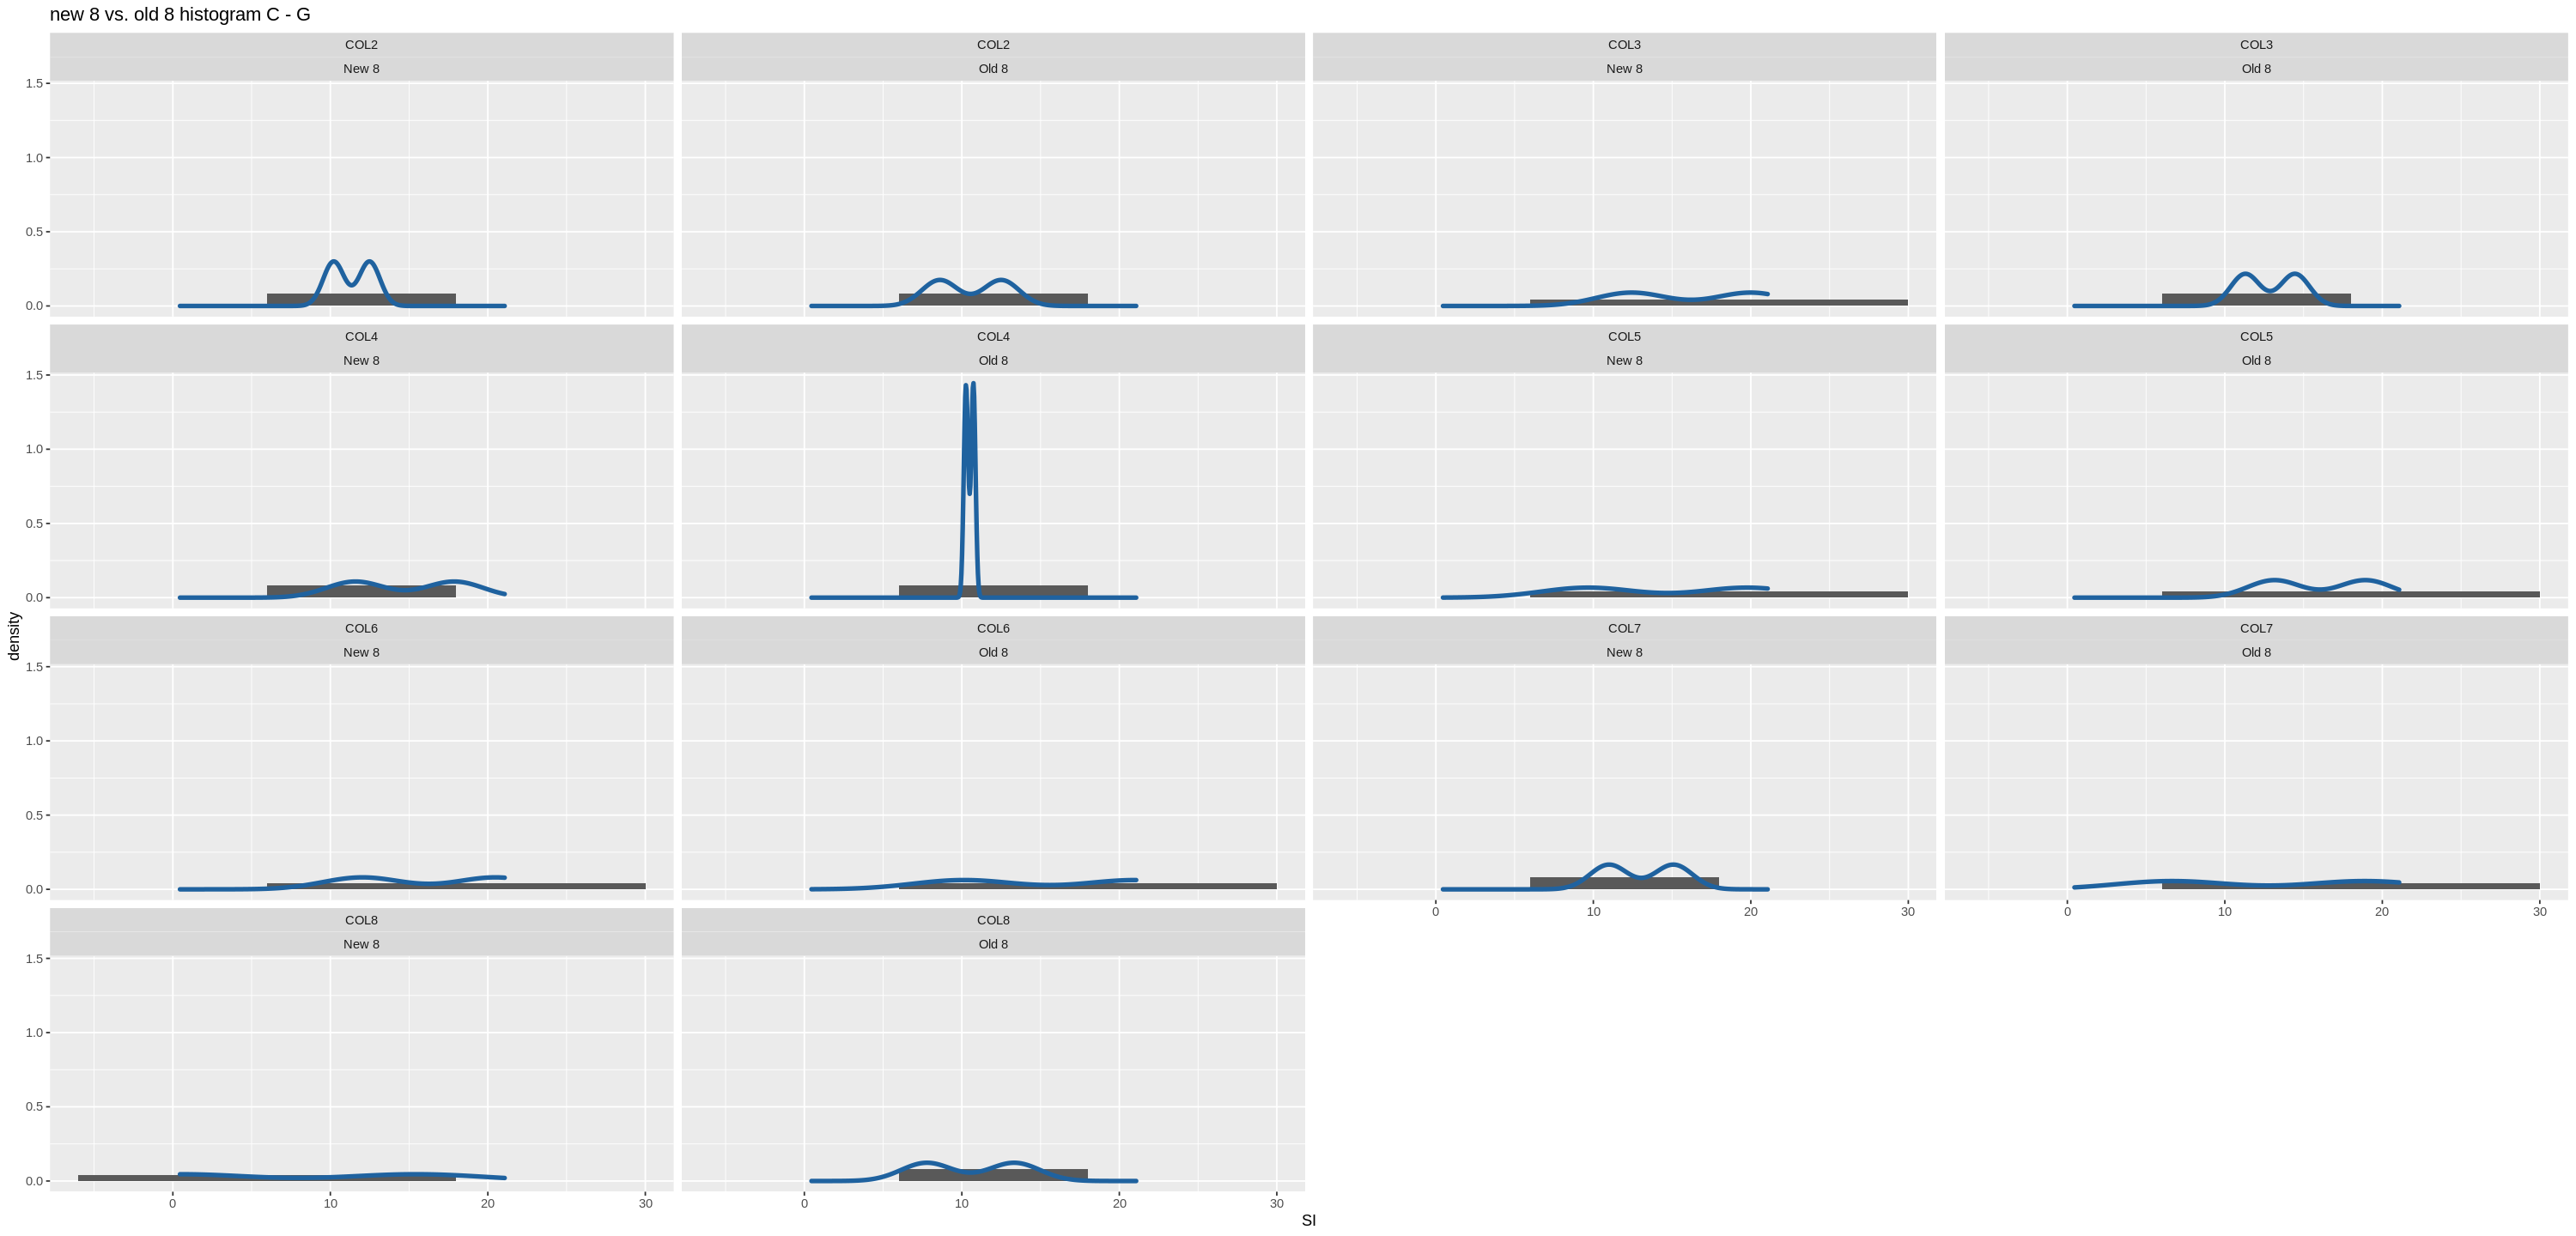

In [102]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

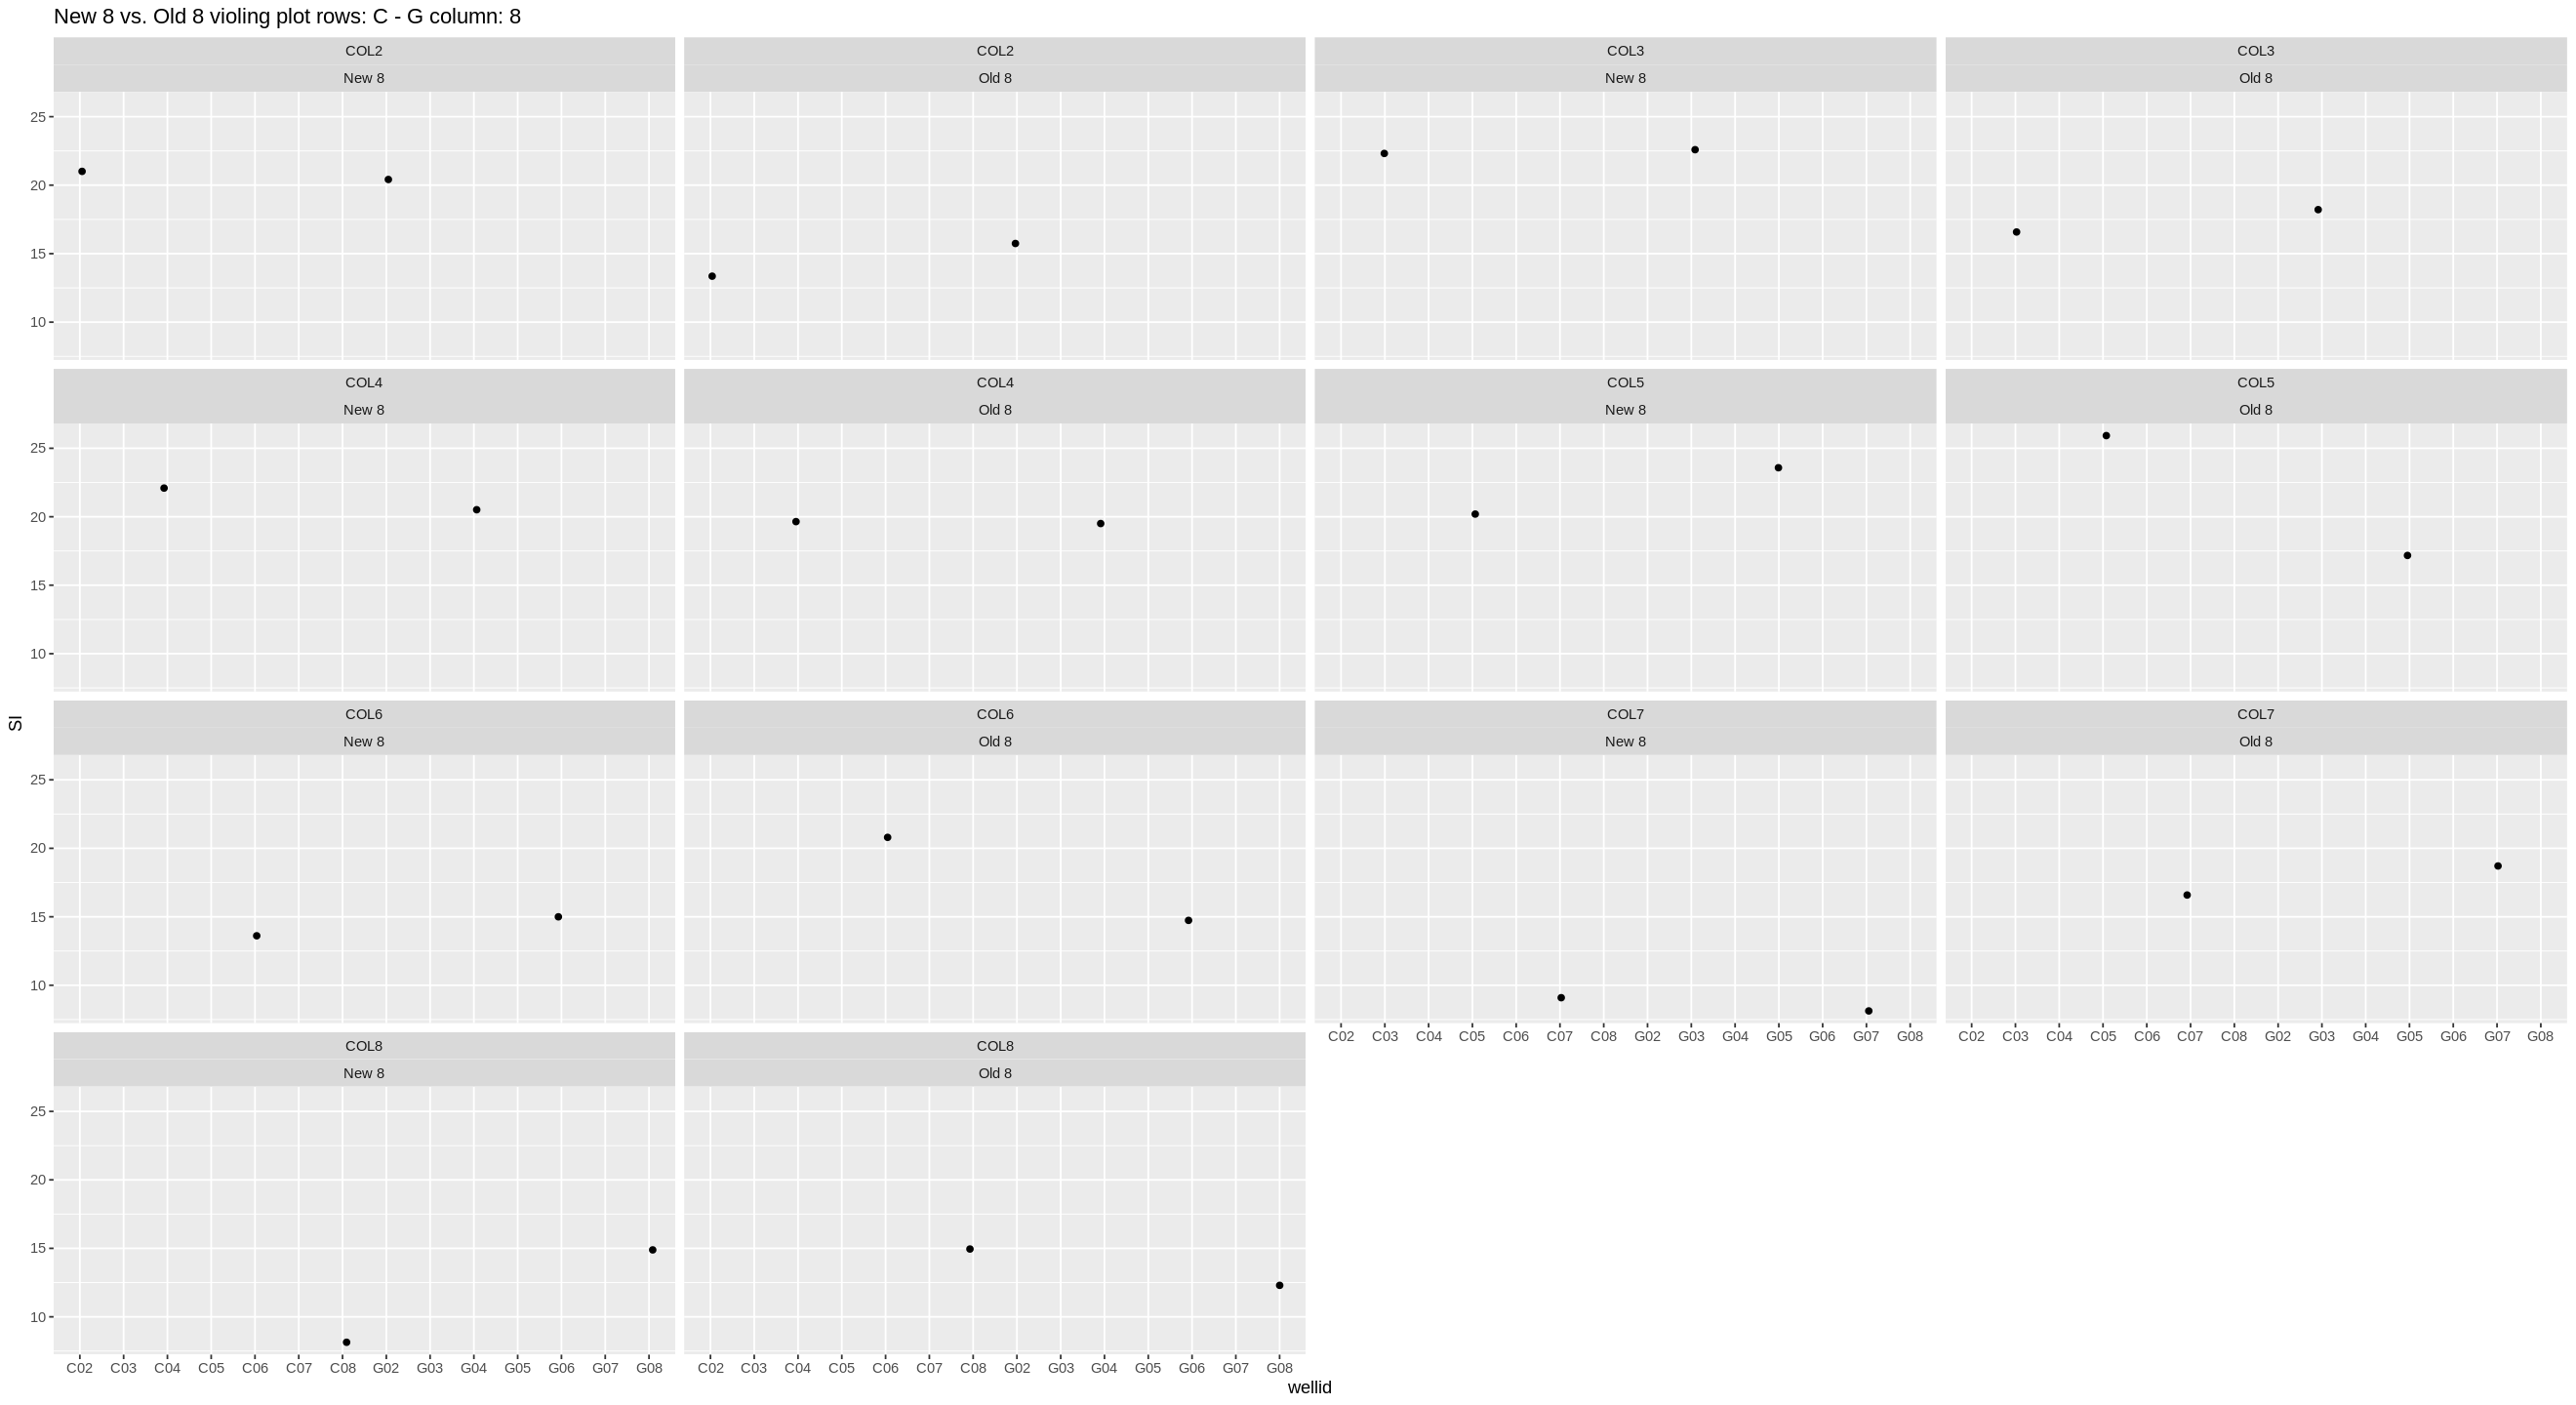

In [79]:
p_violin_si

In [103]:
# D-H
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "D / H : 2"
[1] "D / H : 3"
[1] "D / H : 4"
[1] "D / H : 5"
[1] "D / H : 6"
[1] "D / H : 7"
[1] "D / H : 8"


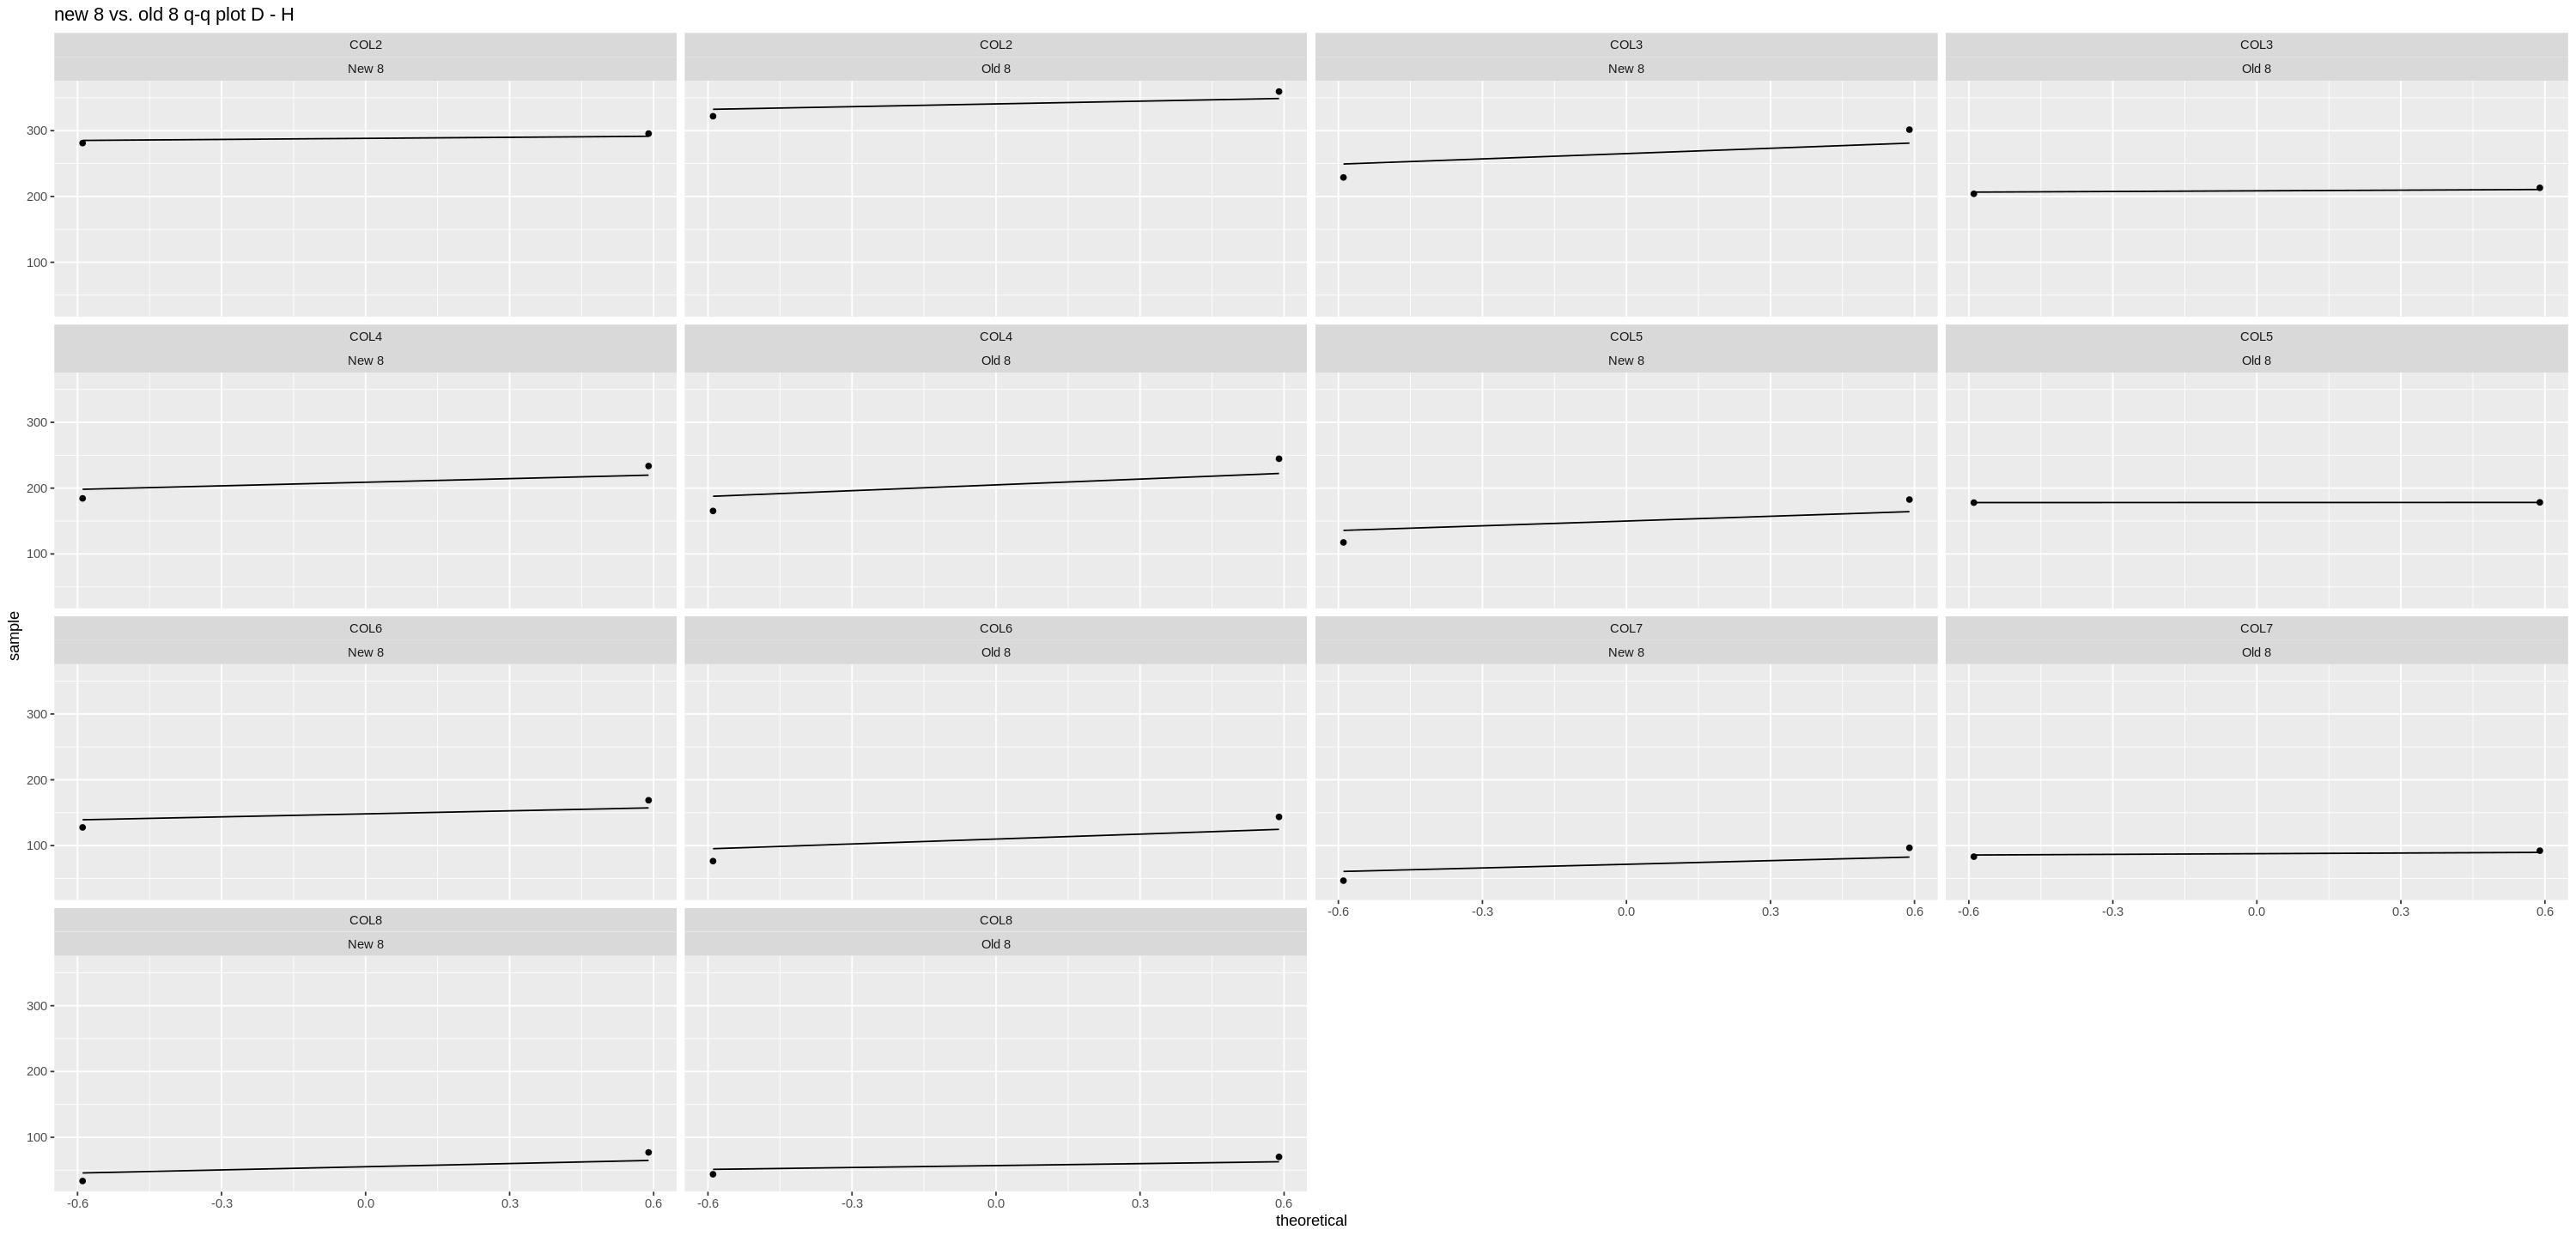

In [104]:
p_qq_si

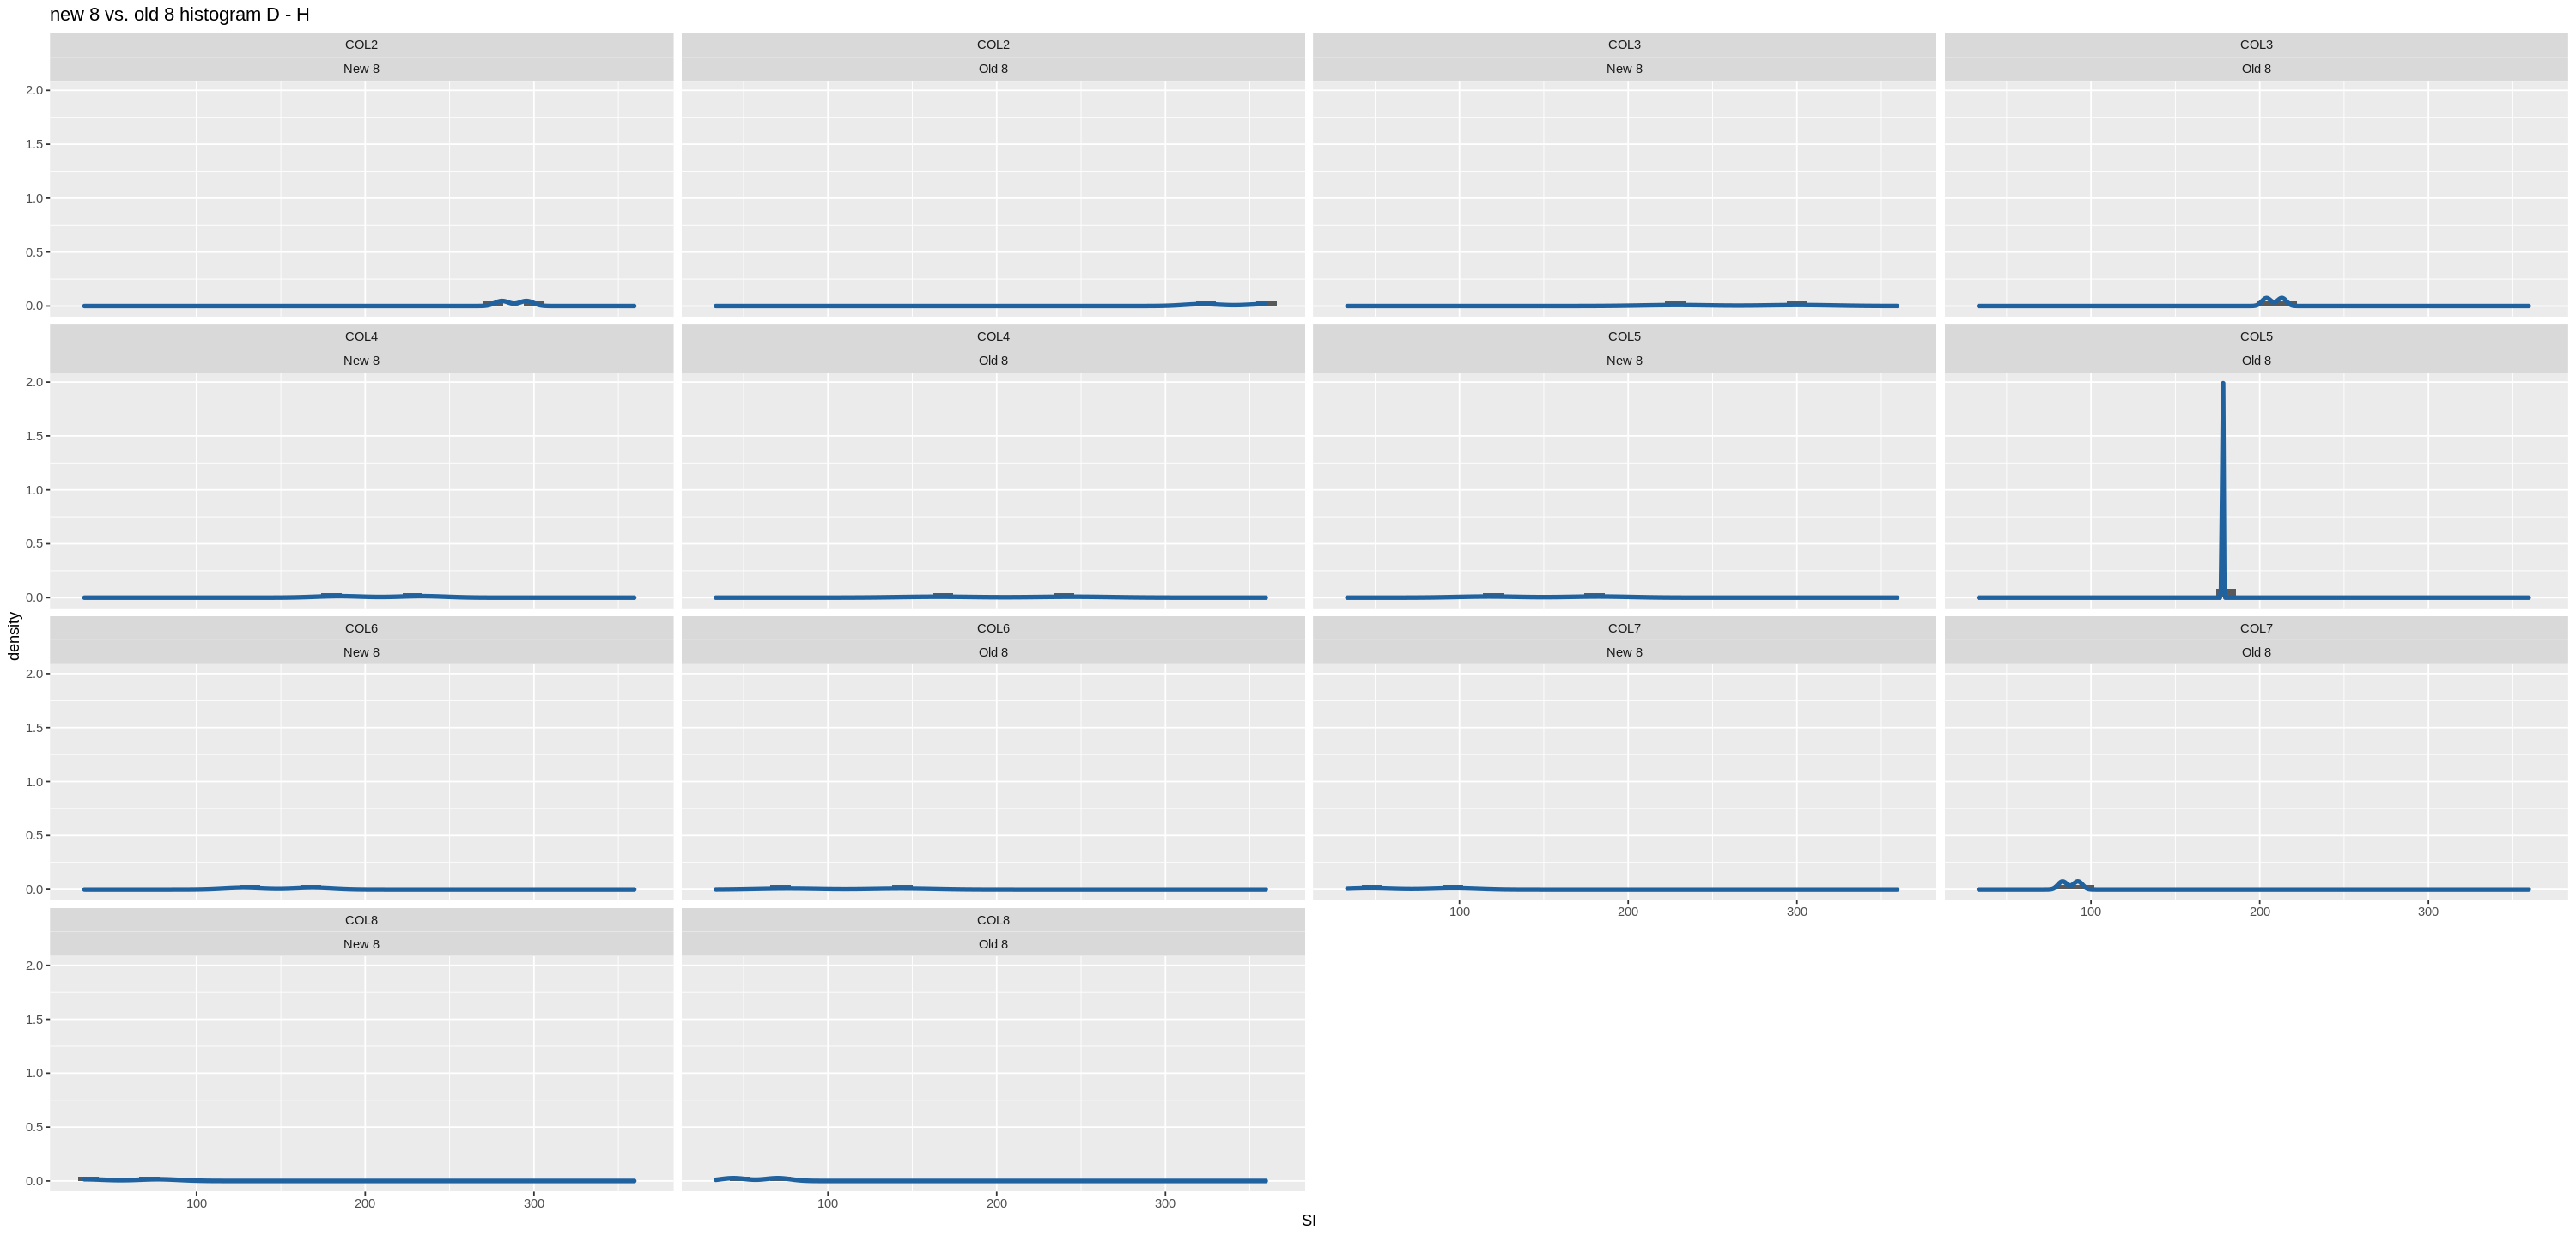

In [105]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

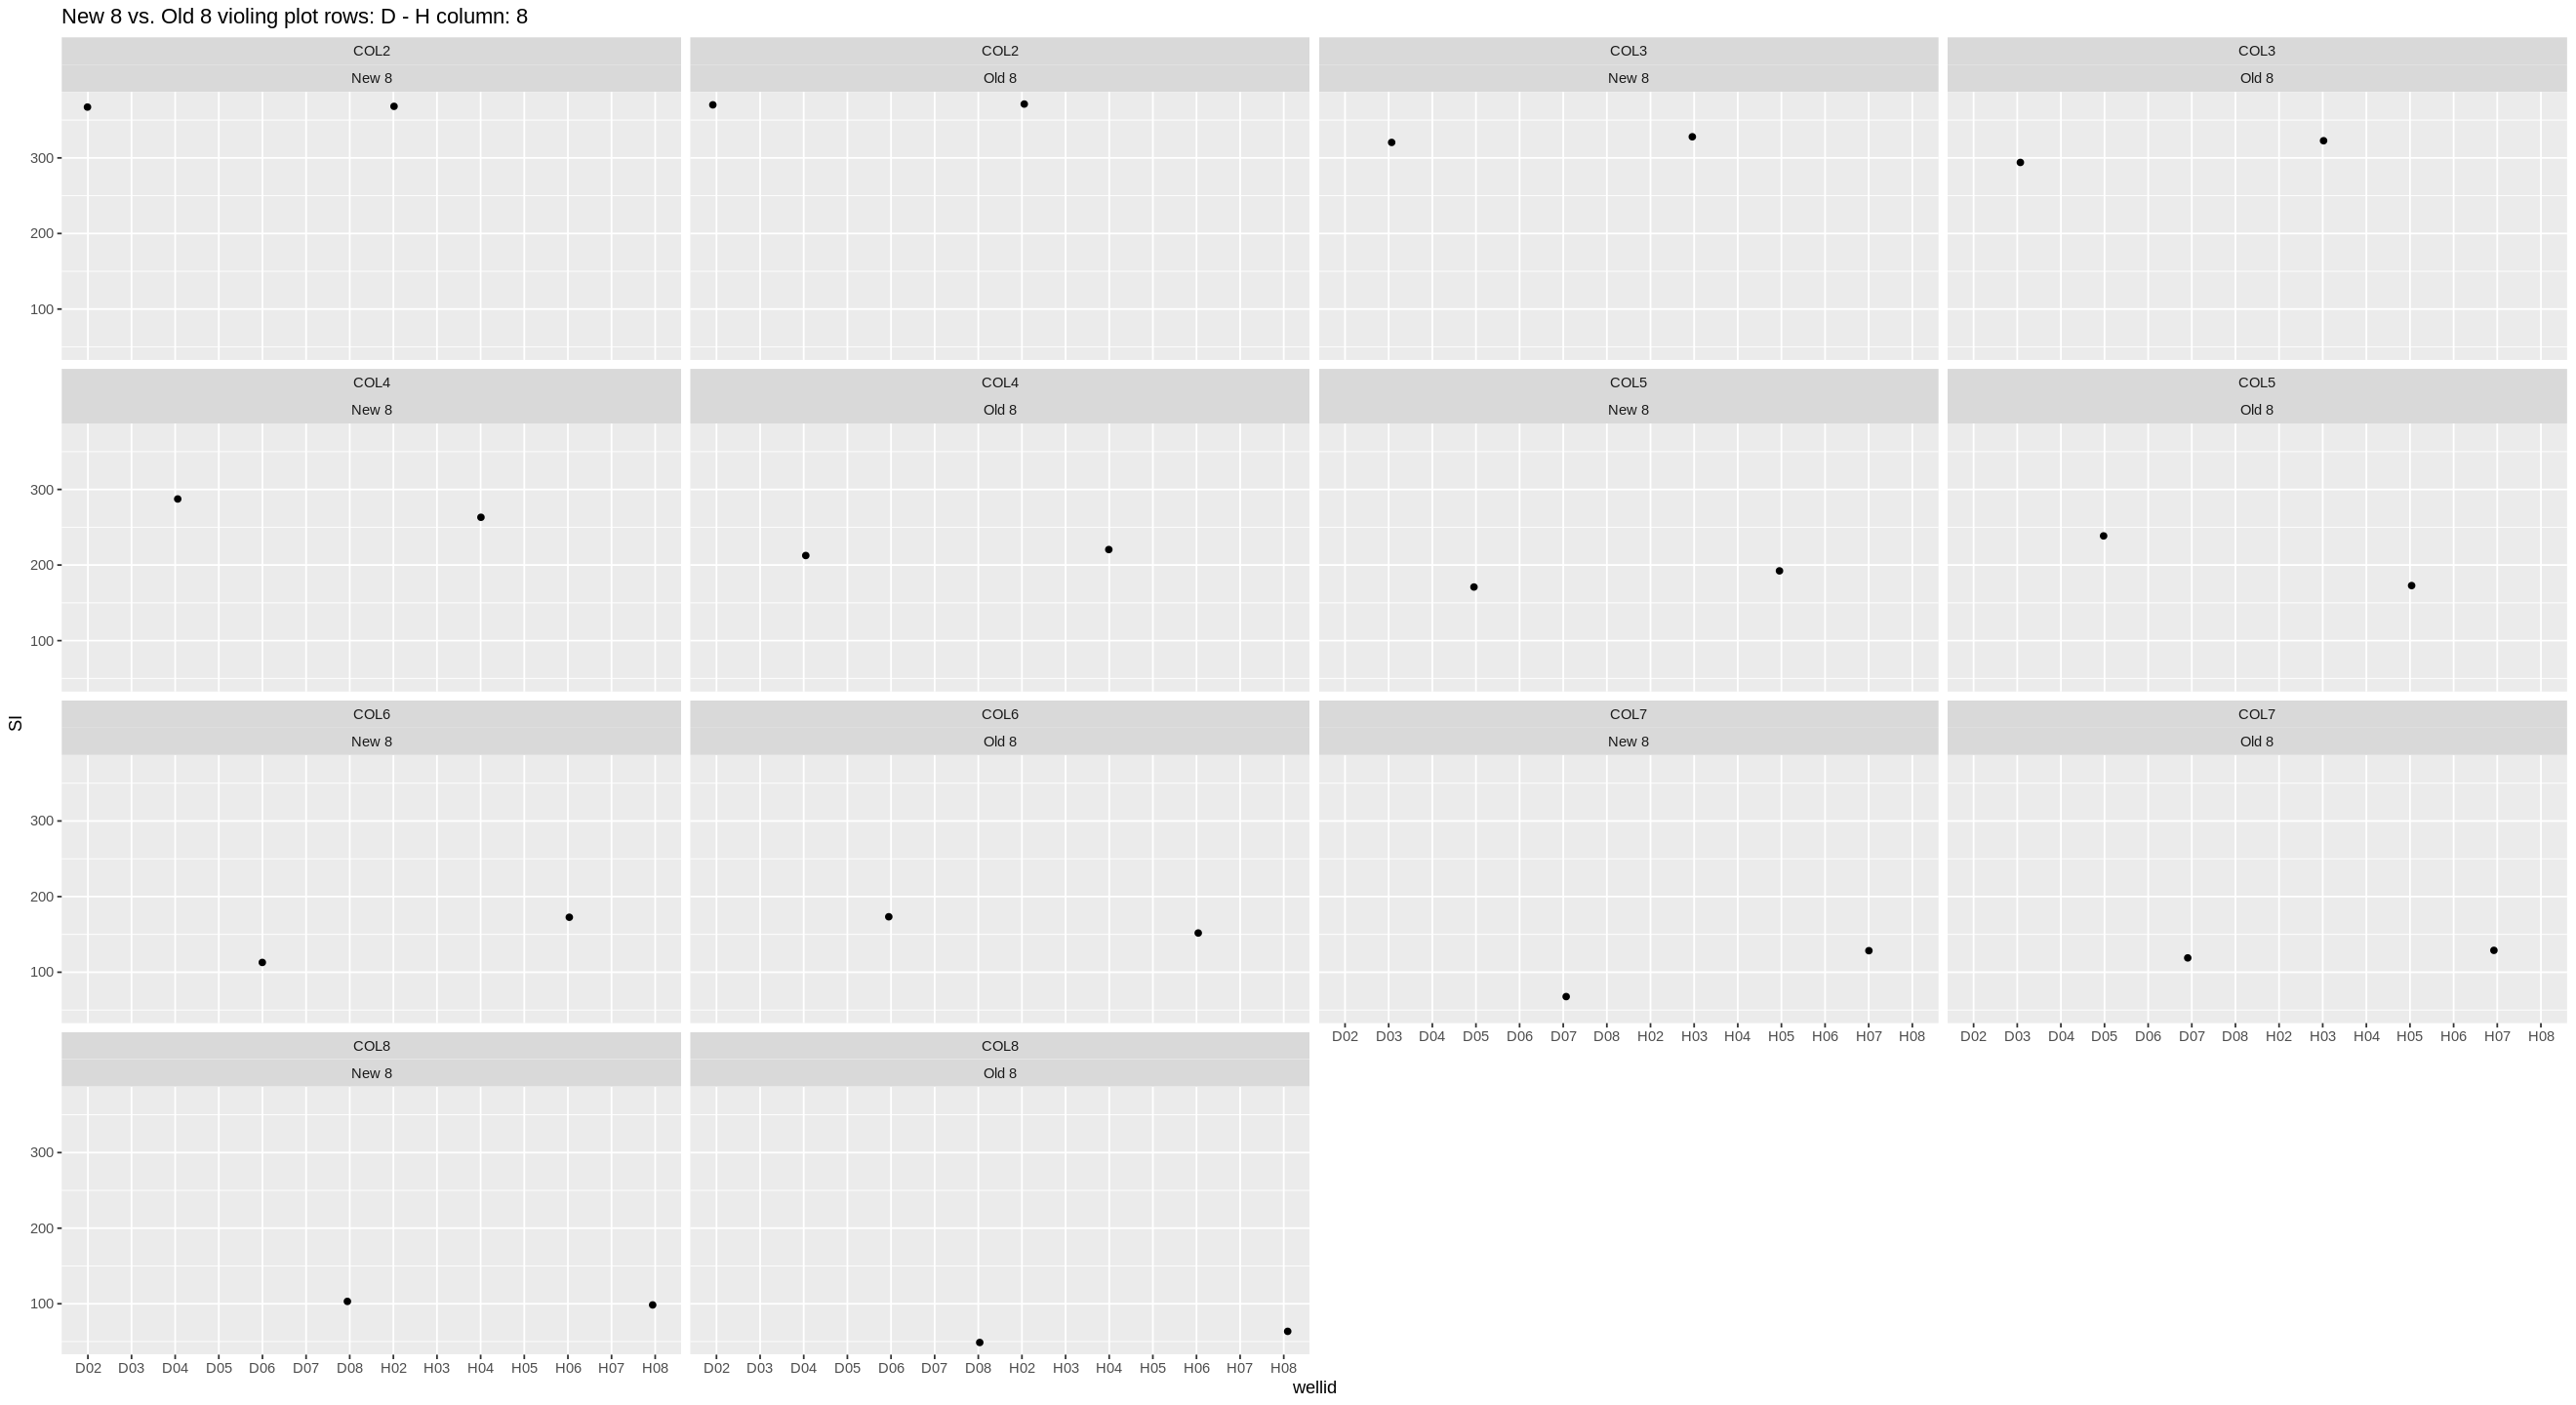

In [84]:
p_violin_si
#ggsave(filename = "violin_4rows_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [85]:
save_gg <- function(p, ncol, filename) {
    pp <- arrangeGrob(grobs = p, ncol=ncol)
    ggsave(filename = paste0(filename, ".png"), plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)
}

#### Violin plots
-  It is similar to a box plot, with the addition of a rotated kernel density plot on each side

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”


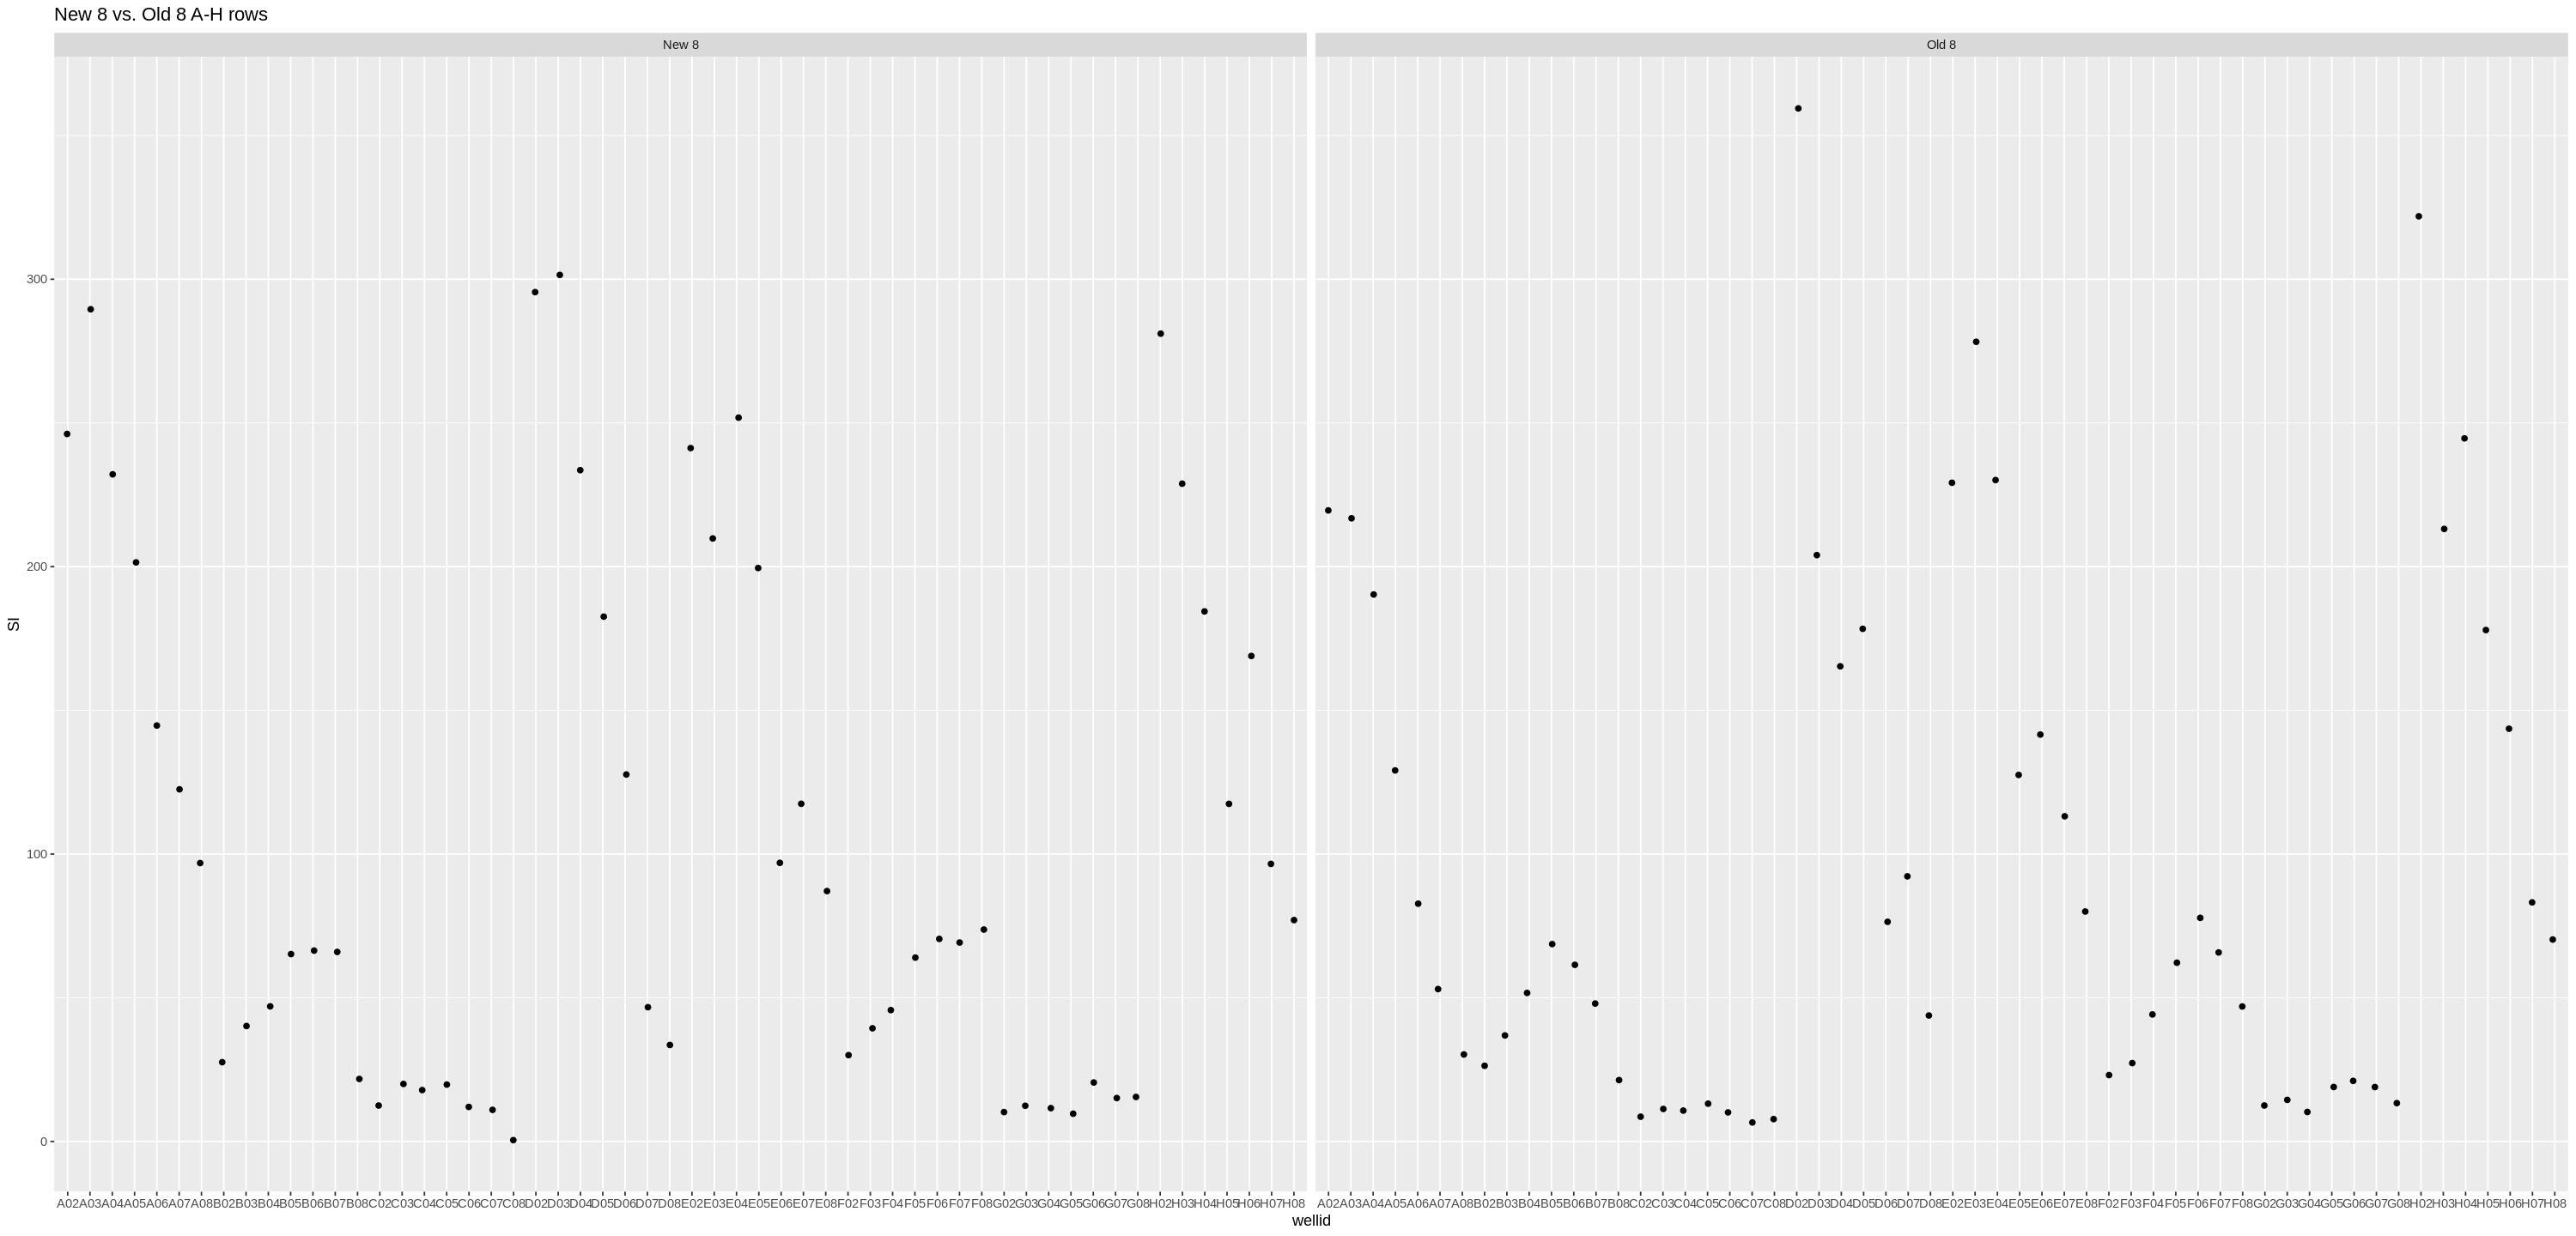

In [106]:
ggplot(dfm, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 A-H rows") ) +
    facet_wrap(~ method)
#ggsave(filename = "violin_4rows_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [107]:
dff <- dfm %>% 
    mutate(group = case_when(
       as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
       as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
       as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
       as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
       as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
       as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
       as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
        ),
           row = case_when(
       substr(wellid, 1,1) == "A" ~ "A-E",
       substr(wellid, 1,1) == "B" ~ "B-F",
       substr(wellid, 1,1) == "C" ~ "C-G",
       substr(wellid, 1,1) == "D" ~ "D-H",
       substr(wellid, 1,1) == "E" ~ "A-E",
       substr(wellid, 1,1) == "F" ~ "B-F",
       substr(wellid, 1,1) == "G" ~ "C-G",
       substr(wellid, 1,1) == "H" ~ "D-H"
       ),
           subgroup = case_when(
       row == "A-E" & group == "COL2" ~ "A2-E2",
       row == "A-E" & group == "COL3" ~ "A3-E3",
       row == "A-E" & group == "COL4" ~ "A4-E4",
       row == "A-E" & group == "COL5" ~ "A5-E5",
       row == "A-E" & group == "COL6" ~ "A6-E6",
       row == "A-E" & group == "COL7" ~ "A7-E7",
       row == "A-E" & group == "COL8" ~ "A8-E8",
       row == "B-F" & group == "COL2" ~ "B2-F2",
       row == "B-F" & group == "COL3" ~ "B3-F3",
       row == "B-F" & group == "COL4" ~ "B4-F4",
       row == "B-F" & group == "COL5" ~ "B5-F5",
       row == "B-F" & group == "COL6" ~ "B6-F6",
       row == "B-F" & group == "COL7" ~ "B7-F7",
       row == "B-F" & group == "COL8" ~ "B8-F8",
       row == "C-G" & group == "COL2" ~ "C2-G2",
       row == "C-G" & group == "COL3" ~ "C3-G3",
       row == "C-G" & group == "COL4" ~ "C4-G4",
       row == "C-G" & group == "COL5" ~ "C5-G5",
       row == "C-G" & group == "COL6" ~ "C6-G6",
       row == "C-G" & group == "COL7" ~ "C7-G7",
       row == "C-G" & group == "COL8" ~ "C8-G8",
       row == "D-H" & group == "COL2" ~ "D2-H2",
       row == "D-H" & group == "COL3" ~ "D3-H3",
       row == "D-H" & group == "COL4" ~ "D4-H4",
       row == "D-H" & group == "COL5" ~ "D5-H5",
       row == "D-H" & group == "COL6" ~ "D6-H6",
       row == "D-H" & group == "COL7" ~ "D7-H7",
       row == "D-H" & group == "COL8" ~ "D8-H8"
           )
      )

In [108]:
head(dff)

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 246.1658 Specimen_001_A2_A02_001.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 289.5488 Specimen_001_A3_A03_002.fcs A03    plate 1 New 8  COL3  A-E A3-E3   
3 232.1185 Specimen_001_A4_A04_003.fcs A04    plate 1 New 8  COL4  A-E A4-E4   
4 201.4752 Specimen_001_A5_A05_004.fcs A05    plate 1 New 8  COL5  A-E A5-E5   
5 144.7151 Specimen_001_A6_A06_005.fcs A06    plate 1 New 8  COL6  A-E A6-E6   
6 122.5111 Specimen_001_A7_A07_006.fcs A07    plate 1 New 8  COL7  A-E A7-E7

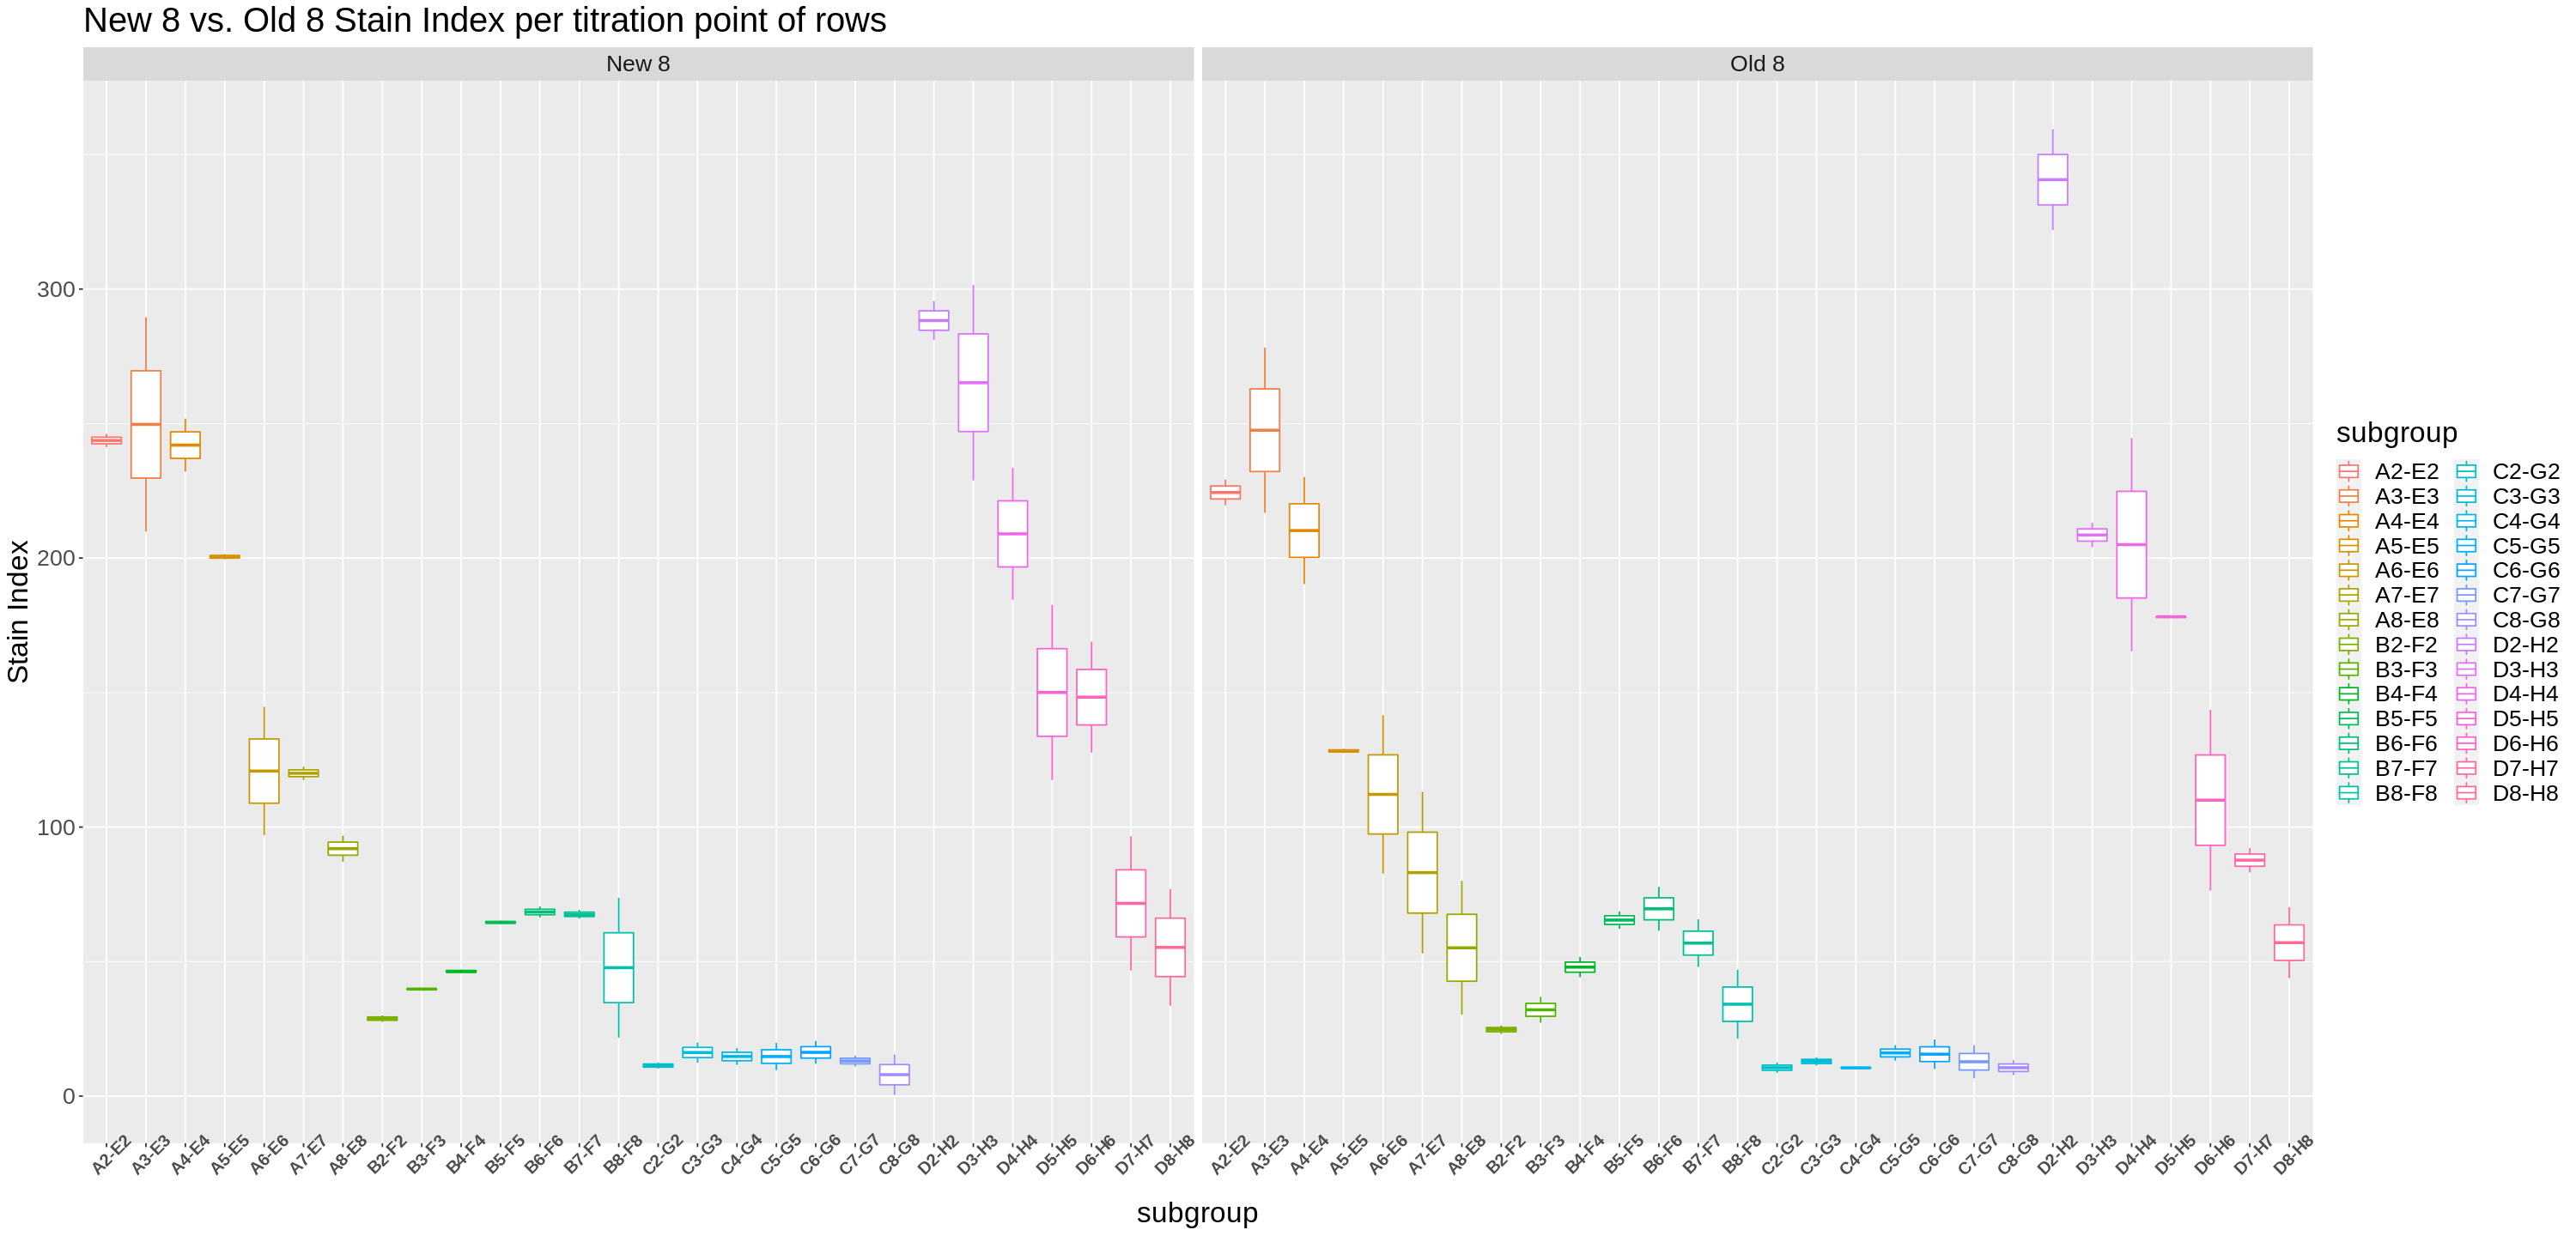

In [109]:
ggplot(dff, aes(subgroup, SI, colour = subgroup)) + 
  geom_boxplot() + 
  labs(title="New 8 vs. Old 8 Stain Index per titration point of rows") +
  ylab("Stain Index") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”


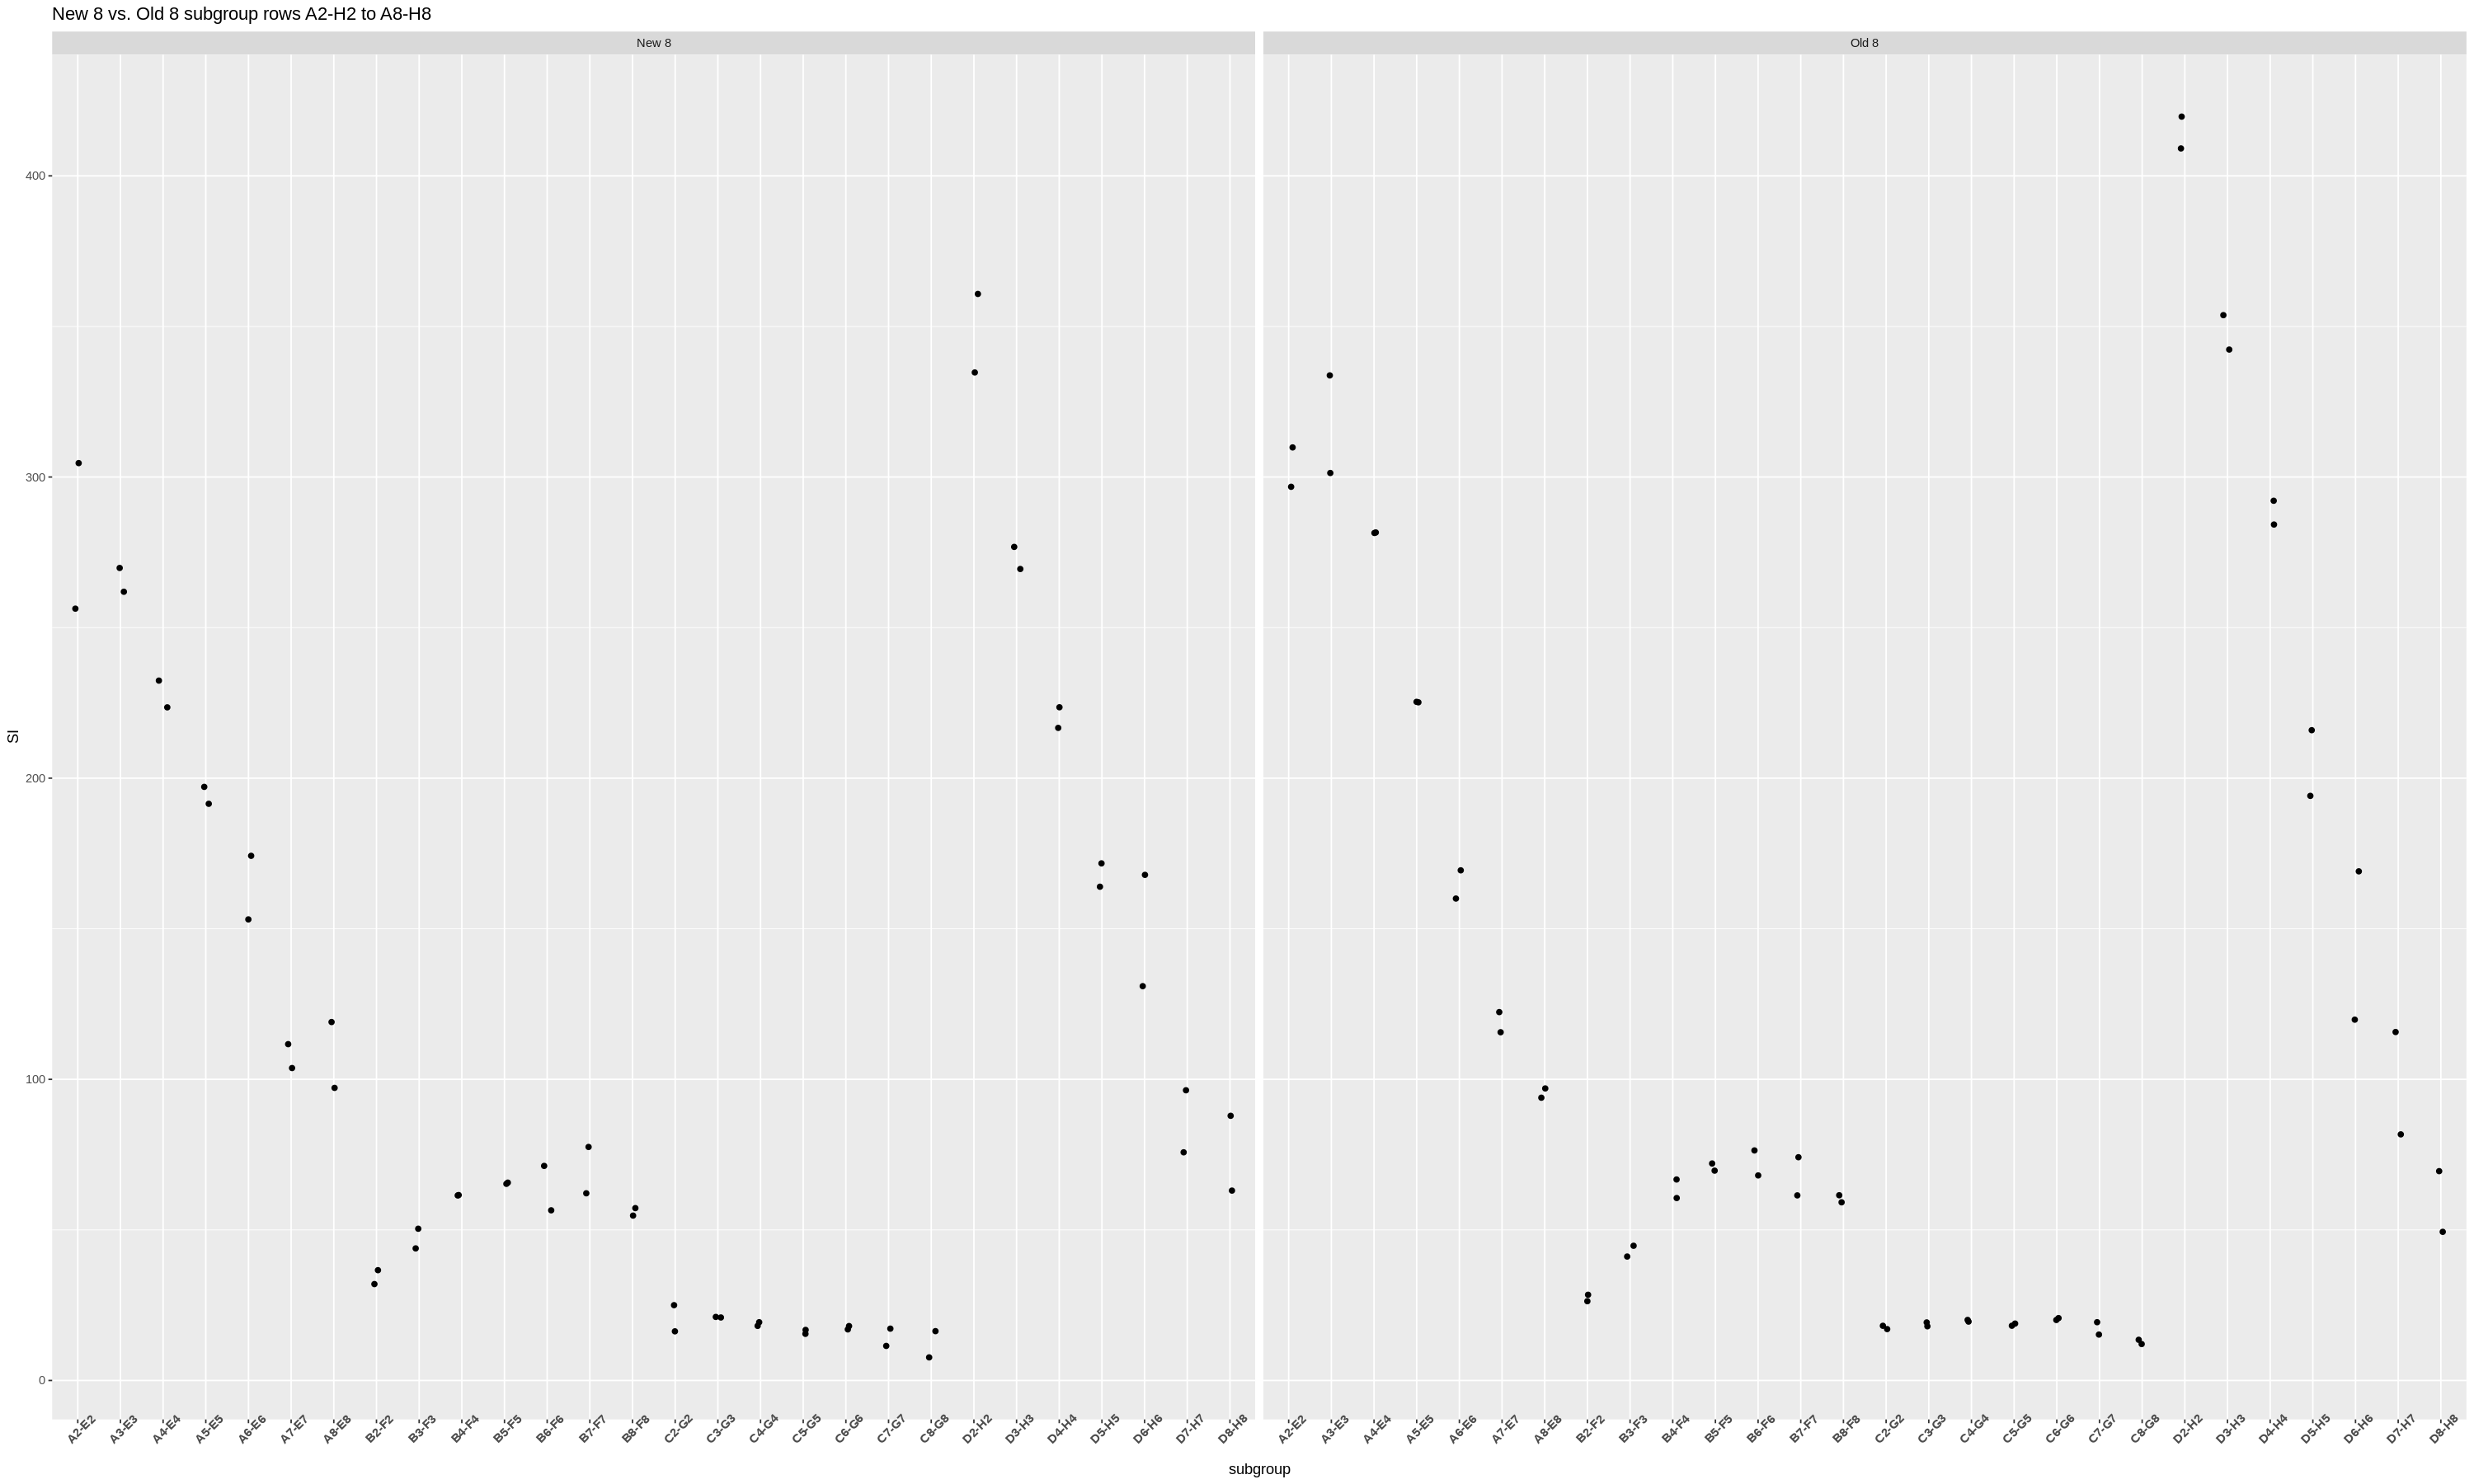

In [171]:
ggplot(dff, aes(subgroup, SI,)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 subgroup rows A2-H2 to A8-H8") ) +
    facet_wrap( ~ method) + 
    theme(axis.text.x = element_text(face = "bold", 
                           size = 8.75, angle = 45)) 

In [173]:
dff %>% filter(group=="COL2" & row == "A-E")

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 256.2940 Specimen_001_A2_A02_001.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 304.6173 Specimen_001_E2_E02_049.fcs E02    plate 1 New 8  COL2  A-E A2-E2   
3 309.8282 Specimen_001_A2_A02_097.fcs A02    plate 1 Old 8  COL2  A-E A2-E2   
4 296.7535 Specimen_001_E2_E02_145.fcs E02    plate 1 Old 8  COL2  A-E A2-E2

### simple stats

In [126]:
# old 8 vs new 8 (change j from 1-4)
j = 4
reagents <- c("BV-421","BUV-395","BB-515","PE")
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- setNames(data.frame(matrix(ncol = 8, nrow = 0)), c("MEAN.O", "SD.O", "MIN.O", "MAX.O", "MEAN.N", "SD.N", "MIN.N", "MAX.N"))

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    dfn<- dfm %>% 
        filter((wellid == paste0(pat1,"0",i) | wellid == paste0(pat2,"0",i)) & method == "New 8")
    dfo<- dfm %>% 
        filter((wellid == paste0(pat1,"0",i) | wellid == paste0(pat2,"0",i)) & method == "Old 8")
    df_stats[i-1, "MEAN.O"] = formatC(mean(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MEAN.N"] = formatC(mean(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "MIN.O"] = formatC(min(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MIN.N"] = formatC(min(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "MAX.O"] = formatC(max(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MAX.N"] = formatC(max(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "SD.O"] = formatC(sd(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "SD.N"] = formatC(sd(dfn$SI), format = "e", digits = 2)
    pctdiff = abs(mean(dfn$SI) - mean(dfo$SI)) / (mean(mean(dfn$SI), mean(dfo$SI))/2)
    print(pctdiff)
    df_stats[i-1, "PCT.DIFF"] = paste0(round(pctdiff*100,2), "%")
    df_stats[i-1, "CV.O"] = formatC(sd(dfo$SI)/mean(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "CV.N"] = formatC(sd(dfn$SI)/mean(dfn$SI),format = "e", digits = 2)
    df_stats[i-1, "ROW.GROUP"] = paste0(pat1,i,"-",pat2,i)
    df_stats[i-1, "REAGENT"] = reagents[j]
}
write.csv(df_stats, paste0("8v8_stats3_si_plt3_", pat1, pat2,".csv"), row.names = FALSE)

[1] "D - H old vs. new"
[1] "D2 - H2"


ERROR: Error: Problem with `filter()` input `..1`.
[31m✖[39m object 'method' not found
[34mℹ[39m Input `..1` is `&...`.


### ANOVA

In [114]:
# A-E
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: A - E"
[1] "A / E : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1    5.5    5.53   0.026  0.887
Residuals    2  426.4  213.18               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
            diff       lwr      upr     p adj
E02-A02 2.351766 -60.41634 65.11987 0.8868342

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    A02 
E02 0.89

P value adjustment method: BH 
[1] "A / E : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1     84    84.1   0.034  0.871
Residuals    2   4985  2492.5               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p adj


In [115]:
# B-F
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: B - F"
[1] "B / F : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  0.159   0.159   0.013   0.92
Residuals    2 24.861  12.430               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
              diff       lwr      upr     p adj
F02-B02 -0.3991157 -15.55585 14.75762 0.9202069

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    B02 
F02 0.92

P value adjustment method: BH 
[1] "B / F : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  27.09   27.09   0.689  0.494
Residuals    2  78.65   39.33               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p 

In [116]:
# C-G
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: C - G"
[1] "C / G : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1   0.66   0.660    0.13  0.753
Residuals    2  10.18   5.092               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p adj
G02-C02 0.8124355 -8.888385 10.51326 0.7532806

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    C02 
G02 0.75

P value adjustment method: BH 
[1] "C / G : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1   4.92   4.919   0.246  0.669
Residuals    2  39.93  19.964               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr    p adj

In [117]:
# D-H
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_plt3_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: D - H"
[1] "D / H : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  675.5   675.5    0.47  0.564
Residuals    2 2876.4  1438.2               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p adj
H02-D02 -25.98981 -189.0225 137.0429 0.5639009

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    D02 
H02 0.56

P value adjustment method: BH 
[1] "D / H : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1   1009    1009   0.414  0.586
Residuals    2   4876    2438               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr    p adj

### Find Outliers using Tietjen Moore Test
- detect multiple outliers in a univariate data set that follows an approximately normal distribution
- If there are no outliers in the data, the test statistic is close to 1. If there are outliers in the data, the test statistic will be closer to zero

In [89]:
# A-E new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("A", i, "-E", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [90]:
# B-F new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("B", i, "-F", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [91]:
# C-G new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("C", i, "-G", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [92]:
# D-H new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [93]:
# A-E old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("A", i, "-E", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [94]:
# B-F old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("B", i, "-F", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [95]:
# C-G old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("C", i, "-G", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [96]:
# D-H Old  
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



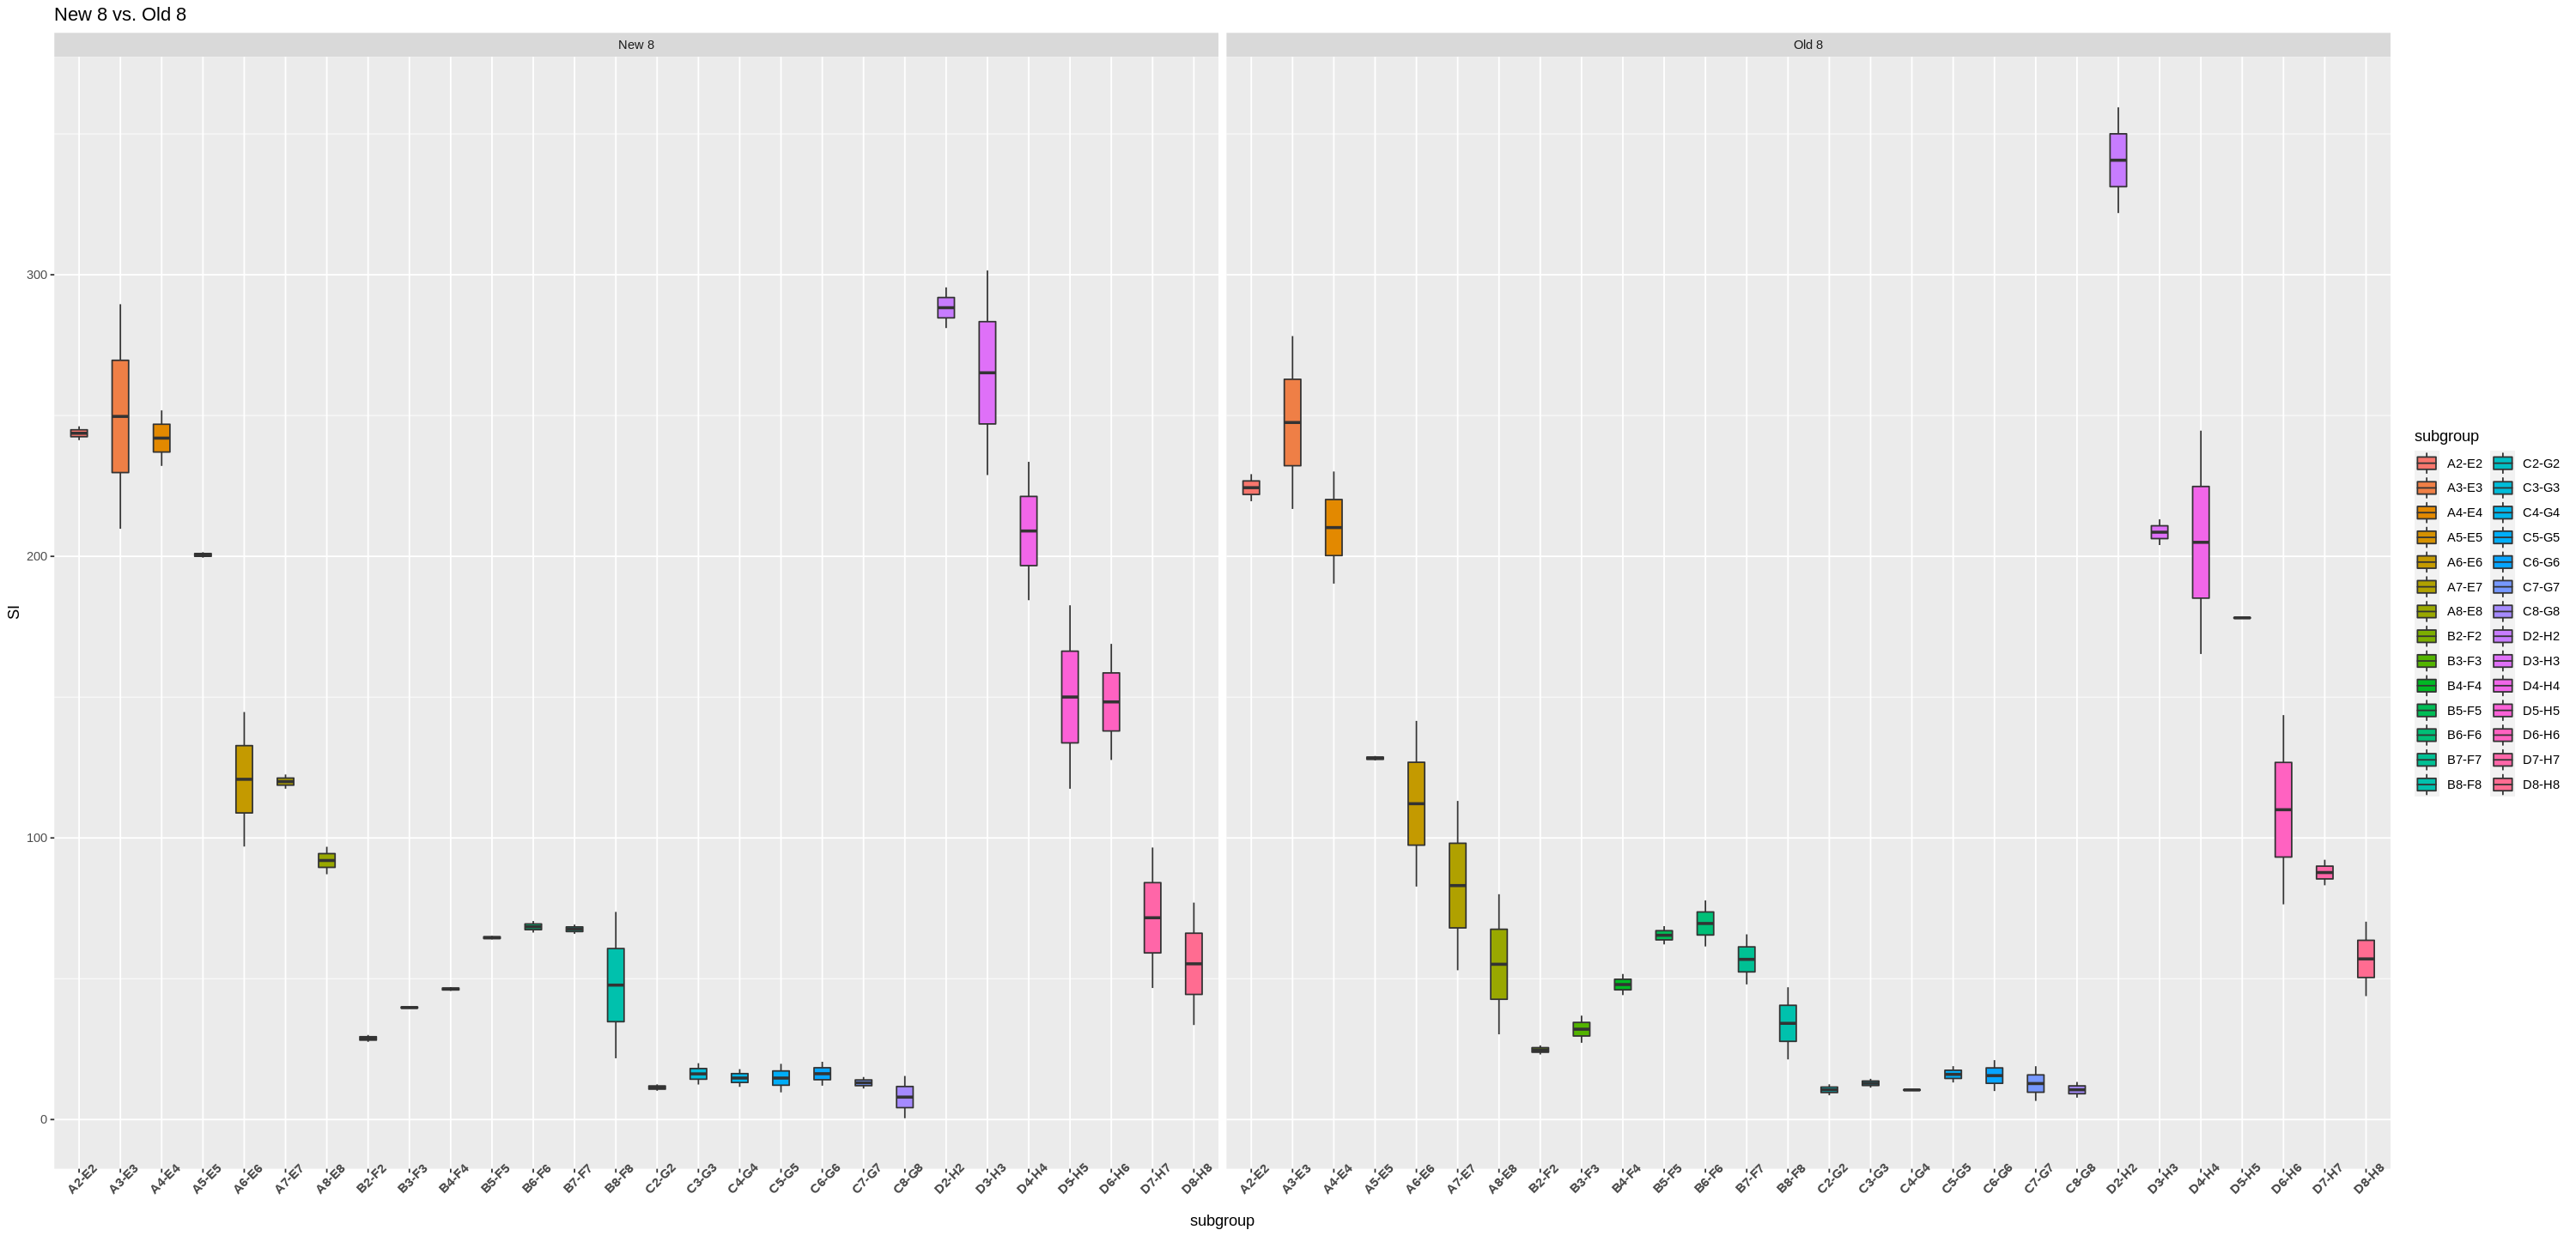

In [118]:
ggplot(dff, aes(subgroup, SI, fill=subgroup)) +
    geom_boxplot(width = 0.4) + 
#    stat_summary(geom="text", fun=quantile,
#           aes(label=sprintf("%1.1f", ..y..), color=subgroup),
#           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("New 8 vs. Old 8") + 
    facet_wrap( ~ method) +
    theme(axis.text.x = element_text(face = "bold", 
                           size = 8.75, angle = 45)) 
#ggsave(filename = "boxplt_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [120]:
# linear regression 
dfn <- dff %>% filter(method == "New 8")
dfo <- dff %>% filter(method == "Old 8")
dfm <- inner_join(x = dfn, y = dfo, by = "wellid")
reg <- lm(SI.y~SI.x,data=dfm) 
dfm <- dfm %>% mutate(regline = reg[[1]][2]*SI.x + reg[[1]][1])
summary(reg)


Call:
lm(formula = SI.y ~ SI.x, data = dfm)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.586  -8.421   0.097   6.554  91.241 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.27384    7.01694   0.182    0.857    
SI.x         0.90323    0.05067  17.826   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.64 on 54 degrees of freedom
Multiple R-squared:  0.8547,	Adjusted R-squared:  0.8521 
F-statistic: 317.8 on 1 and 54 DF,  p-value: < 2.2e-16


In [121]:
head(dfm)

SI.x     SAMPLE_NAME.x               wellid plate.x method.x group.x row.x
1 246.1658 Specimen_001_A2_A02_001.fcs A02    plate 1 New 8    COL2    A-E  
2 289.5488 Specimen_001_A3_A03_002.fcs A03    plate 1 New 8    COL3    A-E  
3 232.1185 Specimen_001_A4_A04_003.fcs A04    plate 1 New 8    COL4    A-E  
4 201.4752 Specimen_001_A5_A05_004.fcs A05    plate 1 New 8    COL5    A-E  
5 144.7151 Specimen_001_A6_A06_005.fcs A06    plate 1 New 8    COL6    A-E  
6 122.5111 Specimen_001_A7_A07_006.fcs A07    plate 1 New 8    COL7    A-E  
  subgroup.x SI.y      SAMPLE_NAME.y               plate.y method.y group.y
1 A2-E2      219.57171 Specimen_001_A2_A02_002.fcs plate 1 Old 8    COL2   
2 A3-E3      216.82250 Specimen_001_A3_A03_003.fcs plate 1 Old 8    COL3   
3 A4-E4      190.31277 Specimen_001_A4_A04_004.fcs plate 1 Old 8    COL4   
4 A5-E5      129.09763 Specimen_001_A5_A05_005.fcs plate 1 Old 8    COL5   
5 A6-E6       82.72409 Specimen_001_A6_A06_006.fcs plate 1 Old 8    COL6   
6 A7-E7       53.01012 Specimen_001_A7_A07_007.fcs plate 1 Old 8    COL7   
  row.y subgroup.y regline 
1 A-E   A2-E2      223.6181
2 A-E   A3-E3      262.8029
3 A-E   A4-E4      210.9302
4 A-E   A5-E5      183.2522
5 A-E   A6-E6      131.9848
6 A-E   A7-E7      111.9295

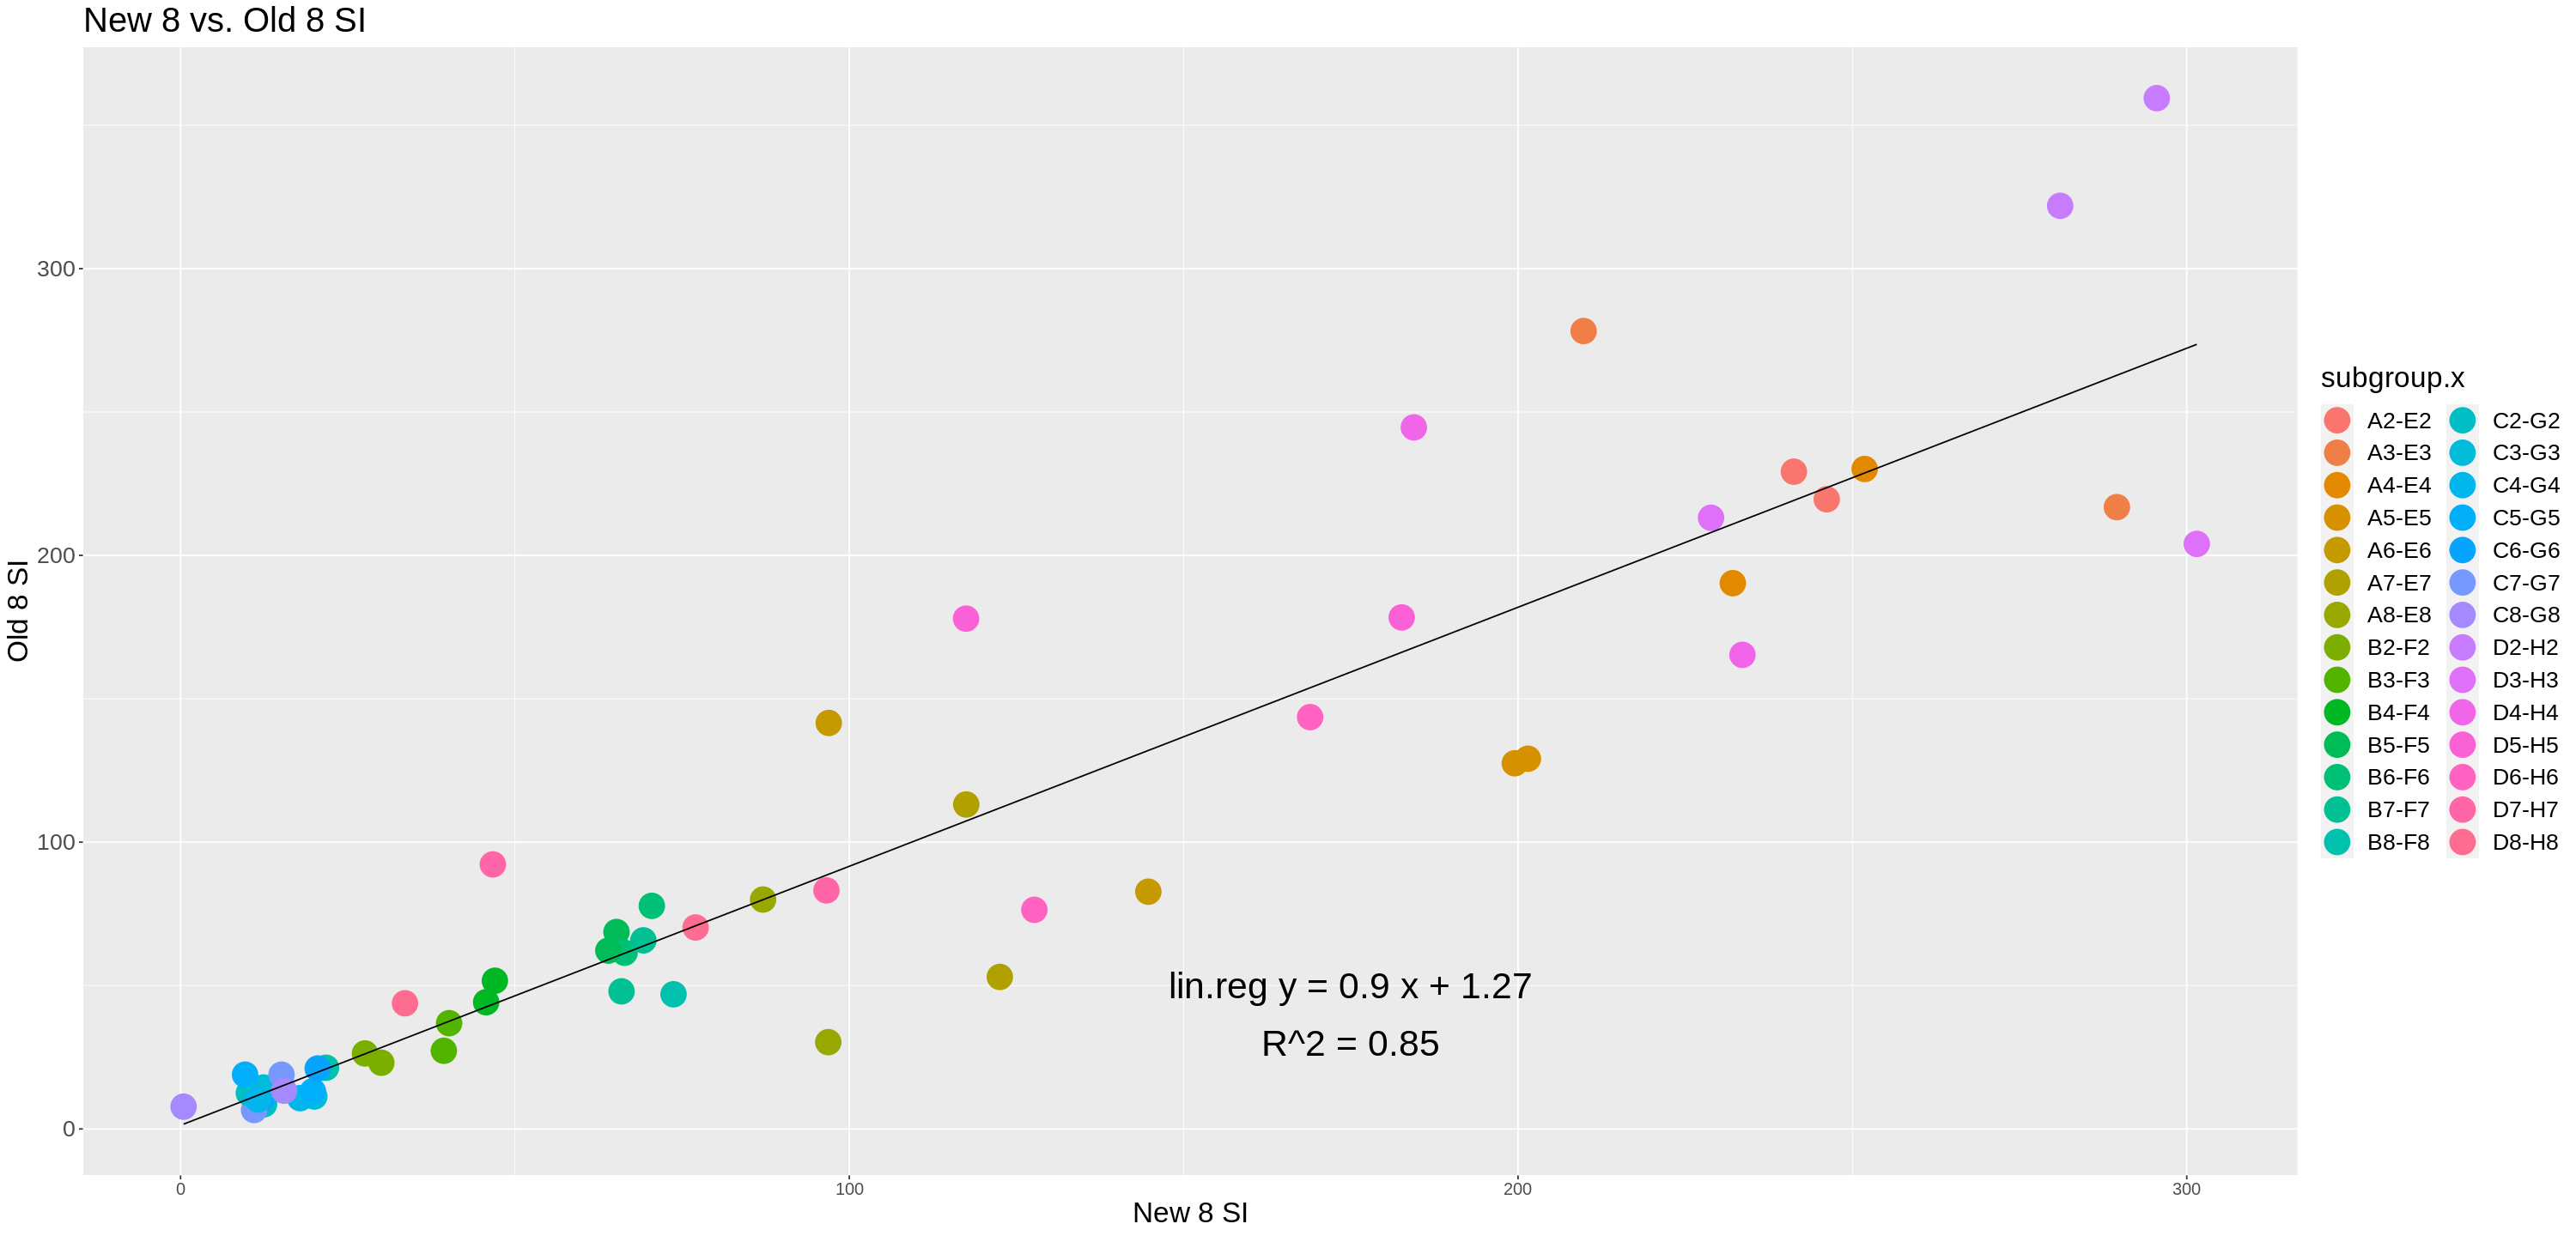

In [125]:
ggplot(dfm) + 
    geom_point(size = 8, aes(x = SI.x, 
                   y = SI.y, 
                   color=subgroup.x)) + 
    geom_line(aes(x = SI.x, 
                  y = regline)) + 
    ggtitle("New 8 vs. Old 8 SI") + 
    xlab("New 8 SI") + 
    ylab("Old 8 SI") + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) +
    annotate("text", 
             x = 175, 
             y = 50, 
             size = 9,
             label = paste("lin.reg y =", round(reg[[1]][2],2), "x +", 
                           round(reg[[1]][1],2))) + 
    annotate("text",
             x = 175,
             y = 30,
             size = 9,
             label = paste("R^2 =", round(summary(reg)$`r.squared`, 2)))


### XmR charts to show data series

In [14]:
row_pair_ls <- list()
for (i in seq(4)) {
    row_pair_ls[[i]] <- c(wellIDs[, rows[[i]][1]], wellIDs[, rows[[i]][2]])
}
row_pair_ls <- unlist(row_pair_ls)
row_pair_ls

ERROR: Error in eval(expr, envir, enclos): object 'wellIDs' not found


In [183]:
head(dff)

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 256.2940 Specimen_001_A2_A02_001.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 269.7985 Specimen_001_A3_A03_002.fcs A03    plate 1 New 8  COL3  A-E A3-E3   
3 223.5190 Specimen_001_A4_A04_003.fcs A04    plate 1 New 8  COL4  A-E A4-E4   
4 191.4912 Specimen_001_A5_A05_004.fcs A05    plate 1 New 8  COL5  A-E A5-E5   
5 174.2166 Specimen_001_A6_A06_005.fcs A06    plate 1 New 8  COL6  A-E A6-E6   
6 103.7435 Specimen_001_A7_A07_006.fcs A07    plate 1 New 8  COL7  A-E A7-E7

In [184]:
options(repr.plot.width=25, repr.plot.height=15)

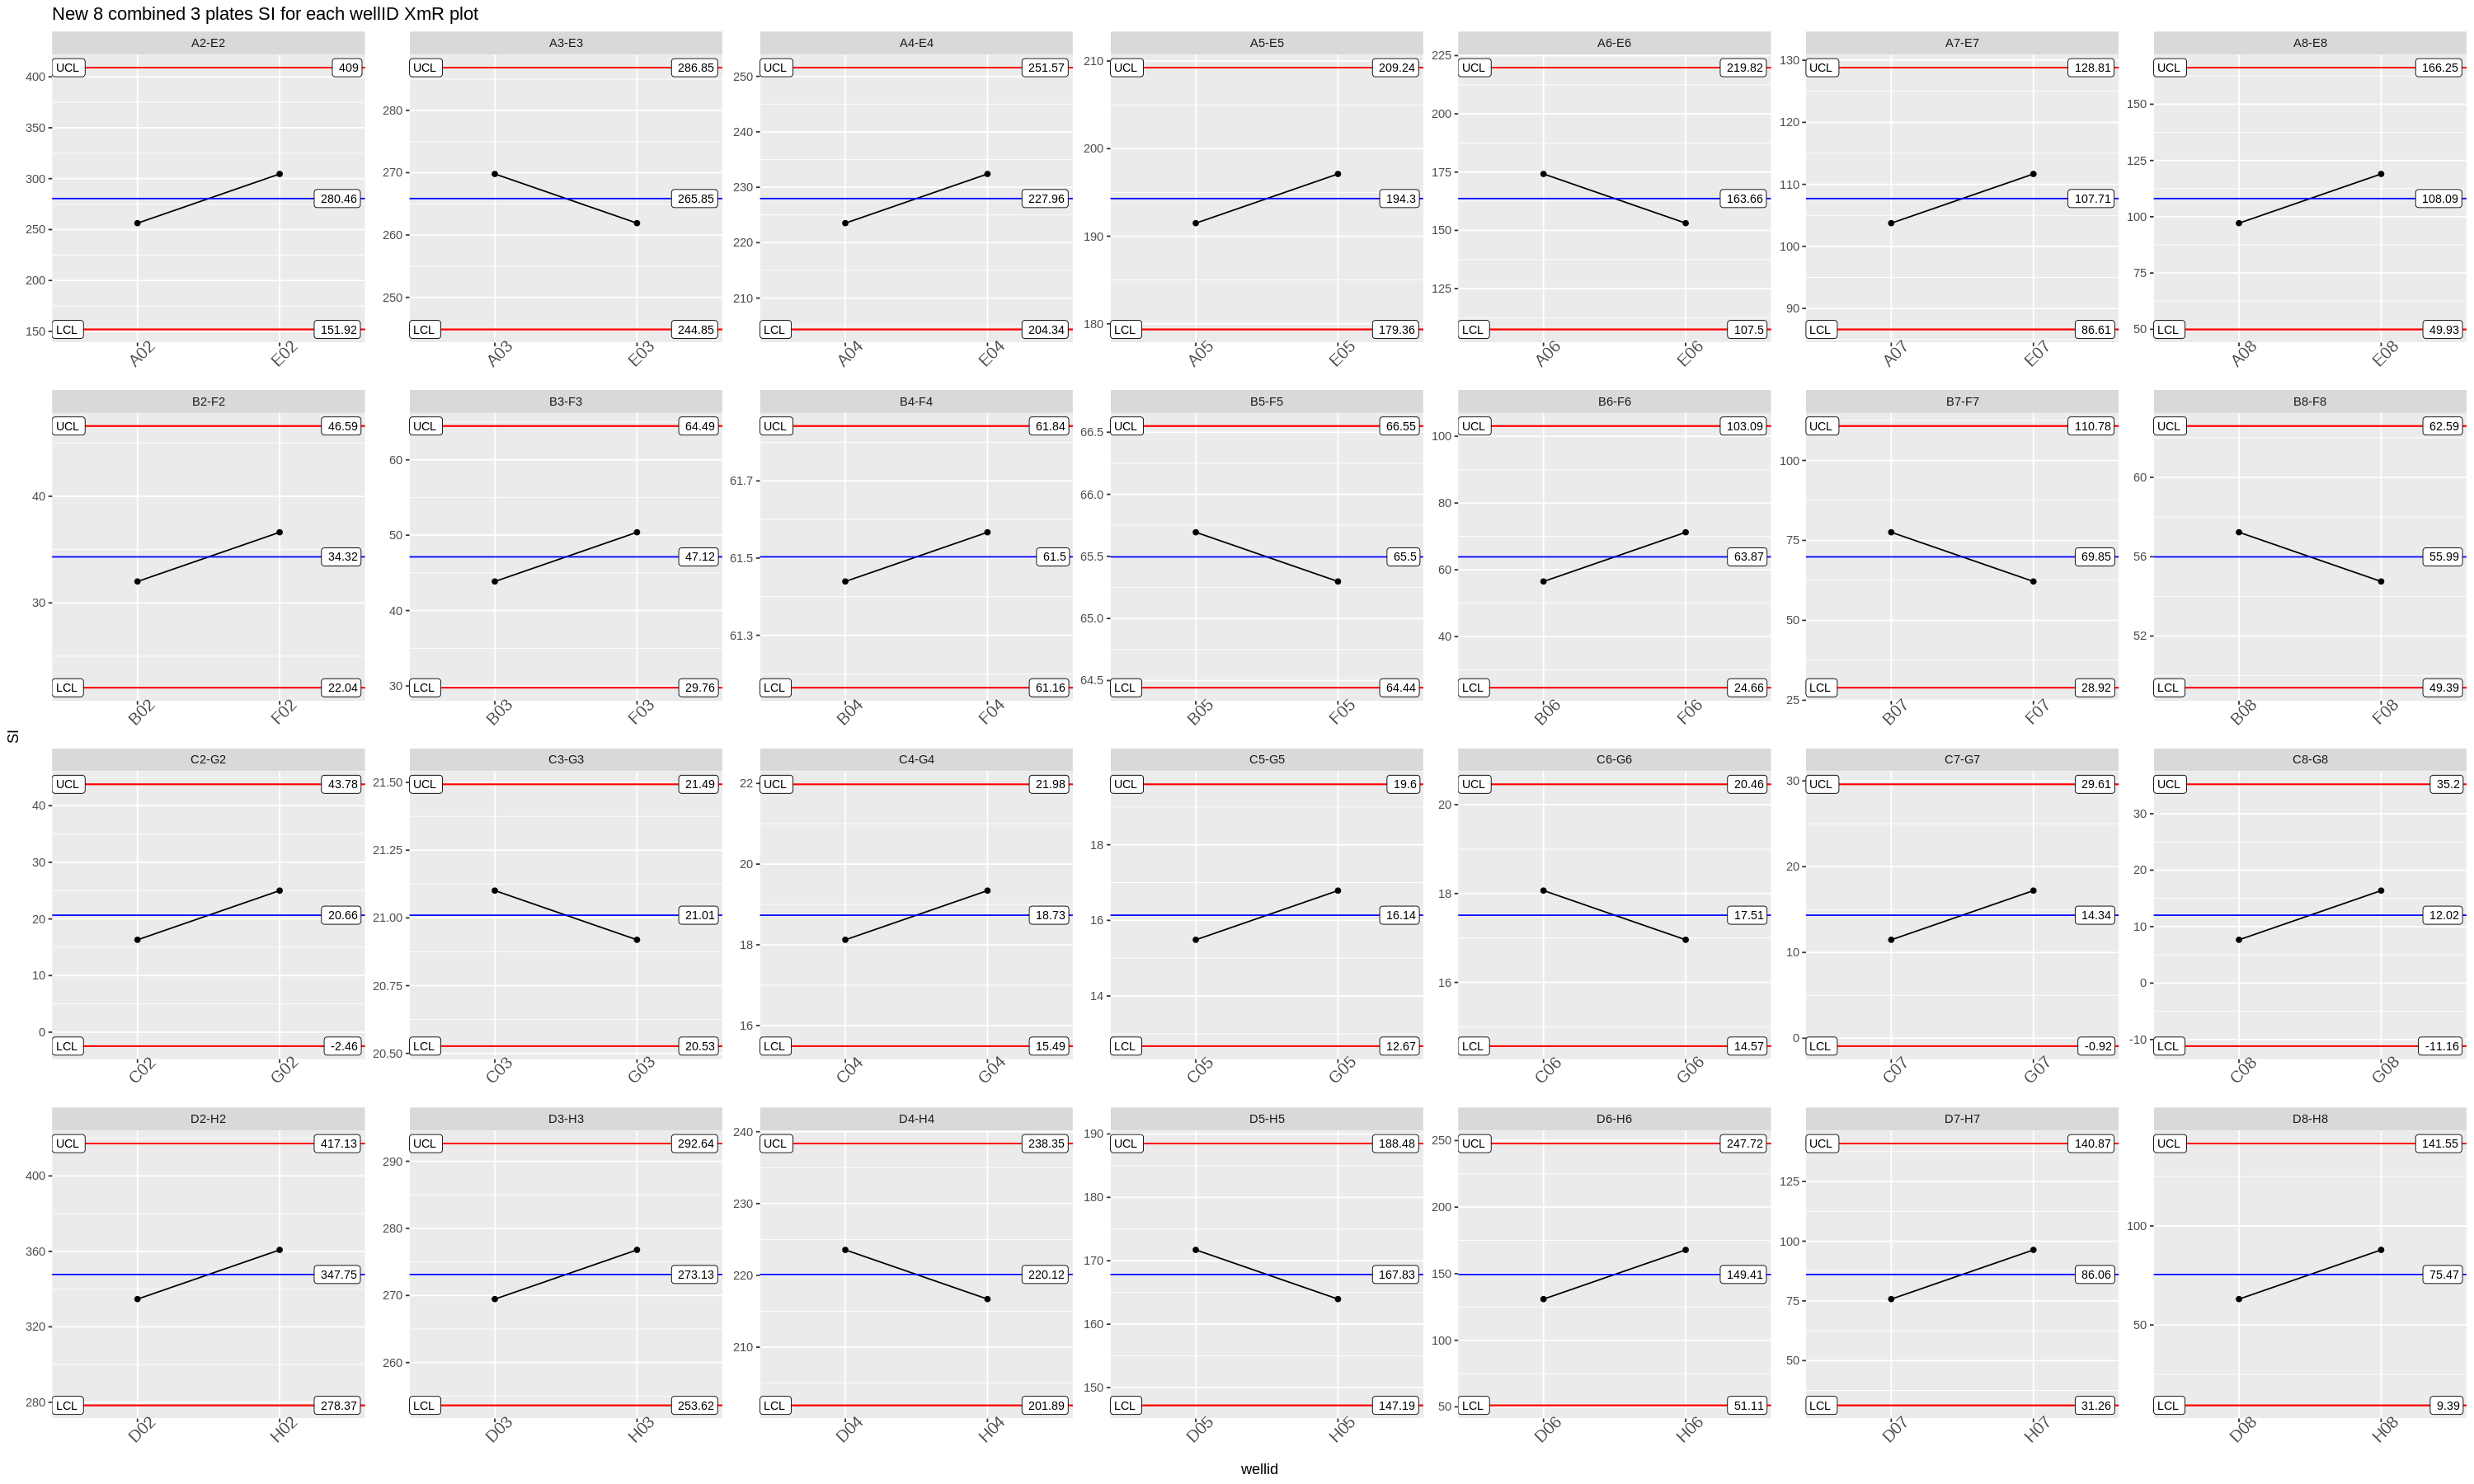

In [185]:
df.t <- dff %>% filter(method == "New 8")
ggplot(df.t, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  #scale_x_discrete(breaks=1:16,
  #                 labels=labels) + 
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

#ggsave(filename = "XmR_old8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

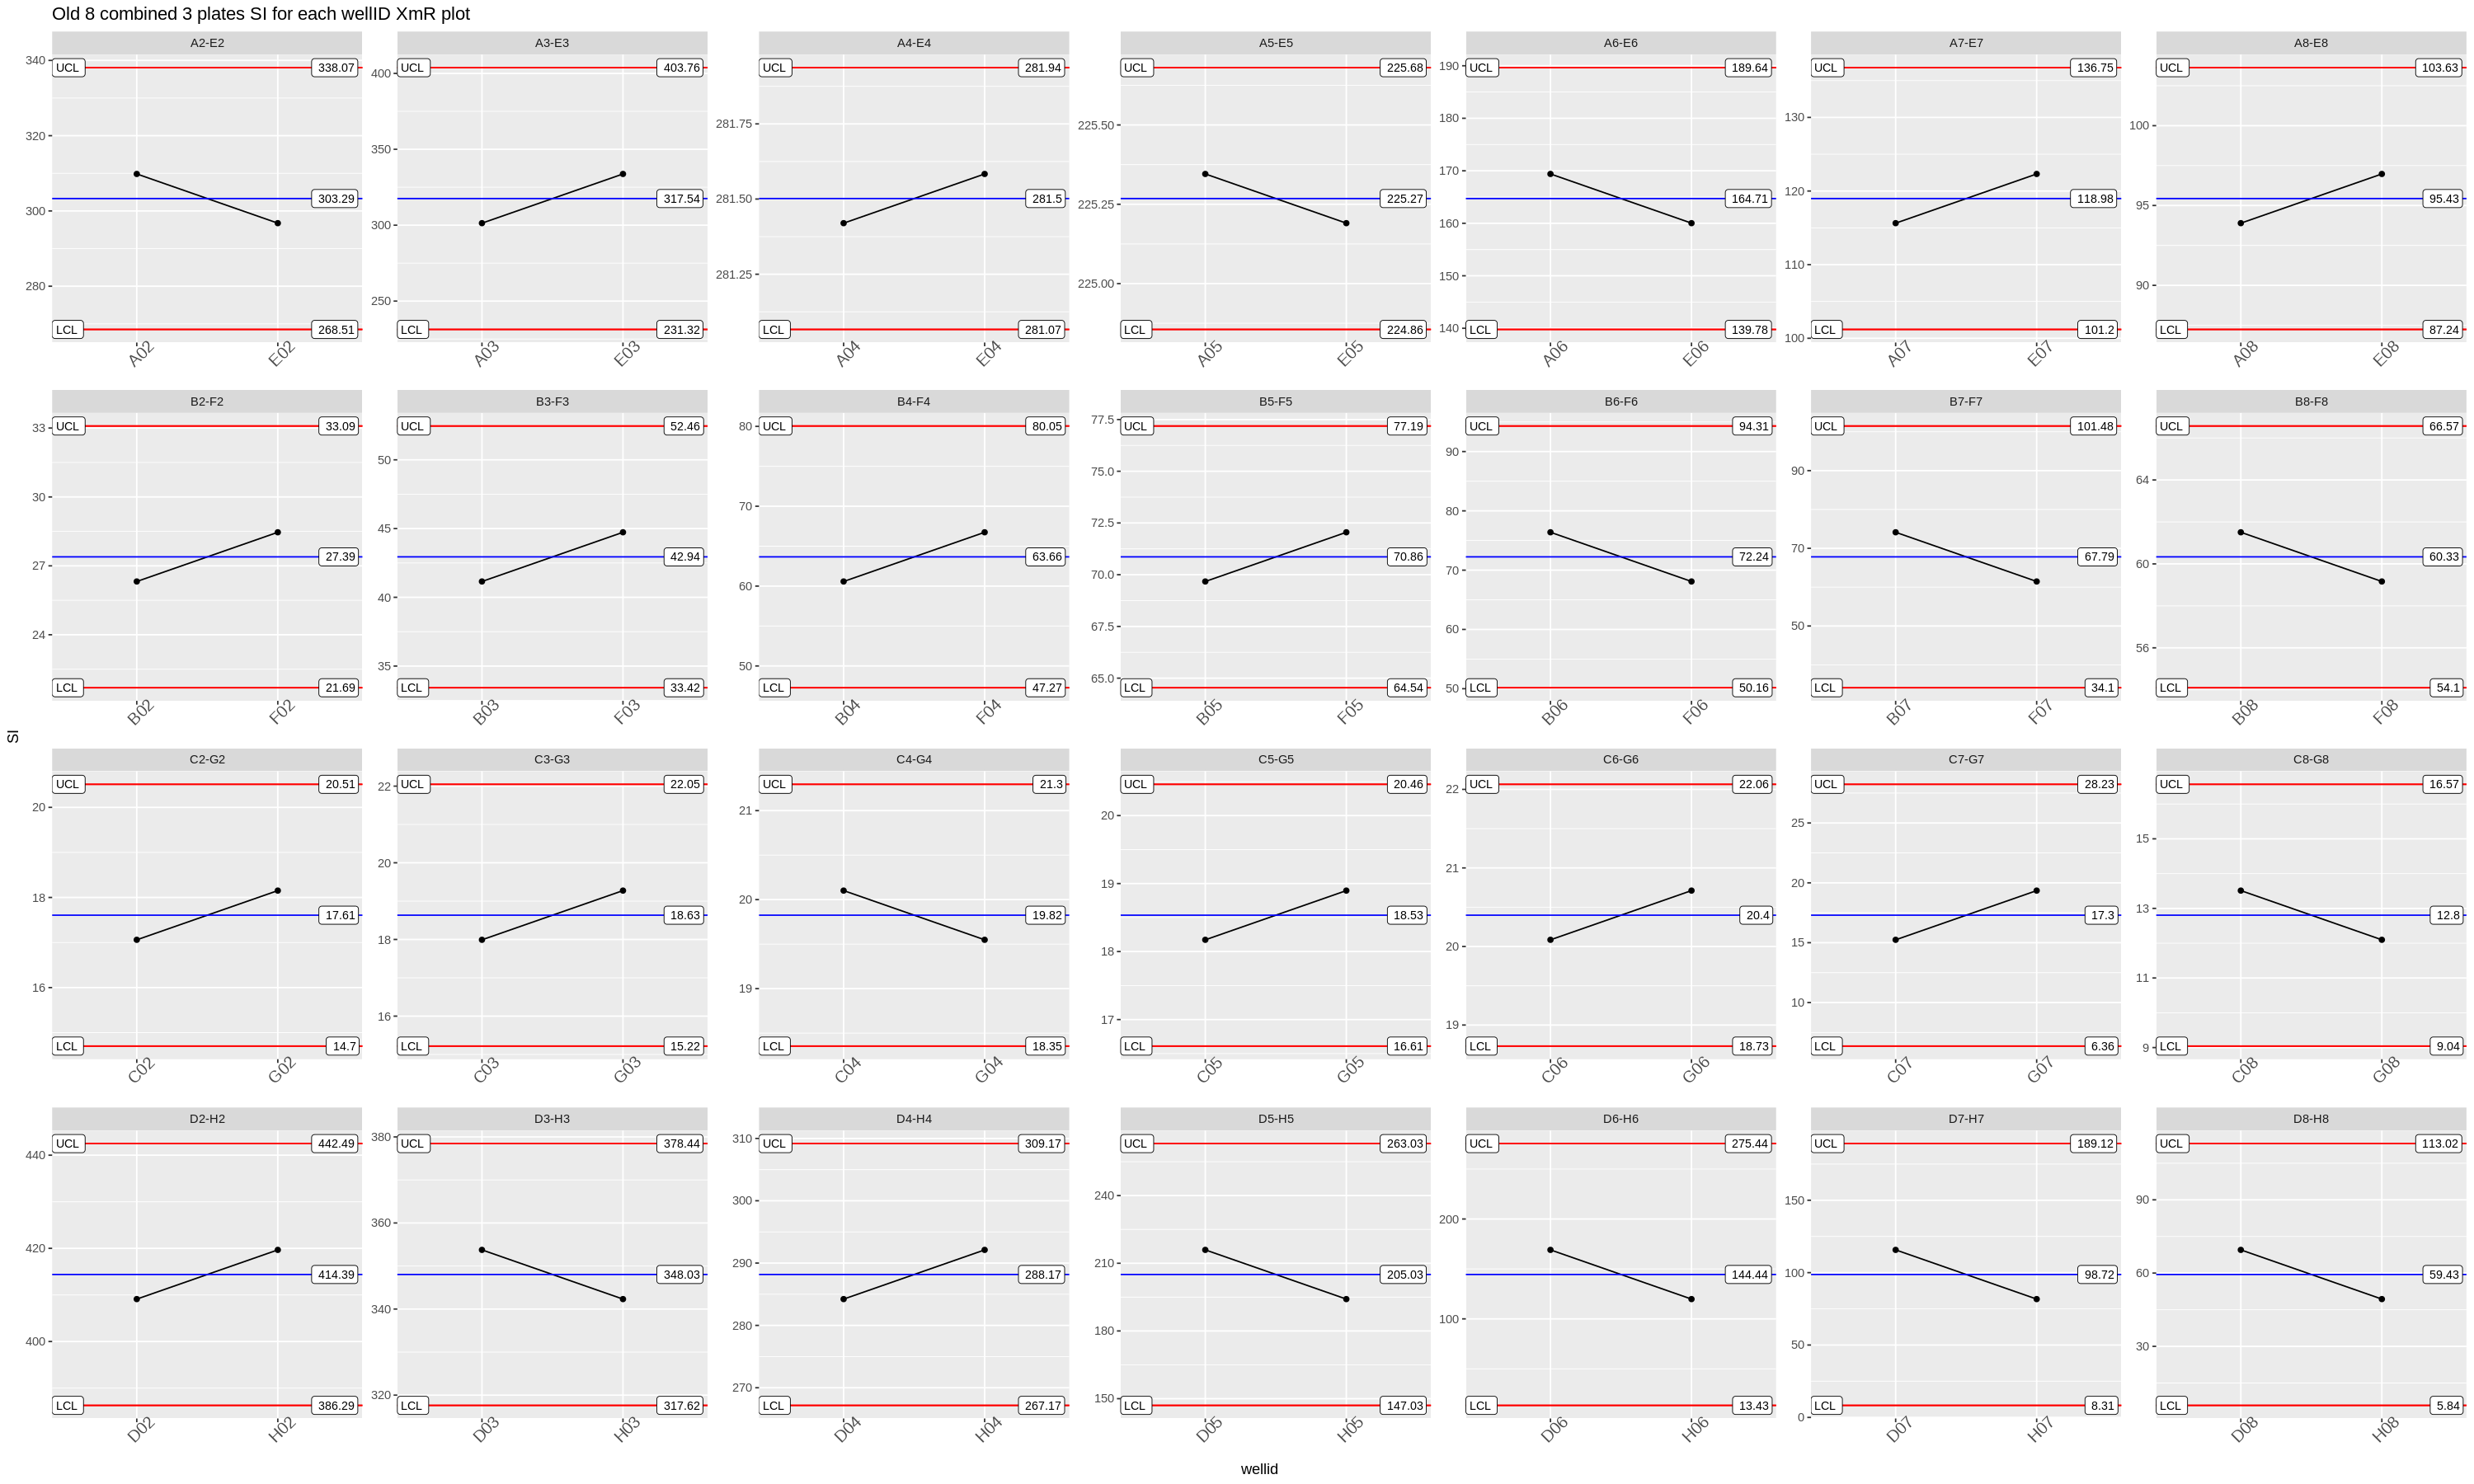

In [186]:
df.t <- dff %>% filter(method == "Old 8")
ggplot(df.t, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  #scale_x_discrete(expand =  expansion(mult = .04)) + 
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("Old 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

#ggsave(filename = "XmR_old8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [160]:
dff

SI.x       SAMPLE_NAME.x               wellid plate.x method.x group.x row.x
1  308.896726 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8    COL2    A-E  
2  309.241566 Specimen_001_A3_A03_004.fcs A03    plate 1 New 8    COL3    A-E  
3  260.839640 Specimen_001_A4_A04_005.fcs A04    plate 1 New 8    COL4    A-E  
4  243.821622 Specimen_001_A5_A05_006.fcs A05    plate 1 New 8    COL5    A-E  
5  185.604823 Specimen_001_A6_A06_007.fcs A06    plate 1 New 8    COL6    A-E  
6  139.532694 Specimen_001_A7_A07_008.fcs A07    plate 1 New 8    COL7    A-E  
7   80.240020 Specimen_001_A8_A08_009.fcs A08    plate 1 New 8    COL8    A-E  
8   43.561838 Specimen_001_B2_B02_015.fcs B02    plate 1 New 8    COL2    B-F  
9   59.085214 Specimen_001_B3_B03_016.fcs B03    plate 1 New 8    COL3    B-F  
10  84.712966 Specimen_001_B4_B04_017.fcs B04    plate 1 New 8    COL4    B-F  
11  81.276228 Specimen_001_B5_B05_018.fcs B05    plate 1 New 8    COL5    B-F  
12  72.411202 Specimen_001_B6_B06_019.fcs B06    plate 1 New 8    COL6    B-F  
13  66.227185 Specimen_001_B7_B07_020.fcs B07    plate 1 New 8    COL7    B-F  
14  57.044127 Specimen_001_B8_B08_021.fcs B08    plate 1 New 8    COL8    B-F  
15  21.007371 Specimen_001_C2_C02_027.fcs C02    plate 1 New 8    COL2    C-G  
16  22.316651 Specimen_001_C3_C03_028.fcs C03    plate 1 New 8    COL3    C-G  
17  22.091451 Specimen_001_C4_C04_029.fcs C04    plate 1 New 8    COL4    C-G  
18  20.193875 Specimen_001_C5_C05_030.fcs C05    plate 1 New 8    COL5    C-G  
19  13.611927 Specimen_001_C6_C06_031.fcs C06    plate 1 New 8    COL6    C-G  
20   9.090341 Specimen_001_C7_C07_032.fcs C07    plate 1 New 8    COL7    C-G  
21   8.140672 Specimen_001_C8_C08_033.fcs C08    plate 1 New 8    COL8    C-G  
22 367.201128 Specimen_001_D2_D02_039.fcs D02    plate 1 New 8    COL2    D-H  
23 320.447753 Specimen_001_D3_D03_040.fcs D03    plate 1 New 8    COL3    D-H  
24 287.392071 Specimen_001_D4_D04_041.fcs D04    plate 1 New 8    COL4    D-H  
25 170.927659 Specimen_001_D5_D05_042.fcs D05    plate 1 New 8    COL5    D-H  
26 112.915608 Specimen_001_D6_D06_043.fcs D06    plate 1 New 8    COL6    D-H  
27  67.719669 Specimen_001_D7_D07_044.fcs D07    plate 1 New 8    COL7    D-H  
28 103.116734 Specimen_001_D8_D08_045.fcs D08    plate 1 New 8    COL8    D-H  
29 313.247084 Specimen_001_E2_E02_051.fcs E02    plate 1 New 8    COL2    A-E  
30 300.829250 Specimen_001_E3_E03_052.fcs E03    plate 1 New 8    COL3    A-E  
31 266.903738 Specimen_001_E4_E04_053.fcs E04    plate 1 New 8    COL4    A-E  
32 209.025835 Specimen_001_E5_E05_054.fcs E05    plate 1 New 8    COL5    A-E  
33 158.694908 Specimen_001_E6_E06_055.fcs E06    plate 1 New 8    COL6    A-E  
34  85.812779 Specimen_001_E7_E07_056.fcs E07    plate 1 New 8    COL7    A-E  
35  71.925859 Specimen_001_E8_E08_057.fcs E08    plate 1 New 8    COL8    A-E  
36  44.898917 Specimen_001_F2_F02_063.fcs F02    plate 1 New 8    COL2    B-F  
37  65.081845 Specimen_001_F3_F03_064.fcs F03    plate 1 New 8    COL3    B-F  
38  81.905330 Specimen_001_F4_F04_065.fcs F04    plate 1 New 8    COL4    B-F  
39  82.933416 Specimen_001_F5_F05_066.fcs F05    plate 1 New 8    COL5    B-F  
40  83.781535 Specimen_001_F6_F06_067.fcs F06    plate 1 New 8    COL6    B-F  
41  78.037443 Specimen_001_F7_F07_068.fcs F07    plate 1 New 8    COL7    B-F  
42  53.881892 Specimen_001_F8_F08_069.fcs F08    plate 1 New 8    COL8    B-F  
43  20.415379 Specimen_001_G2_G02_075.fcs G02    plate 1 New 8    COL2    C-G  
44  22.590926 Specimen_001_G3_G03_076.fcs G03    plate 1 New 8    COL3    C-G  
45  20.511272 Specimen_001_G4_G04_077.fcs G04    plate 1 New 8    COL4    C-G  
46  23.577554 Specimen_001_G5_G05_078.fcs G05    plate 1 New 8    COL5    C-G  
47  14.996740 Specimen_001_G6_G06_079.fcs G06    plate 1 New 8    COL6    C-G  
48   8.125403 Specimen_001_G7_G07_080.fcs G07    plate 1 New 8    COL7    C-G  
49  14.885710 Specimen_001_G8_G08_081.fcs G08    plate 1 New 8    COL8    C-G  
50 

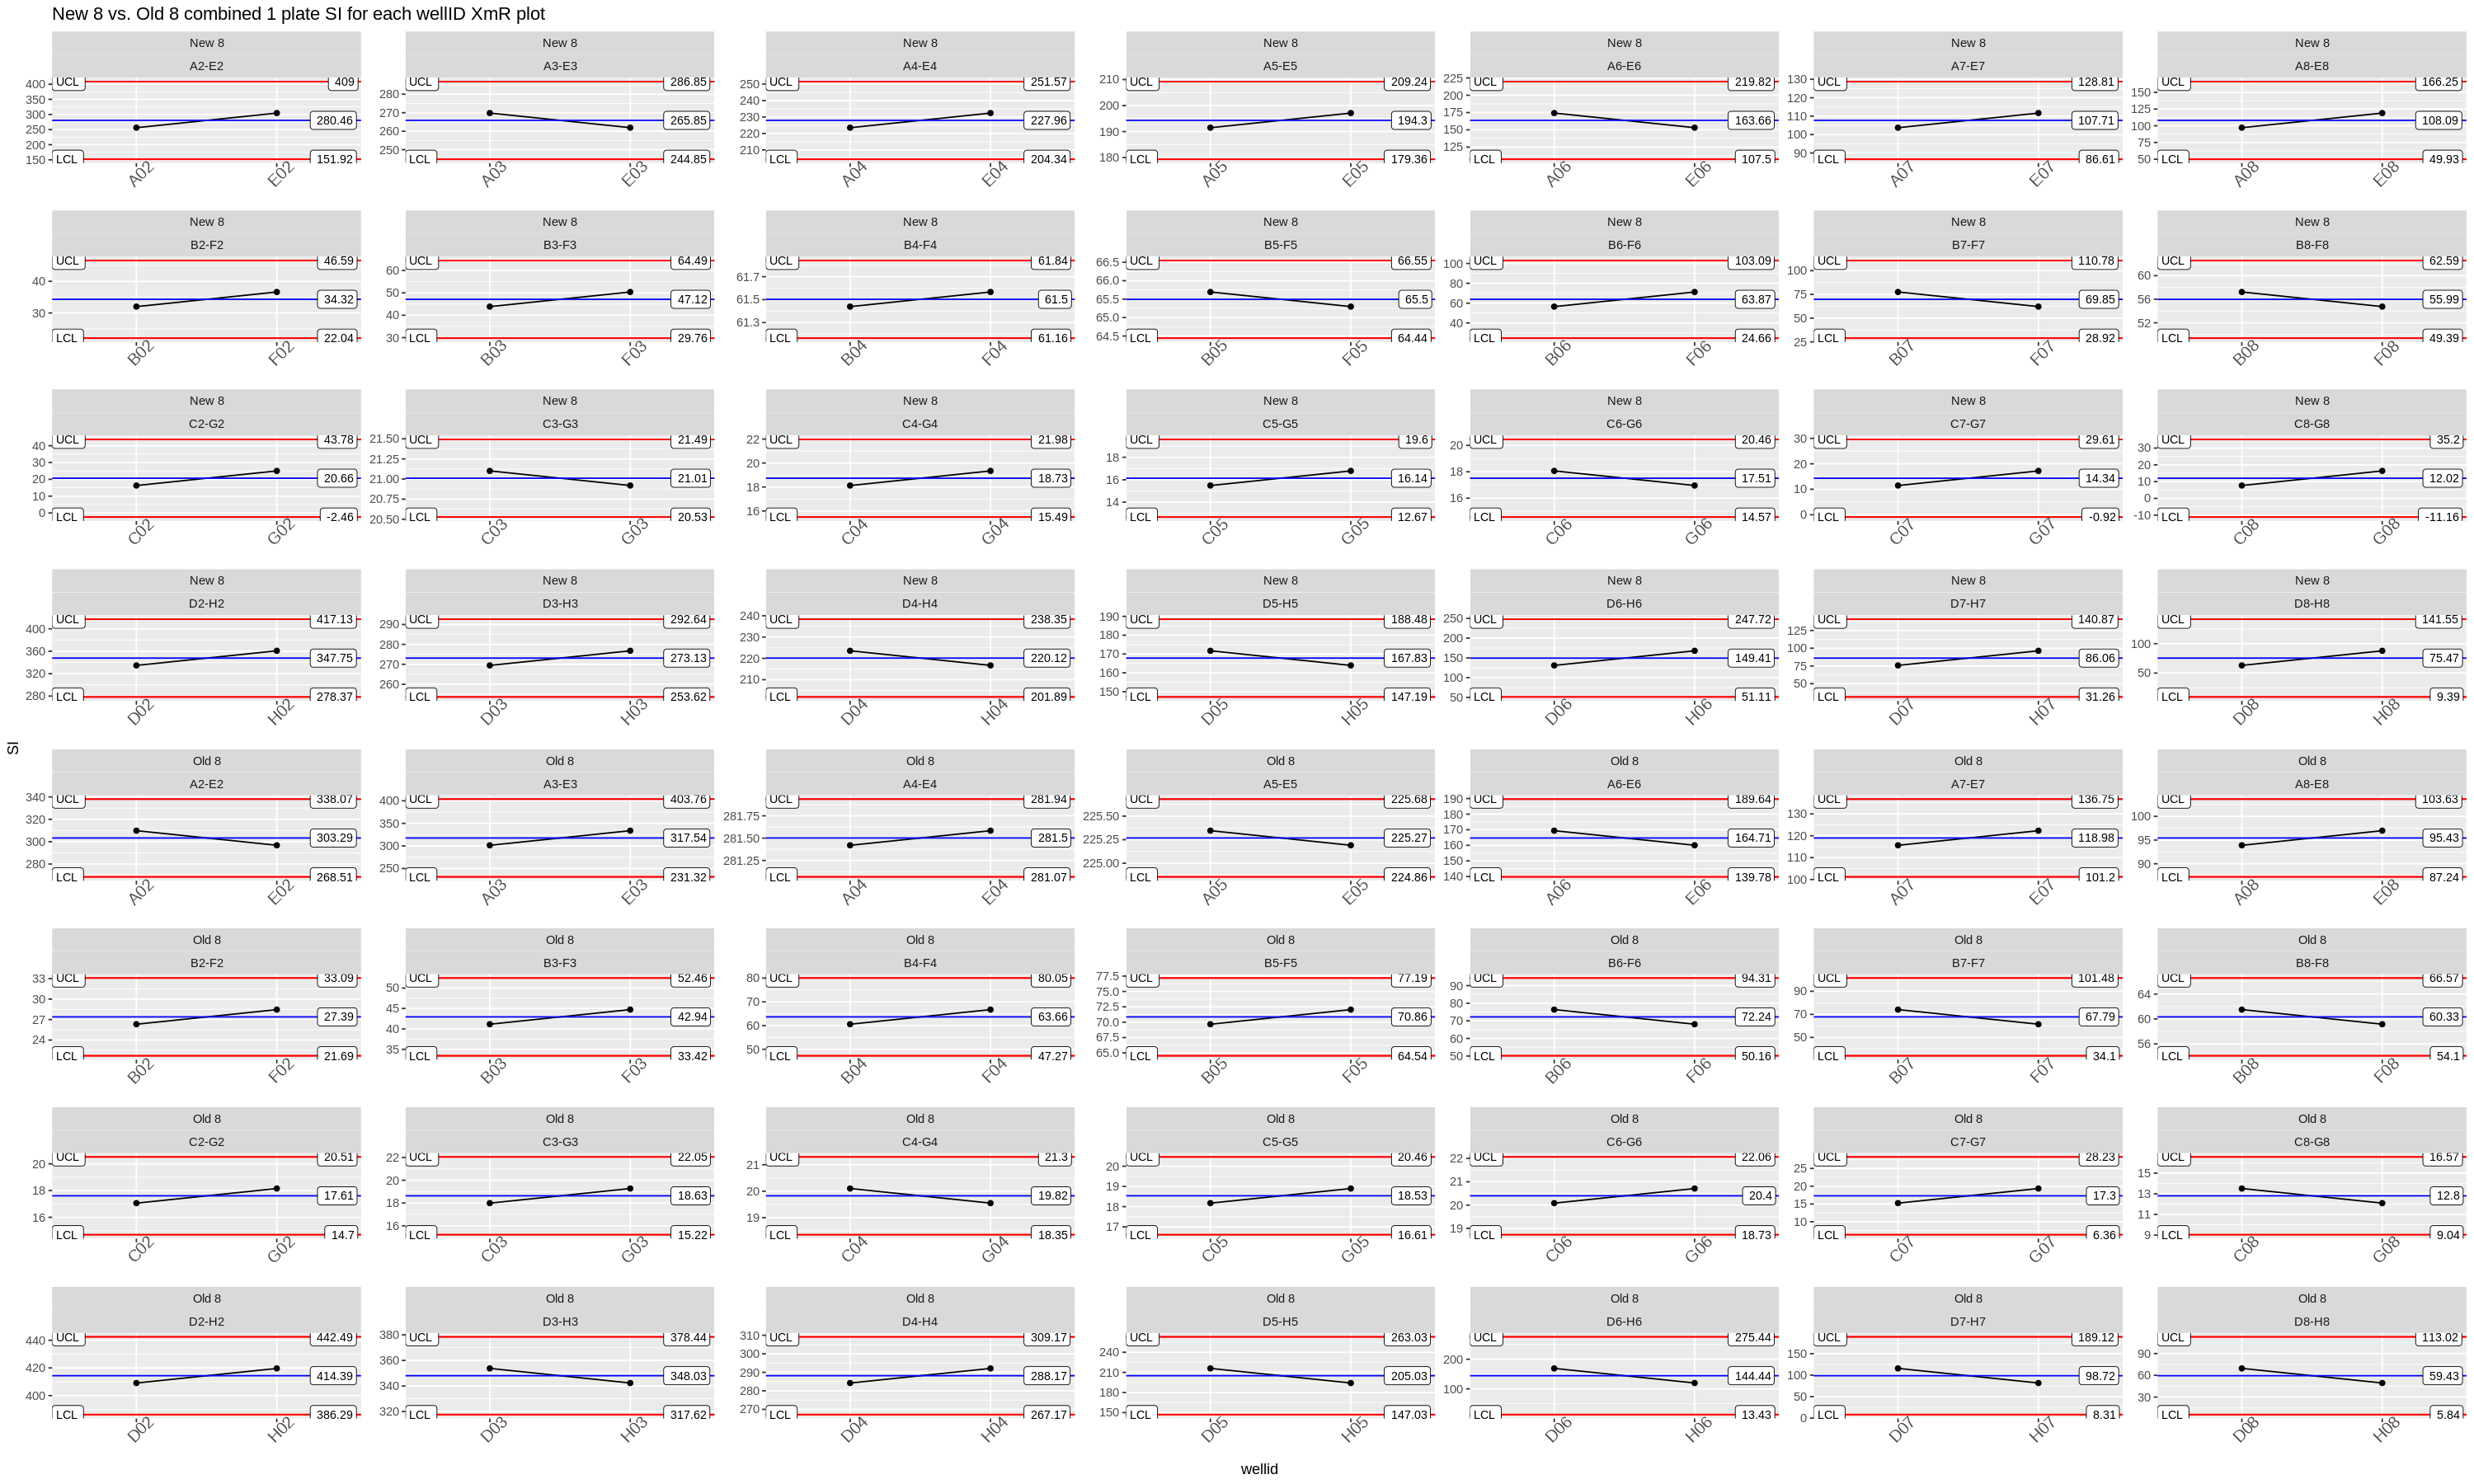

In [187]:
ggplot(dff, aes(x=wellid, y=SI, group = subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  facet_wrap(method~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 vs. Old 8 combined 1 plate SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

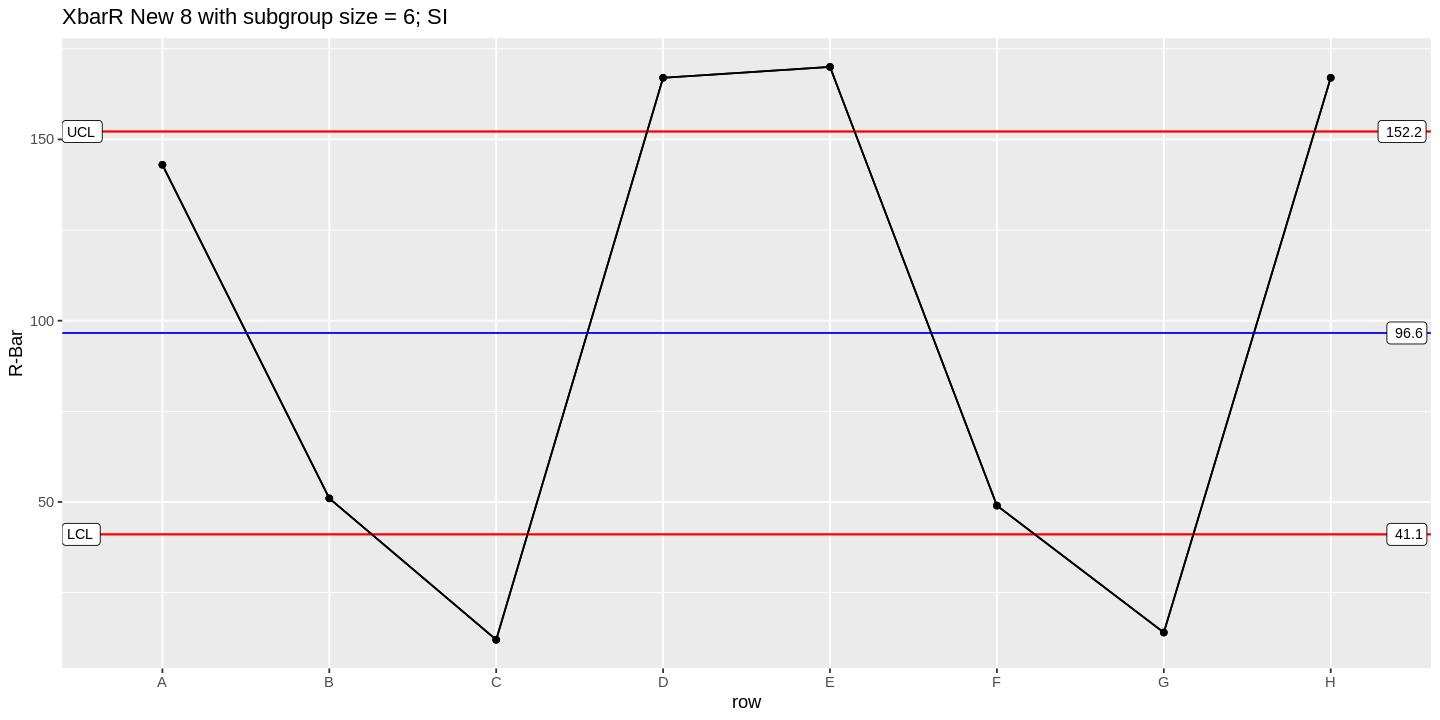

In [184]:
suppressWarnings(ggplot(dff.new8.si, aes(x = row, y = si., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR New 8 with subgroup size = 6; SI"))

# Conclusion

- Seems as though the experiment is not setup for statistically convincing data
- May be inherent to flow cytometry experiments
- Or could design a new experiment:
    - Run 1 plate at a time, 2x for 8 channel and 96 core head
    - After each plate finishes, immediately wash and start on flow cytometer (use 2x cytometers; this will help even out inherent variances that can be pooled)
    - Perhaps use a real cell counter and count cells of a plate to compare against the X20
    - Append to current dataset cell count with n=3 prior to washing